# 프로젝트: 채용플랫폼 기존 유저 분석: 내년 마케팅 전략 구상

## 분석 목적 및 개요

***
-----

    본 프로젝트는 채용 프로세스의 효율성을 높이고 유저 행동 패턴을 분석하여
    플랫폼 사용 경험을 개선하는 것을 목표로 시작되었습니다.

    데이터를 통해 드러나는 숫자와 정보를 체계적으로 분석함으로써,
    보다 나은 의사결정을 지원하는 통찰을 도출하였습니다.

***
-----

    아래 내용에 담긴 분석 과정
    | 전처리 | 탐색 | AARRR 지표분석 | 클러스터 분석 |

***
----

## 환경설정

In [6]:
# ▶ 한글 폰트 설정하기
!pip install koreanize_matplotlib -q

!pip install yellowbrick -q

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')


In [7]:
!pip install ace_tools -q
!pip install xgboost -q

In [8]:
# 필요한 라이브러리 불러오기
import re # 정규표현모듈
import copy
import pandas as pd
import numpy as np
import ast
from collections import Counter
from datetime import datetime
from urllib.parse import urlparse, parse_qs

In [9]:
# 시각화 임포트
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
'''
# ✅ Seaborn 테마 설정
sns.set_theme(
    style='white',  # 배경 스타일 ('darkgrid', 'whitegrid', 'dark', 'white', 'ticks' 가능)
    font='AppleGothic',  # 폰트 설정 (Mac: 'Apple Gothic'), (win: 'BM Hanna Pro')
    rc={
        'axes.unicode_minus': False,  # 마이너스 기호 깨짐 방지
        'figure.figsize': (12, 6),    # 기본 그래프 크기 설정
        'axes.labelsize': 14,         # 축 레이블 크기
        'xtick.labelsize': 12,        # x축 눈금 크기
        'ytick.labelsize': 12,        # y축 눈금 크기
        'legend.fontsize': 12,        # 범례 폰트 크기
        'axes.titleweight': 'bold',   # 제목 굵게 표시
        'axes.titlesize': 16          # 제목 크기 설정
    }
)
'''
# ✅ Jupyter Notebook 그래프 선명하게 출력
%config InlineBackend.figure_format = 'retina'

# ✅ Pandas 출력 설정 (데이터프레임 가독성 향상)
pd.set_option("display.max_columns", None)  # 모든 컬럼 출력
pd.set_option('display.width', None)
# pd.set_option('display.float_format', '{:.5f}'.format)  # 소수점 5자리까지 표시

# ✅ 경고 메시지 무시 (불필요한 Warning 제거)
warnings.filterwarnings("ignore")

# ✅ Jupyter에서 외부 모듈 변경 사항 자동 반영
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.cm as cm
from collections import Counter

- df는 각자 폴더의 path 경로 붙여넣기

In [11]:
company = pd.read_csv('data/Company.csv')
job = pd.read_csv('data/Job.csv')
application = pd.read_csv('data/Application.csv')

## 데이터 전처리

***
--------
    원본 데이터에서 탐색결과 5월 유저 하락에 대한 내용 확인

    5/24일 이후 로그 데이터에서 지원완료시 complete로 찍히는 수정 사항 발견

    유저의 행동을 정확하게 구분하고 인사이트를 도출하기 위해 23년 5월 24일 이후 유저를 대상으로 재탐색

-----------

    * 각 유저 별 활동 간격을 30분 기준으로 정하고 세션 분리
    ex> 로그데이터 흐름상 30분 이후 활동로그는 새로운 세션을 시작으로 봄

    * 유저별 로그데이터의 path(경로) 6단계 세션으로 구분

    * utm경로 4단계로 구분

    * response_code 에러값 제거

    * timestamp = 년, 월, 일, 요일 컬럼 분류

    * 이상 유저 제거

***
-------



## EDA

***
----

    1. 2023년 5월 24일 이후 활동한 중복을 제외한 고유 유저 수는 총 11,111명
-----
    2. 2023년 6월부터 12월까지의 월별 유저 활동 추이 분석

    6월에는 약 4,700명에 달하던 활동 유저가 점차 감소하여 12월에는 3,500명 미만 감소
----
    3. 직군이 전체 채용 공고에서 차지하는 비율 분석
    
    소프트웨어 개발 (41.67%)
    기술 및 PM 직군 (13.66%)
    마케팅 직군 (11.33%)
    투자, 하드웨어 개발, 게임 개발 등 (0.5% 내외)

-----
    4. 유저가 지원한 직군 비율 분석

    소프트웨어 개발 (56.8%)
    기술 및 PM (11%)
    마케팅 직군 (7.2%)
    투자나 비즈니스 (5% 미만)
***
-----



#### 분석 코드

In [12]:
monthly_user_counts = {}

for m in range(6, 13):
    month_str = f'2023-{m:02d}'
    monthly_users = total_user[total_user['create_month'] == month_str]['user_uuid'].nunique()
    monthly_user_counts[month_str] = monthly_users

for month, count in monthly_user_counts.items():
    print(f"{month} : {count}명")

NameError: name 'total_user' is not defined

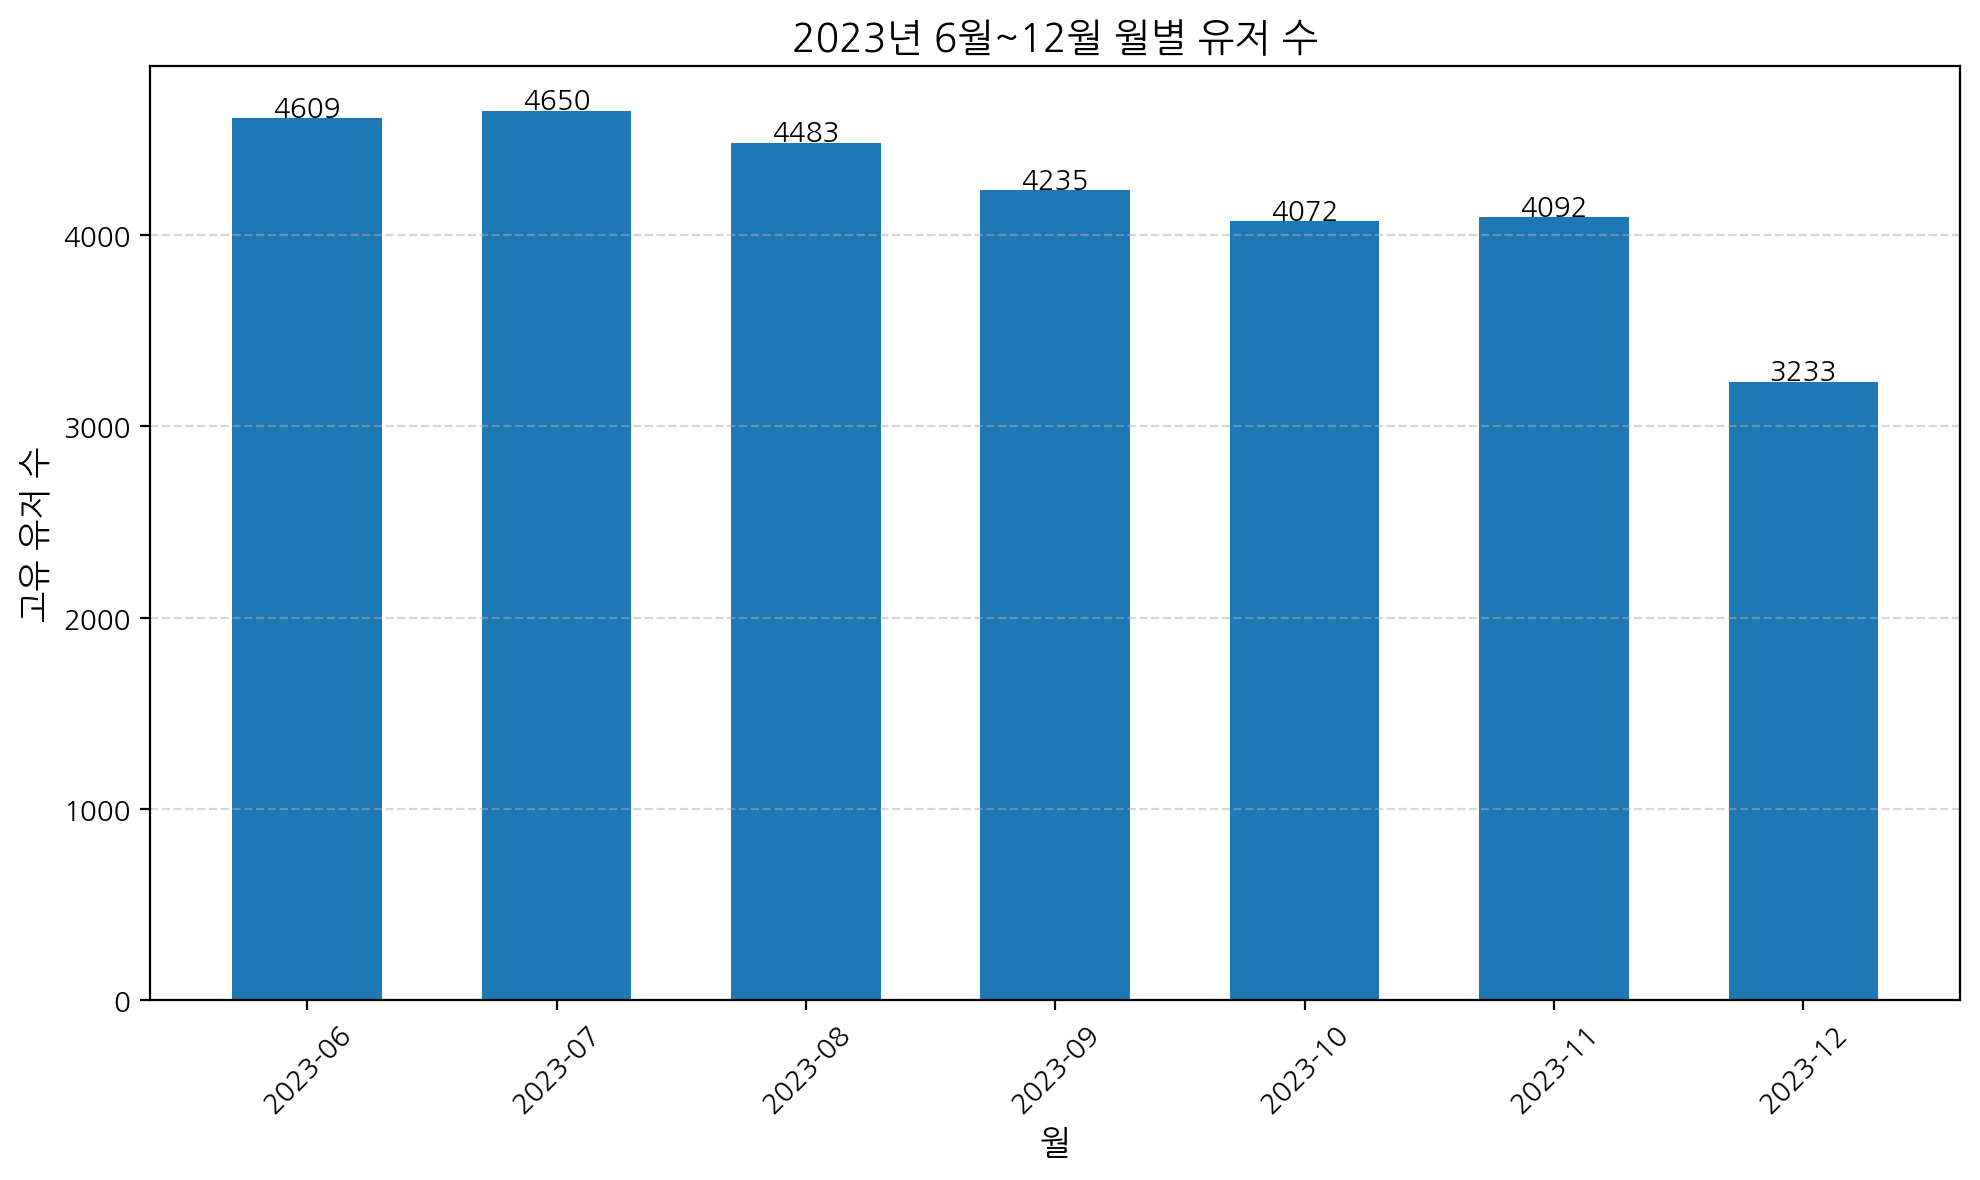

In [ ]:
months = list(monthly_user_counts.keys())
counts = list(monthly_user_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(months, counts, width=0.6)
plt.title('2023년 6월~12월 월별 유저 수', fontsize=14)
plt.xlabel('월', fontsize=12)
plt.ylabel('고유 유저 수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(counts):
    plt.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
#job = job.drop(columns='Unnamed: 0')
job['date'] = pd.to_datetime(job['cdate'])
job['date'] = pd.to_datetime(job['date'], errors='coerce')
job_df = job[job['date'] > '2023-05-24']
job_df = job_df.sort_values(by='date')
job_df['job_field'].unique()

array(['경영지원', 'SW 개발', '마케팅', '기획/PM', '디자인', '비즈니스', '운영', 'HW 개발',
       '게임 개발', '투자'], dtype=object)

In [ ]:
job_df['month'] = job_df['date'].dt.to_period('M').astype(str)

In [ ]:
monthly_job_counts = job_df.groupby(['month', 'job_field']).size().reset_index(name='count')

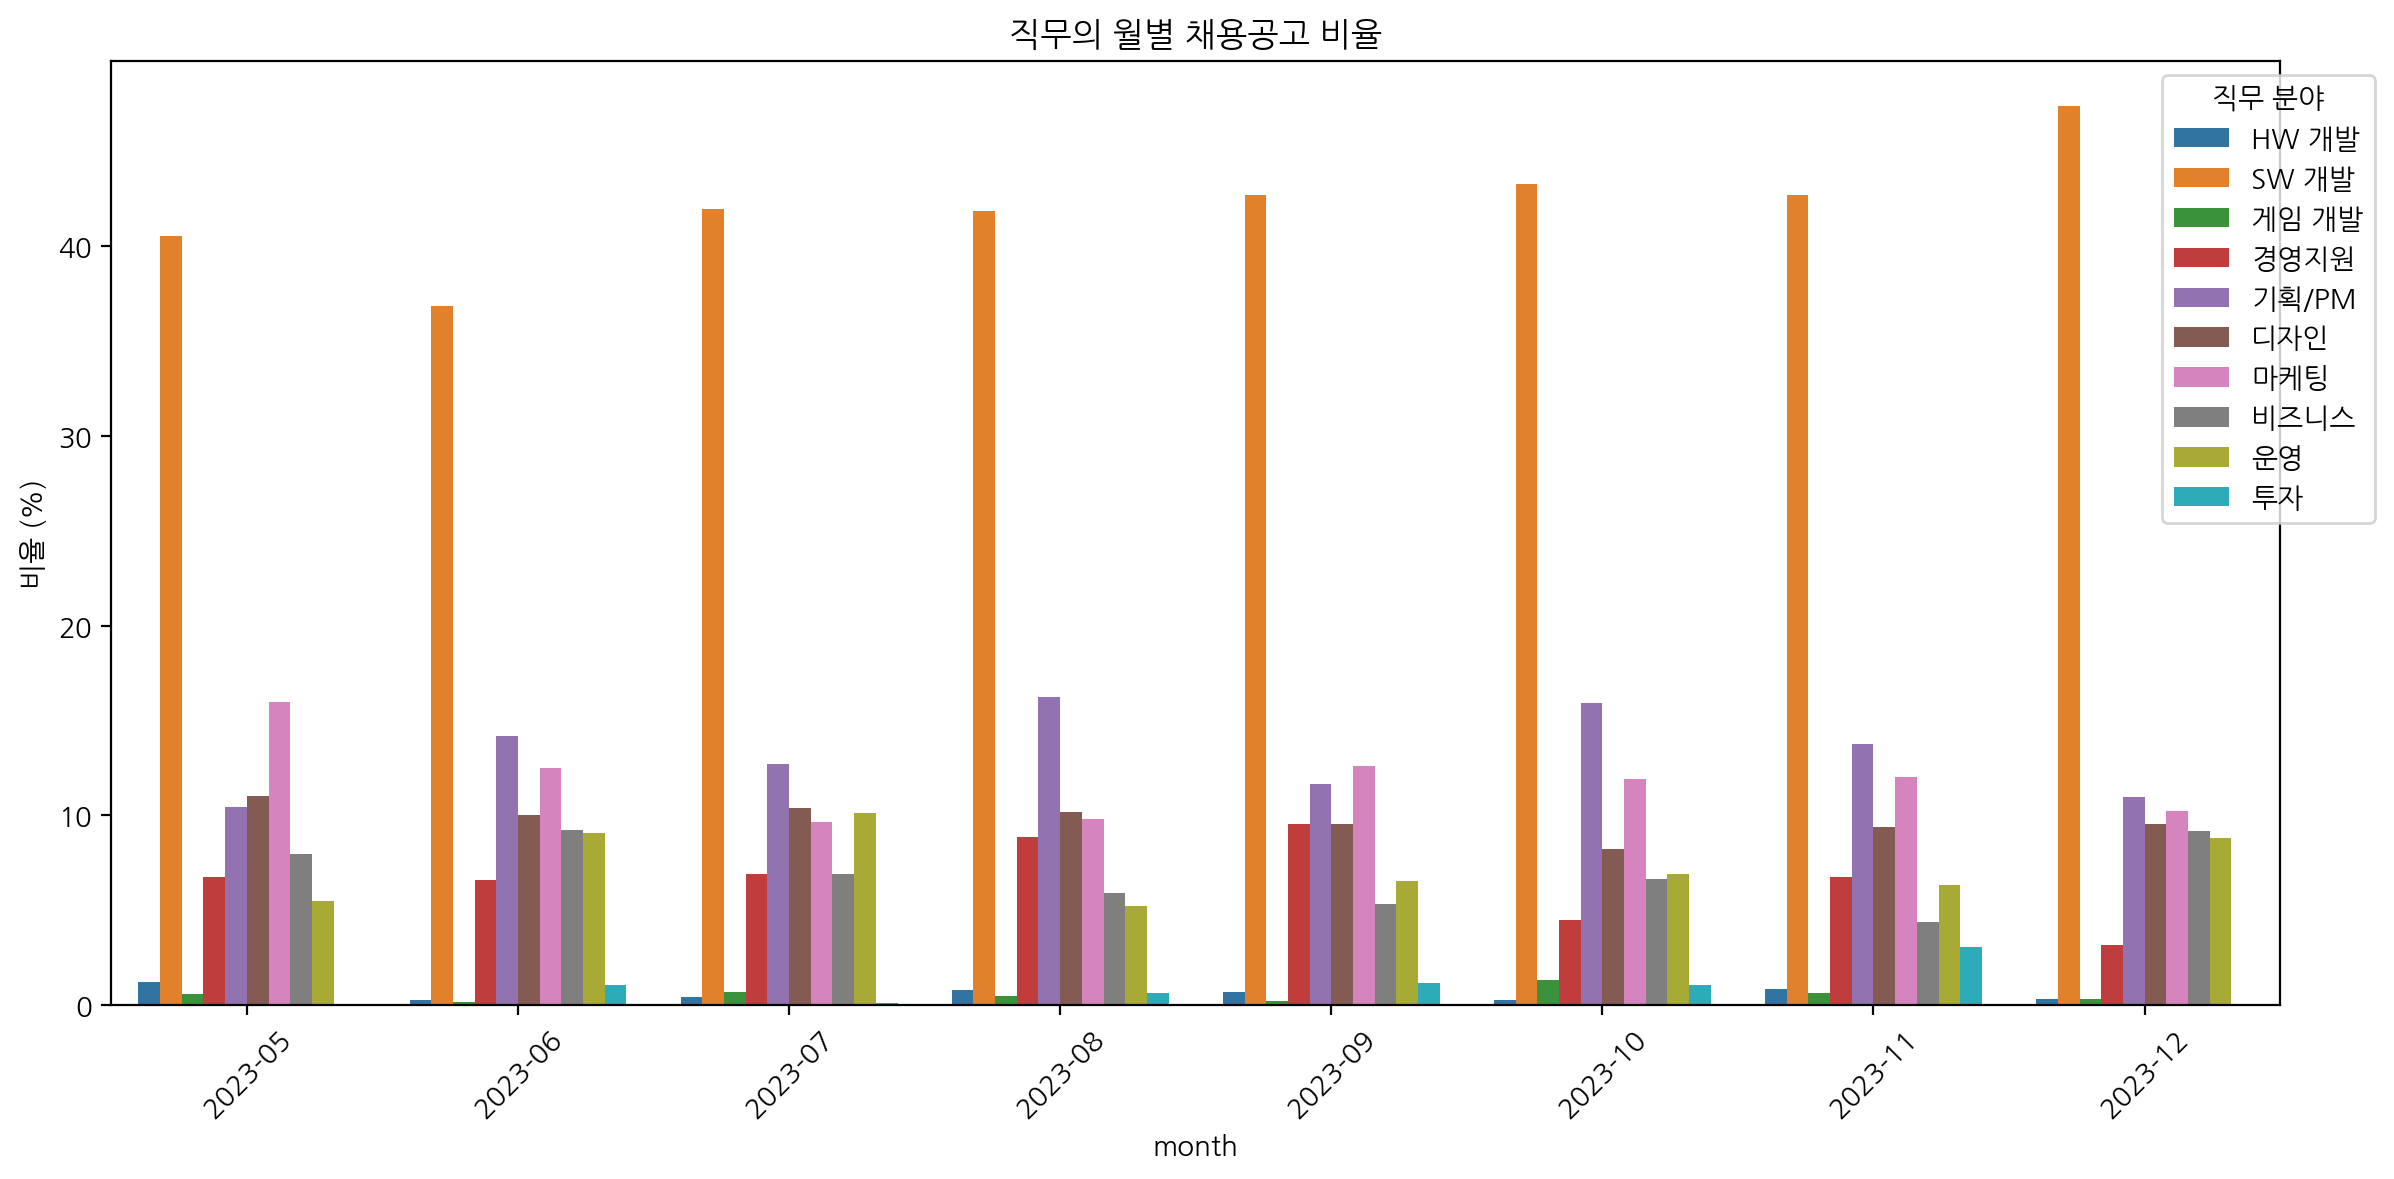

In [ ]:
# 월별 등록된 공고들을 비율로 표시 시각화
monthly_totals = job_df.groupby('month').size().reset_index(name='total')

monthly_job_counts = job_df.groupby(['month', 'job_field']).size().reset_index(name='count')

merged = pd.merge(monthly_job_counts, monthly_totals, on='month')
merged['ratio'] = (merged['count'] / merged['total']) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=merged, x='month', y='ratio', hue='job_field')

plt.title('직무의 월별 채용공고 비율')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.legend(title='직무 분야', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [ ]:
monthly_job_counts

month job_field  count
0   2023-05     HW 개발      2
1   2023-05     SW 개발     66
2   2023-05     게임 개발      1
3   2023-05      경영지원     11
4   2023-05     기획/PM     17
..      ...       ...    ...
73  2023-12     기획/PM     31
74  2023-12       디자인     27
75  2023-12       마케팅     29
76  2023-12      비즈니스     26
77  2023-12        운영     25

[78 rows x 3 columns]

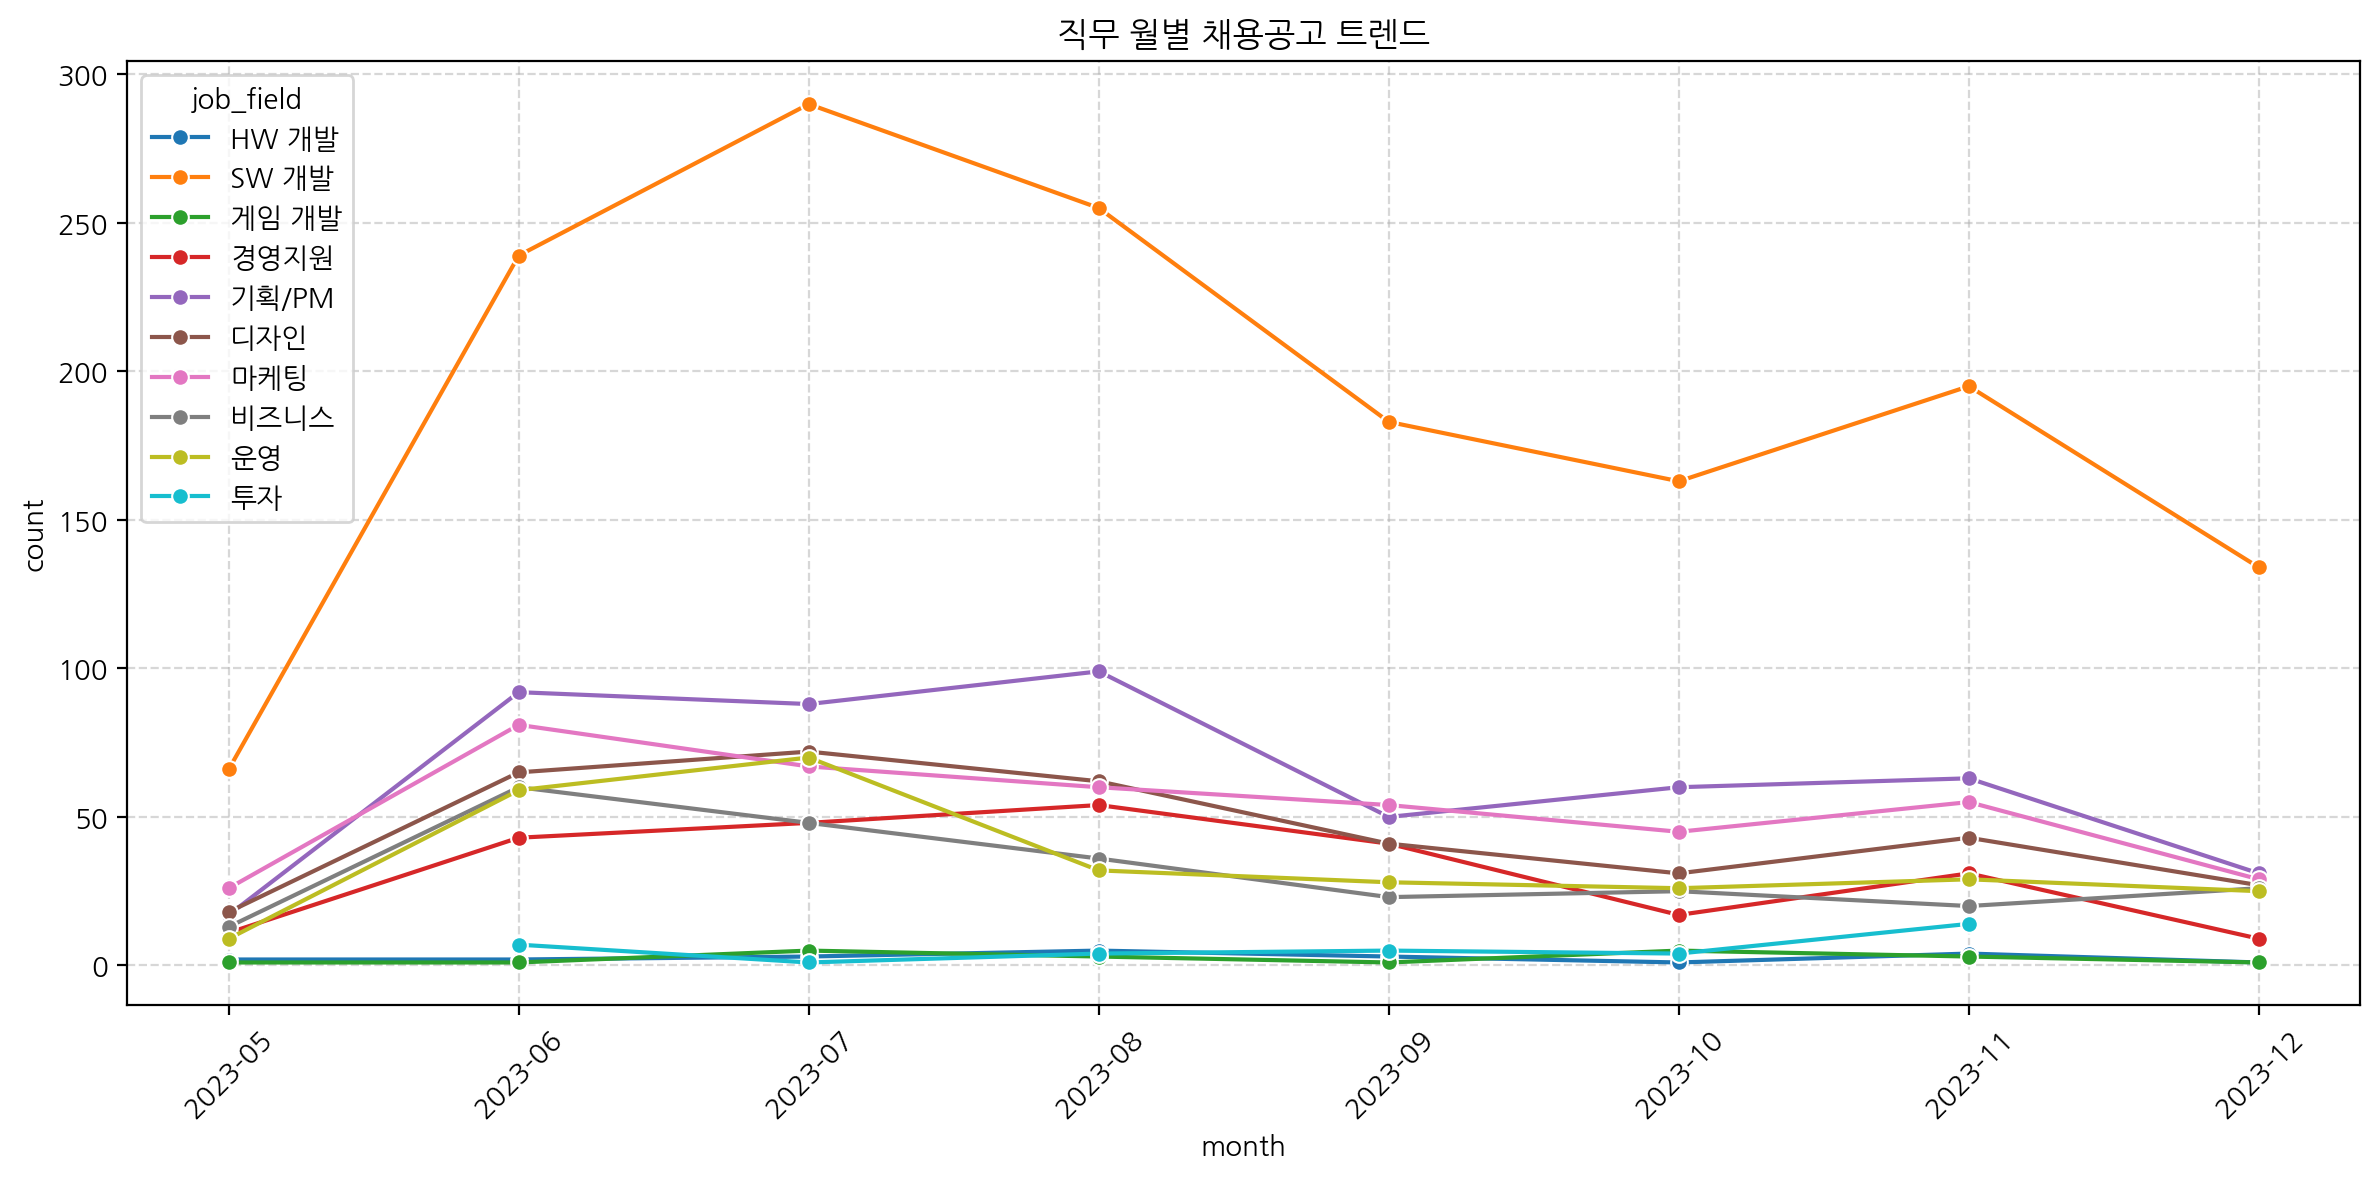

In [ ]:
# 월별 채용공고 등록 개수로 현황 파악
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_job_counts, x='month', y='count', hue='job_field', marker='o')

plt.title('직무 월별 채용공고 트렌드')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- 전체적으로 SW 개발이 높은 수치를 보임
- 그 뒤로 기획/PM, 마케팅 순서
- 하위 항목을 제외하면 월별로 조금씩의 등/하락이 보임

In [ ]:
job_df = job.copy()

In [ ]:
job_df['day'] = job_df['date'].dt.strftime('%Y-%m-%d')

In [ ]:
# 월별 df 지정
job_06 = job_df[(job_df['date'] >= '2023-06-01') & (job_df['date'] < '2023-07-01')]
job_07 = job_df[(job_df['date'] >= '2023-07-01') & (job_df['date'] < '2023-08-01')]
job_08 = job_df[(job_df['date'] >= '2023-08-01') & (job_df['date'] < '2023-09-01')]
job_09 = job_df[(job_df['date'] >= '2023-09-01') & (job_df['date'] < '2023-10-01')]
job_10 = job_df[(job_df['date'] >= '2023-10-01') & (job_df['date'] < '2023-11-01')]
job_11 = job_df[(job_df['date'] >= '2023-11-01') & (job_df['date'] < '2023-12-01')]
job_12 = job_df[(job_df['date'] >= '2023-12-01')]

In [ ]:
def get_daily_counts(df, label):
    df['month'] = label
    df['day'] = df['date'].dt.strftime('%Y-%m-%d')
    return df.groupby(['month', 'day', 'job_field']).size().reset_index(name='count')

# 월별 데이터 프레임 리스트
daily_all = pd.concat([
    get_daily_counts(job_06, '2023-06'),
    get_daily_counts(job_07, '2023-07'),
    get_daily_counts(job_08, '2023-08'),
    get_daily_counts(job_09, '2023-09'),
    get_daily_counts(job_10, '2023-10'),
    get_daily_counts(job_11, '2023-11'),
    get_daily_counts(job_12, '2023-12'),
], ignore_index=True)

In [ ]:
custom_palette = {
    '경영지원': '#1f77b4',   # 파랑
    'SW 개발': '#ff7f0e',   # 오렌지
    '마케팅': '#2ca02c',    # 초록
    '기획/PM': '#d62728',   # 빨강
    '디자인': '#9467bd',    # 보라
    '비즈니스': '#8c564b',  # 갈색
    '운영': '#e377c2',      # 핑크
    'HW 개발': '#7f7f7f',   # 회색
    '게임 개발': '#bcbd22', # 연두
    '투자': '#17becf'       # 청록
}

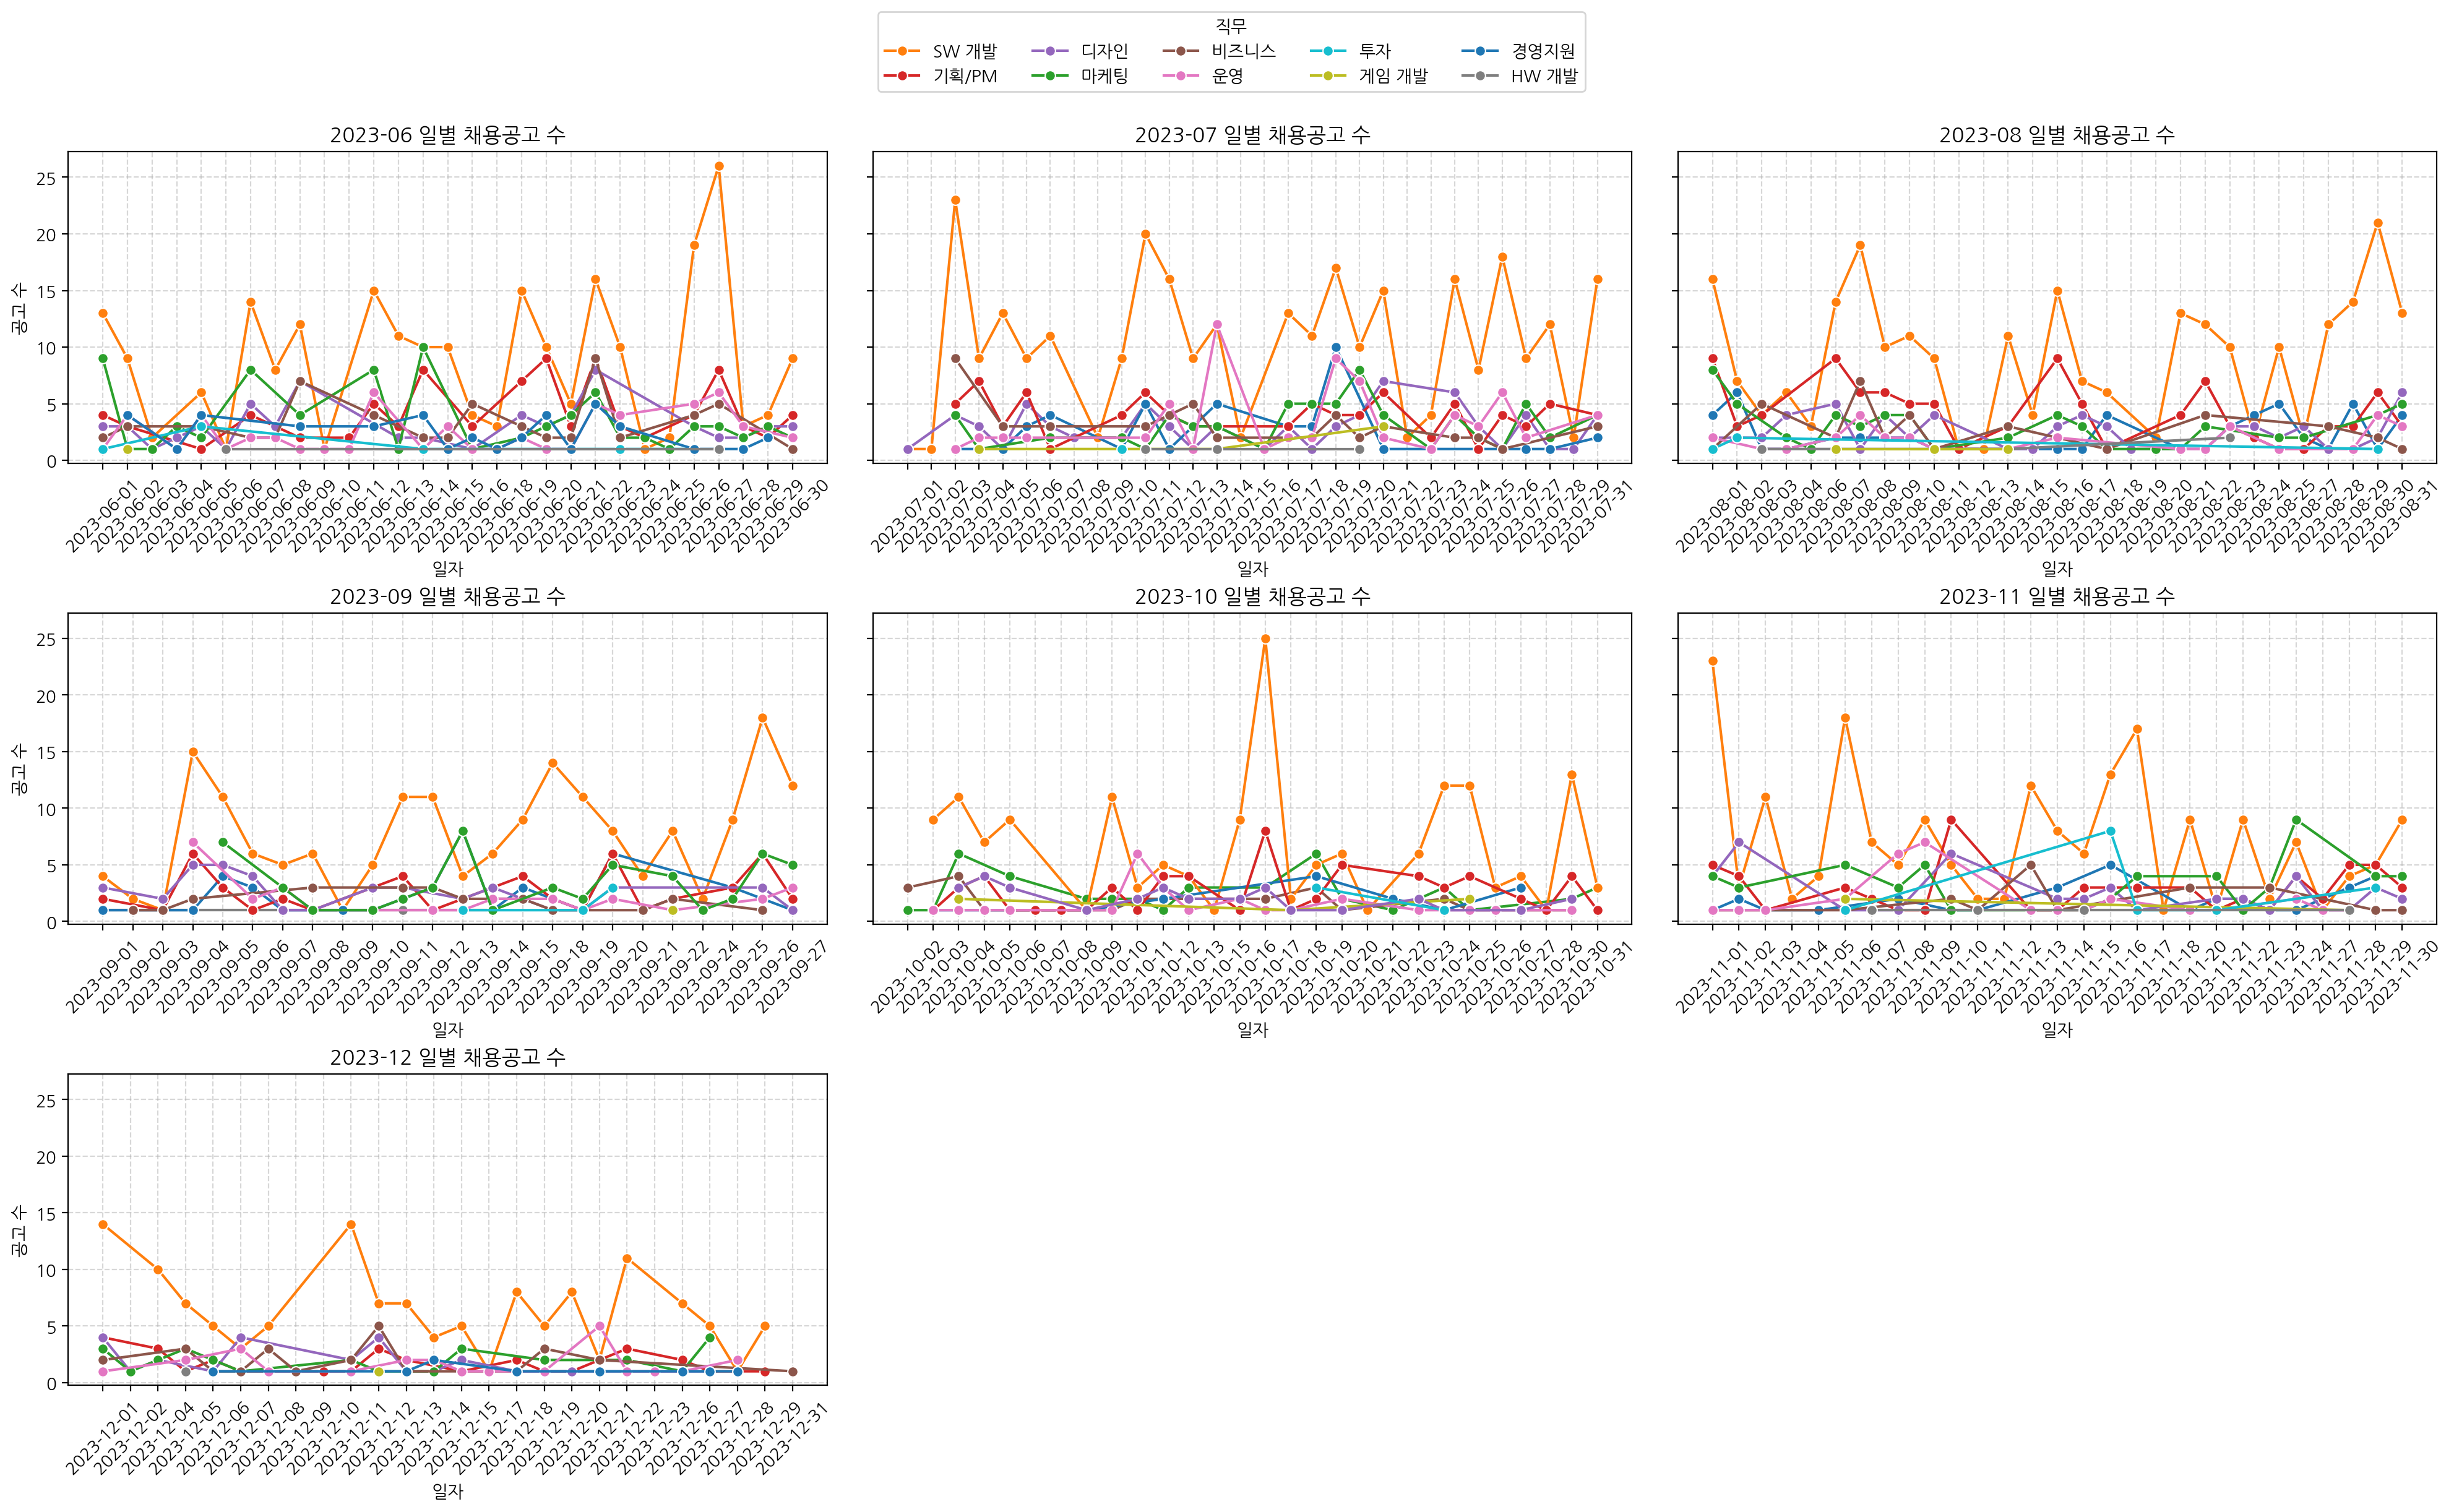

In [ ]:
# 3x3 subplot 설정
fig, axes = plt.subplots(3, 3, figsize=(20, 12), sharey=True)
axes = axes.flatten()

# 월 리스트 6월~12월
months = sorted(daily_all['month'].unique())

for i, month in enumerate(months):
    ax = axes[i]
    data = daily_all[daily_all['month'] == month]

    sns.lineplot(
        data=data,
        x='day',
        y='count',
        hue='job_field',
        marker='o',
        ax=ax,
        palette=custom_palette
    )

    ax.set_title(f'{month} 일별 채용공고 수')
    ax.set_xlabel('일자')
    ax.set_ylabel('공고 수' if i % 3 == 0 else '')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend().remove()

# 월별로 돌아 돌아
for j in range(len(months), len(axes)):
    fig.delaxes(axes[j])

# 전체 범례 추가
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels, title='직무',
    loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=5
)
# 범례 여백 지정
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


- 연봉 공개 여부

In [ ]:
show_salary = job_df['can_show_salary'].value_counts().reset_index()
show_salary.columns = ['연봉공개여부', '공고수']
show_salary['연봉공개여부'] = show_salary['연봉공개여부'].map({0: '공개불가', 1: '공개'})
print(show_salary)

  연봉공개여부    공고수
0     공개  86839
1   공개불가  57408


<Figure size 1000x600 with 0 Axes>

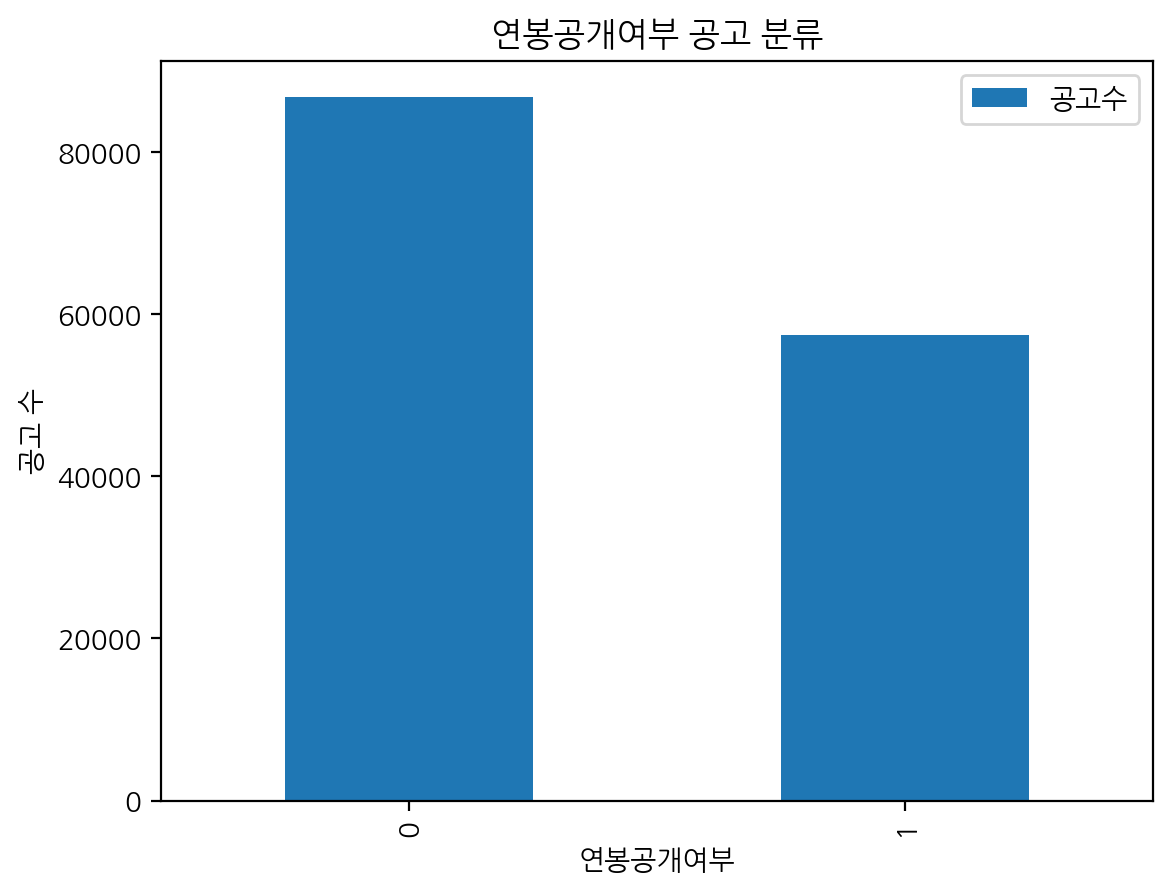

In [ ]:
plt.figure(figsize=(10, 6))
show_salary.plot(kind='bar')
plt.title('연봉공개여부 공고 분류')
plt.xlabel('연봉공개여부')
plt.ylabel('공고 수')
plt.show()

- 재택여부

In [ ]:
remote_count_df = job_df['allow_remote'].value_counts().reset_index()
remote_count_df.columns = ['재택가능여부', '공고수']
remote_count_df['재택가능여부'] = remote_count_df['재택가능여부'].map({0: '불가능', 1: '가능'})
print(remote_count_df)

  재택가능여부     공고수
0    불가능  126491
1     가능   17756


<Figure size 1000x600 with 0 Axes>

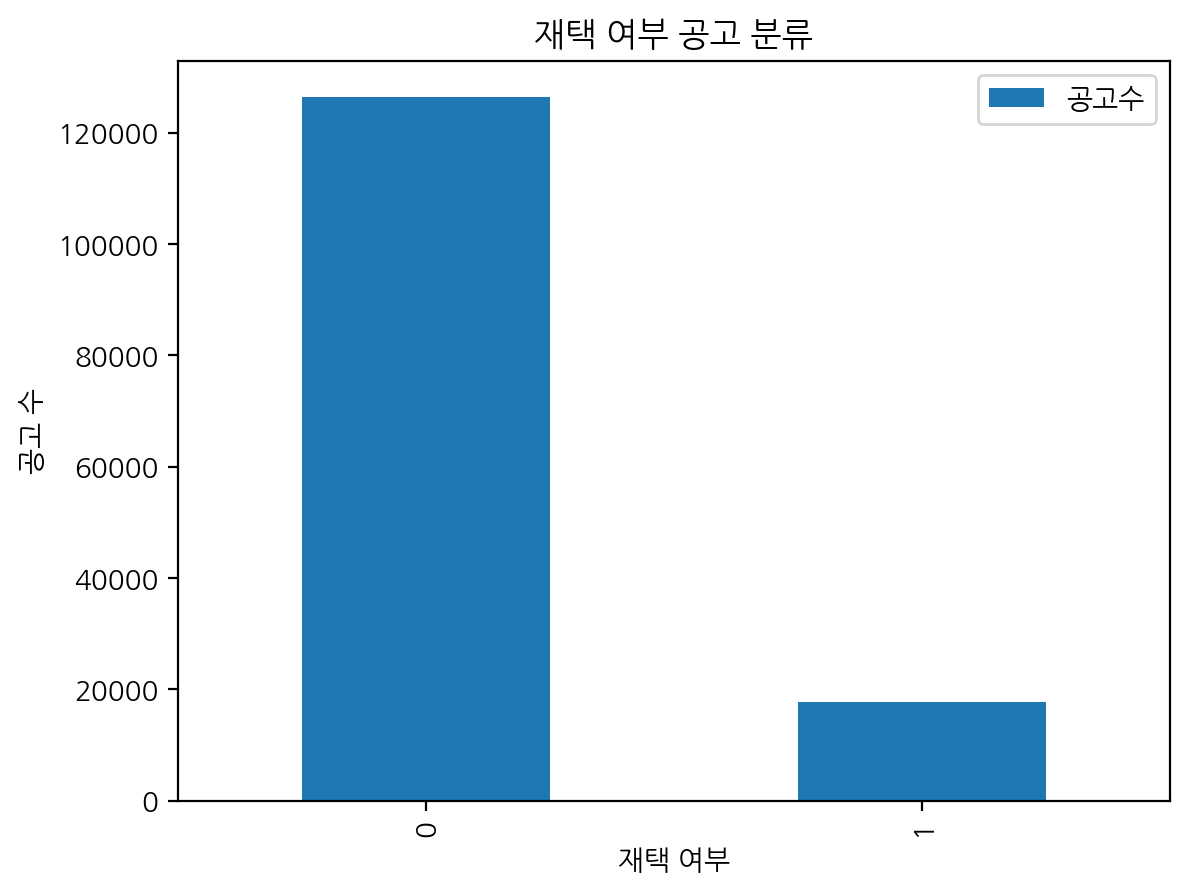

In [ ]:
plt.figure(figsize=(10, 6))
remote_count_df.plot(kind='bar')
plt.title('재택 여부 공고 분류')
plt.xlabel('재택 여부')
plt.ylabel('공고 수')
plt.show()

- 페이지를 첫 방문한 유저 (세션 분리 일/월/요일별 분석)
- 세션 조건 설정:
30분 이후에 재방문하면 다시 카운트

In [ ]:
# 사용자의 이름 및 시간 순서로 정렬
filtered_df = filtered_df.sort_values(['user_uuid', 'timestamp'])

# 이전 행의 시간과의 차이를 분단위로 계산
filtered_df['time_diff'] = filtered_df.groupby('user_uuid')['timestamp'].diff().dt.total_seconds() / 60

# 시간의 차이가 30분을 초과하거나 이전의 값이 Nan값일 경우 새로운 세션으로 간주
filtered_df['new_session'] = ((filtered_df['time_diff'] > 30) | filtered_df['time_diff'].isna())

# 사용자별로 새로운 세션이 True일경우 그 시간
filtered_df['session_id'] = filtered_df.groupby('user_uuid')['new_session'].cumsum()

In [ ]:
# 하루 동안 유저별 세션 수
daily_sessions = filtered_df.groupby(['create_day', 'user_uuid'])['session_id'].nunique().reset_index(name='session_count')
daily_sessions

create_day                             user_uuid  session_count
0       2023-05-24  0081b81a-bc8f-469c-b069-966dbb473a2a              2
1       2023-05-24  00e78f85-9a6d-4728-b9a5-8f6aa08df9db              1
2       2023-05-24  00edb39b-805e-44a8-9fea-4171f5cd13f3              1
3       2023-05-24  00f8df99-eaaf-4fd4-a15d-a6298d02aa45              5
4       2023-05-24  010c0e20-14de-414f-8731-237483ec19db              1
...            ...                                   ...            ...
121085  2023-12-31  fadd7420-5c59-43ec-b1e4-932c34d0a450              1
121086  2023-12-31  fb5bab5b-e710-4aad-892c-21a3b2088e32              1
121087  2023-12-31  fc76d017-30f1-441e-a592-3cd38175ea2b              1
121088  2023-12-31  febb0528-2805-4b37-9fa5-d573612793cf              1
121089  2023-12-31  ffeba6fd-76b6-41cc-8535-de3d9d86e079              2

[121090 rows x 3 columns]

In [ ]:
# 하루별 고유 방문자 수
daily_unique_visitors = daily_sessions.groupby('create_day')['user_uuid'].nunique().reset_index(name='unique_visitors')
daily_unique_visitors

create_day  unique_visitors
0    2023-05-24              967
1    2023-05-25              893
2    2023-05-26              845
3    2023-05-27              443
4    2023-05-28              538
..          ...              ...
217  2023-12-27              470
218  2023-12-28              428
219  2023-12-29              453
220  2023-12-30              221
221  2023-12-31              199

[222 rows x 2 columns]

In [ ]:
# 하루별 총 세션 수
daily_total_sessions = daily_sessions.groupby('create_day')['session_count'].sum().reset_index(name='total_sessions')
daily_total_sessions

create_day  total_sessions
0    2023-05-24            1596
1    2023-05-25            1450
2    2023-05-26            1346
3    2023-05-27             638
4    2023-05-28             762
..          ...             ...
217  2023-12-27             856
218  2023-12-28             715
219  2023-12-29             708
220  2023-12-30             337
221  2023-12-31             268

[222 rows x 2 columns]

In [ ]:
# 일별 총 방문횟수
daily_total_sessions['create_day'] = pd.to_datetime(daily_total_sessions['create_day'])
fig = px.line(data_frame=daily_total_sessions, x='create_day', y='total_sessions', title='일별 총 방문 횟수')

fig.update_layout(
    width=2500,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05.24 ~ 2023.12.31',
    yaxis_title='사용자 수(명)',
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.show()

In [ ]:
# 요일별 유저 세션 수
day_of_week_sessions = filtered_df.groupby(['create_day_of_week', 'user_uuid'])['session_id'].nunique().reset_index(name='session_count')
day_of_week_sessions

create_day_of_week                             user_uuid  session_count
0                 Friday  000b55ad-5c86-438b-a5b0-9ea3a2917789              9
1                 Friday  000d53f7-5ddd-48ba-8dab-bb77b157e13a              1
2                 Friday  004a89cc-d69b-4336-9905-4fd306e3ef80              9
3                 Friday  005d1d8c-2b25-4b4e-a5a3-a1f2a2efe7d2             22
4                 Friday  00605090-bd12-4978-884b-c74e093b40d0              4
...                  ...                                   ...            ...
40847          Wednesday  ffb07a96-8433-4922-bc07-4cac4d977647              1
40848          Wednesday  ffcc939f-00a9-4ae1-86b9-b1c5d04dc08c              1
40849          Wednesday  ffe6aee0-85cc-45e2-aa5e-129751dff08e             28
40850          Wednesday  ffeba6fd-76b6-41cc-8535-de3d9d86e079             60
40851          Wednesday  ffff25ca-c1d7-4fc2-891b-b0df92f95092              1

[40852 rows x 3 columns]

In [ ]:
# 요일별 고유 방문자 수
day_of_week_unique_visitors = day_of_week_sessions.groupby('create_day_of_week')['user_uuid'].nunique().reset_index(name='unique_visitors')
day_of_week_unique_visitors

create_day_of_week  unique_visitors
0             Friday             6354
1             Monday             6199
2           Saturday             4339
3             Sunday             4785
4           Thursday             6423
5            Tuesday             6139
6          Wednesday             6613

In [ ]:
# 요일별 총 세션 수
day_of_week_total_sessions = day_of_week_sessions.groupby('create_day_of_week')['session_count'].sum().reset_index(name='total_sessions')
day_of_week_total_sessions['create_day_of_week'] = pd.Categorical(day_of_week_total_sessions['create_day_of_week'], ordered=True, categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
day_of_week_total_sessions = day_of_week_total_sessions.sort_values(by='create_day_of_week')

In [ ]:
day_of_week_total_sessions

create_day_of_week  total_sessions
3             Sunday           17882
1             Monday           32037
5            Tuesday           30347
6          Wednesday           35097
4           Thursday           31722
0             Friday           29853
2           Saturday           14218

In [ ]:
# 요일별 총 방문횟수
fig = px.bar(data_frame=day_of_week_total_sessions, x='create_day_of_week', y='total_sessions', text_auto=True, title="요일별 총 방문 횟수")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='요일별',
    yaxis=dict(title='사용자 수(명)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

In [ ]:
# 월별 총 방문횟수
daily_total_sessions['month'] = pd.to_datetime(daily_total_sessions['create_day']).dt.strftime('%m')
fig = px.bar(data_frame=daily_total_sessions.groupby('month')['total_sessions'].sum().reset_index(), x='month', y='total_sessions', text_auto=True, title="월별 총 방문 횟수")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='사용자 수(명)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

In [ ]:
daily_total_sessions['total_sessions'].sum()

191156

- 채용공고를 클릭한 유저 (세션 분리 일/월/요일별 분석)

In [ ]:
# 유저의 세션별 첫 방문 시간
first_session_visits = filtered_df.groupby(['user_uuid', 'session_id'])['timestamp'].min().reset_index()

# 컬럼 정리
first_session_visits = first_session_visits.rename(columns={'timestamp': 'first_session_visit'})

# 첫 방문 시간과 원본 데이터 병합
filtered_df = filtered_df.merge(first_session_visits, on=['user_uuid', 'session_id'])

# 첫 방문 이후의 데이터만 필터링
after_first = filtered_df[filtered_df['timestamp'] > filtered_df['first_session_visit']]

# 채용공고 페이지
jobs_page = 'jobs/id/id_title'

# 채용공고에 접근한 데이터 필터링
jobs_visits = after_first[after_first['URL'].str.contains('jobs', na=False)]

# 유저 추출
jobs_visitors = jobs_visits['user_uuid'].unique()

# 데이터 프레임화
result_jobs_visitors = filtered_df[filtered_df['user_uuid'].isin(jobs_visitors)]

In [ ]:
# 사용자의 이름 및 시간 순서로 정렬
result_jobs_visitors = result_jobs_visitors.sort_values(['user_uuid', 'timestamp'])

# 이전 행의 시간과의 차이를 분단위로 계산
result_jobs_visitors['time_diff_jobs'] = result_jobs_visitors.groupby('user_uuid')['timestamp'].diff().dt.total_seconds() / 60

# 시간의 차이가 30분을 초과하거나 이전의 값이 Nan값일 경우 새로운 세션으로 간주
result_jobs_visitors['jobs_new_session'] = ((result_jobs_visitors['time_diff_jobs'] > 30) | result_jobs_visitors['time_diff_jobs'].isna())

# 사용자별로 새로운 세션이 True일경우 그 시간
result_jobs_visitors['jobs_session_id'] = result_jobs_visitors.groupby('user_uuid')['jobs_new_session'].cumsum()

In [ ]:
# 하루 동안 유저별 세션 수
jobs_daily_sessions = result_jobs_visitors.groupby(['create_day', 'user_uuid'])['jobs_session_id'].nunique().reset_index(name='jobs_session_count')
jobs_daily_sessions

create_day                             user_uuid  jobs_session_count
0       2023-05-24  0081b81a-bc8f-469c-b069-966dbb473a2a                   2
1       2023-05-24  00f8df99-eaaf-4fd4-a15d-a6298d02aa45                   5
2       2023-05-24  010c0e20-14de-414f-8731-237483ec19db                   1
3       2023-05-24  01c957d8-8100-47e2-9b00-043f95864903                   2
4       2023-05-24  020c849c-2393-4c5b-9602-2fc87dd25b76                   2
...            ...                                   ...                 ...
113894  2023-12-31  fadd7420-5c59-43ec-b1e4-932c34d0a450                   1
113895  2023-12-31  fb5bab5b-e710-4aad-892c-21a3b2088e32                   1
113896  2023-12-31  fc76d017-30f1-441e-a592-3cd38175ea2b                   1
113897  2023-12-31  febb0528-2805-4b37-9fa5-d573612793cf                   1
113898  2023-12-31  ffeba6fd-76b6-41cc-8535-de3d9d86e079                   2

[113899 rows x 3 columns]

In [ ]:
# 하루별 고유 방문자 수
jobs_daily_unique_visitors = jobs_daily_sessions.groupby('create_day')['user_uuid'].nunique().reset_index(name='jobs_unique_visitors')
jobs_daily_unique_visitors

create_day  jobs_unique_visitors
0    2023-05-24                   872
1    2023-05-25                   773
2    2023-05-26                   731
3    2023-05-27                   398
4    2023-05-28                   499
..          ...                   ...
217  2023-12-27                   447
218  2023-12-28                   398
219  2023-12-29                   418
220  2023-12-30                   211
221  2023-12-31                   190

[222 rows x 2 columns]

In [ ]:
# 하루별 총 세션 수
jobs_daily_total_sessions = jobs_daily_sessions.groupby('create_day')['jobs_session_count'].sum().reset_index(name='jobs_total_sessions')
jobs_daily_total_sessions

create_day  jobs_total_sessions
0    2023-05-24                 1488
1    2023-05-25                 1311
2    2023-05-26                 1216
3    2023-05-27                  587
4    2023-05-28                  718
..          ...                  ...
217  2023-12-27                  831
218  2023-12-28                  679
219  2023-12-29                  672
220  2023-12-30                  326
221  2023-12-31                  259

[222 rows x 2 columns]

In [ ]:
# 일별 총 방문횟수
jobs_daily_total_sessions['create_day'] = pd.to_datetime(jobs_daily_total_sessions['create_day'])
fig = px.line(data_frame=jobs_daily_total_sessions, x='create_day', y='jobs_total_sessions', title='일별 총 방문 횟수')

fig.update_layout(
    width=2500,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05.24 ~ 2023.12.31',
    yaxis_title='사용자 수(명)',
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.show()

In [ ]:
# 요일별 유저 세션 수
jobs_day_of_week_sessions = result_jobs_visitors.groupby(['create_day_of_week', 'user_uuid'])['jobs_session_id'].nunique().reset_index(name='jobs_session_count')
jobs_day_of_week_sessions

create_day_of_week                             user_uuid  \
0                 Friday  000b55ad-5c86-438b-a5b0-9ea3a2917789   
1                 Friday  000d53f7-5ddd-48ba-8dab-bb77b157e13a   
2                 Friday  004a89cc-d69b-4336-9905-4fd306e3ef80   
3                 Friday  005d1d8c-2b25-4b4e-a5a3-a1f2a2efe7d2   
4                 Friday  00605090-bd12-4978-884b-c74e093b40d0   
...                  ...                                   ...   
35122          Wednesday  ffb07a96-8433-4922-bc07-4cac4d977647   
35123          Wednesday  ffcc939f-00a9-4ae1-86b9-b1c5d04dc08c   
35124          Wednesday  ffe6aee0-85cc-45e2-aa5e-129751dff08e   
35125          Wednesday  ffeba6fd-76b6-41cc-8535-de3d9d86e079   
35126          Wednesday  ffff25ca-c1d7-4fc2-891b-b0df92f95092   

       jobs_session_count  
0                       9  
1                       1  
2                       9  
3                      22  
4                       4  
...                   ...  
35122                   1  
35123                   1  
35124                  28  
35125                  60  
35126                   1  

[35127 rows x 3 columns]

In [ ]:
# 요일별 고유 방문자 수
jobs_day_of_week_unique_visitors = jobs_day_of_week_sessions.groupby('create_day_of_week')['user_uuid'].nunique().reset_index(name='jobs_unique_visitors')
jobs_day_of_week_unique_visitors

create_day_of_week  jobs_unique_visitors
0             Friday                  5278
1             Monday                  5363
2           Saturday                  3793
3             Sunday                  4236
4           Thursday                  5491
5            Tuesday                  5324
6          Wednesday                  5642

In [ ]:
# 요일별 총 세션 수
jobs_day_of_week_total_sessions = jobs_day_of_week_sessions.groupby('create_day_of_week')['jobs_session_count'].sum().reset_index(name='jobs_total_sessions')
jobs_day_of_week_total_sessions

create_day_of_week  jobs_total_sessions
0             Friday                28275
1             Monday                30830
2           Saturday                13524
3             Sunday                17170
4           Thursday                30425
5            Tuesday                29210
6          Wednesday                33741

In [ ]:
jobs_day_of_week_total_sessions['create_day_of_week'] = pd.Categorical(jobs_day_of_week_total_sessions['create_day_of_week'], ordered=True, categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
jobs_day_of_week_total_sessions = jobs_day_of_week_total_sessions.sort_values(by='create_day_of_week')
jobs_day_of_week_total_sessions

create_day_of_week  jobs_total_sessions
3             Sunday                17170
1             Monday                30830
5            Tuesday                29210
6          Wednesday                33741
4           Thursday                30425
0             Friday                28275
2           Saturday                13524

In [ ]:
# 요일별 총 방문횟수
fig = px.bar(data_frame=jobs_day_of_week_total_sessions, x='create_day_of_week', y='jobs_total_sessions', text_auto=True, title="요일별 총 방문 횟수")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='요일별',
    yaxis=dict(title='사용자 수(명)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

In [ ]:
# 월별 총 방문횟수
jobs_daily_total_sessions['month'] = pd.to_datetime(jobs_daily_total_sessions['create_day']).dt.strftime('%m')
fig = px.bar(data_frame=jobs_daily_total_sessions.groupby('month')['jobs_total_sessions'].sum().reset_index(), x='month', y='jobs_total_sessions', text_auto=True, title="월별 총 방문 횟수")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='사용자 수(명)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

In [ ]:
jobs_daily_total_sessions['jobs_total_sessions'].sum()

183175

In [ ]:
daily_total_sessions

create_day  total_sessions month
0   2023-05-24            1596    05
1   2023-05-25            1450    05
2   2023-05-26            1346    05
3   2023-05-27             638    05
4   2023-05-28             762    05
..         ...             ...   ...
217 2023-12-27             856    12
218 2023-12-28             715    12
219 2023-12-29             708    12
220 2023-12-30             337    12
221 2023-12-31             268    12

[222 rows x 3 columns]

In [ ]:
jobs_daily_total_sessions

create_day  jobs_total_sessions month
0   2023-05-24                 1488    05
1   2023-05-25                 1311    05
2   2023-05-26                 1216    05
3   2023-05-27                  587    05
4   2023-05-28                  718    05
..         ...                  ...   ...
217 2023-12-27                  831    12
218 2023-12-28                  679    12
219 2023-12-29                  672    12
220 2023-12-30                  326    12
221 2023-12-31                  259    12

[222 rows x 3 columns]

---

In [ ]:
visit_to_jobs_diff = pd.concat([daily_total_sessions, jobs_daily_total_sessions], axis=1)
visit_to_jobs_diff['day_diff'] = np.round((visit_to_jobs_diff['jobs_total_sessions'] / visit_to_jobs_diff['total_sessions']) * 100, 2)
visit_to_jobs_diff = visit_to_jobs_diff.loc[:, ~visit_to_jobs_diff.columns.duplicated()]
visit_to_jobs_diff[['create_day', 'day_diff']]

create_day  day_diff
0   2023-05-24     93.23
1   2023-05-25     90.41
2   2023-05-26     90.34
3   2023-05-27     92.01
4   2023-05-28     94.23
..         ...       ...
217 2023-12-27     97.08
218 2023-12-28     94.97
219 2023-12-29     94.92
220 2023-12-30     96.74
221 2023-12-31     96.64

[222 rows x 2 columns]

In [ ]:
visit_to_jobs_diff['day_of_week'] = pd.to_datetime(visit_to_jobs_diff['create_day']).dt.strftime('%A')
visit_to_jobs_diff

create_day  total_sessions month  jobs_total_sessions  day_diff  \
0   2023-05-24            1596    05                 1488     93.23   
1   2023-05-25            1450    05                 1311     90.41   
2   2023-05-26            1346    05                 1216     90.34   
3   2023-05-27             638    05                  587     92.01   
4   2023-05-28             762    05                  718     94.23   
..         ...             ...   ...                  ...       ...   
217 2023-12-27             856    12                  831     97.08   
218 2023-12-28             715    12                  679     94.97   
219 2023-12-29             708    12                  672     94.92   
220 2023-12-30             337    12                  326     96.74   
221 2023-12-31             268    12                  259     96.64   

    day_of_week  
0     Wednesday  
1      Thursday  
2        Friday  
3      Saturday  
4        Sunday  
..          ...  
217   Wednesday  
218    Thursday  
219      Friday  
220    Saturday  
221      Sunday  

[222 rows x 6 columns]

In [ ]:
# 일별 전환율 변화
fig = px.line(data_frame=visit_to_jobs_diff, x='create_day', y='day_diff', title='일별 전환율 변화')

fig.update_layout(
    width=2500,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05.24 ~ 2023.12.31',
    yaxis_title='전환율 (%)',
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.show()

In [ ]:
visit_to_jobs_diff['diff_count'] = visit_to_jobs_diff['total_sessions'] - visit_to_jobs_diff['jobs_total_sessions']
visit_to_jobs_diff

create_day  total_sessions month  jobs_total_sessions  day_diff  \
0   2023-05-24            1596    05                 1488     93.23   
1   2023-05-25            1450    05                 1311     90.41   
2   2023-05-26            1346    05                 1216     90.34   
3   2023-05-27             638    05                  587     92.01   
4   2023-05-28             762    05                  718     94.23   
..         ...             ...   ...                  ...       ...   
217 2023-12-27             856    12                  831     97.08   
218 2023-12-28             715    12                  679     94.97   
219 2023-12-29             708    12                  672     94.92   
220 2023-12-30             337    12                  326     96.74   
221 2023-12-31             268    12                  259     96.64   

    day_of_week  diff_count  
0     Wednesday         108  
1      Thursday         139  
2        Friday         130  
3      Saturday          51  
4        Sunday          44  
..          ...         ...  
217   Wednesday          25  
218    Thursday          36  
219      Friday          36  
220    Saturday          11  
221      Sunday           9  

[222 rows x 7 columns]

In [ ]:
# 월별 전환율 변화
visit_to_jobs_diff_monthly = visit_to_jobs_diff.groupby('month')['day_diff'].mean().round(2).reset_index(name='monthly_diff')
fig = px.bar(data_frame=visit_to_jobs_diff_monthly, x='month', y='monthly_diff', text_auto=True, title="월별 전환율 변화")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='전환율 (%)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

In [ ]:
# 요일별 전환율 변화
visit_to_jobs_diff_day_of_week = visit_to_jobs_diff.groupby('day_of_week')['day_diff'].mean().round(2).reset_index(name='day_of_week_diff')
fig = px.bar(data_frame=visit_to_jobs_diff_day_of_week, x='day_of_week', y='day_of_week_diff', text_auto=True, title="요일별 전환율 변화")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='전환율 (%)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

- 지원하기를 클릭한 유지 (세션 분리 일/월/요일별 분석)

In [ ]:
# 채용지원 페이지
jobs_apply_page = 'jobs/id/apply/step1'

# 채용공고에 접근한 데이터 필터링
jobs_apply_visits = after_first[after_first['URL'].str.contains(jobs_apply_page)]

# 유저 추출
jobs_apply_visitors = jobs_apply_visits['user_uuid'].unique()

# 데이터 프레임화
result_jobs_apply_visitors = result_jobs_visitors[result_jobs_visitors['user_uuid'].isin(jobs_apply_visitors)]

In [ ]:
# 사용자의 이름 및 시간 순서로 정렬
result_jobs_apply_visitors = result_jobs_apply_visitors.sort_values(['user_uuid', 'timestamp'])

# 이전 행의 시간과의 차이를 분단위로 계산
result_jobs_apply_visitors['time_diff_jobs_apply'] = result_jobs_apply_visitors.groupby('user_uuid')['timestamp'].diff().dt.total_seconds() / 60

# 시간의 차이가 30분을 초과하거나 이전의 값이 Nan값일 경우 새로운 세션으로 간주
result_jobs_apply_visitors['jobs_apply_new_session'] = ((result_jobs_apply_visitors['time_diff_jobs_apply'] > 30) | result_jobs_apply_visitors['time_diff_jobs_apply'].isna())

# 사용자별로 새로운 세션이 True일경우 그 시간
result_jobs_apply_visitors['jobs_apply_session_id'] = result_jobs_apply_visitors.groupby('user_uuid')['jobs_apply_new_session'].cumsum()

In [ ]:
# 하루 동안 유저별 세션 수
jobs_apply_daily_sessions = result_jobs_apply_visitors.groupby(['create_day', 'user_uuid'])['jobs_apply_session_id'].nunique().reset_index(name='jobs_apply_session_count')
jobs_apply_daily_sessions

create_day                             user_uuid  \
0      2023-05-24  00f8df99-eaaf-4fd4-a15d-a6298d02aa45   
1      2023-05-24  01c957d8-8100-47e2-9b00-043f95864903   
2      2023-05-24  020c849c-2393-4c5b-9602-2fc87dd25b76   
3      2023-05-24  0248ae02-0fb8-449f-ba1c-d38f0298d72c   
4      2023-05-24  026cb04e-bb07-477c-a861-bb8636a6018c   
...           ...                                   ...   
79443  2023-12-31  fadd7420-5c59-43ec-b1e4-932c34d0a450   
79444  2023-12-31  fb5bab5b-e710-4aad-892c-21a3b2088e32   
79445  2023-12-31  fc76d017-30f1-441e-a592-3cd38175ea2b   
79446  2023-12-31  febb0528-2805-4b37-9fa5-d573612793cf   
79447  2023-12-31  ffeba6fd-76b6-41cc-8535-de3d9d86e079   

       jobs_apply_session_count  
0                             5  
1                             2  
2                             2  
3                             2  
4                             1  
...                         ...  
79443                         1  
79444                         1  
79445                         1  
79446                         1  
79447                         2  

[79448 rows x 3 columns]

In [ ]:
# 하루별 고유 방문자 수
jobs_apply_daily_unique_visitors = jobs_apply_daily_sessions.groupby('create_day')['user_uuid'].nunique().reset_index(name='jobs_apply_unique_visitors')
jobs_apply_daily_unique_visitors

create_day  jobs_apply_unique_visitors
0    2023-05-24                         509
1    2023-05-25                         448
2    2023-05-26                         415
3    2023-05-27                         248
4    2023-05-28                         345
..          ...                         ...
217  2023-12-27                         324
218  2023-12-28                         292
219  2023-12-29                         292
220  2023-12-30                         157
221  2023-12-31                         148

[222 rows x 2 columns]

In [ ]:
# 하루별 총 세션 수
jobs_apply_daily_total_sessions = jobs_apply_daily_sessions.groupby('create_day')['jobs_apply_session_count'].sum().reset_index(name='jobs_apply_total_sessions')
jobs_apply_daily_total_sessions

create_day  jobs_apply_total_sessions
0    2023-05-24                        984
1    2023-05-25                        857
2    2023-05-26                        782
3    2023-05-27                        389
4    2023-05-28                        512
..          ...                        ...
217  2023-12-27                        655
218  2023-12-28                        519
219  2023-12-29                        492
220  2023-12-30                        253
221  2023-12-31                        212

[222 rows x 2 columns]

In [ ]:
# 일별 총 방문횟수
jobs_apply_daily_total_sessions['create_day'] = pd.to_datetime(jobs_apply_daily_total_sessions['create_day'])
fig = px.line(data_frame=jobs_apply_daily_total_sessions, x='create_day', y='jobs_apply_total_sessions', title='일별 총 방문 횟수')

fig.update_layout(
    width=2500,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05.24 ~ 2023.12.31',
    yaxis_title='사용자 수(명)',
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.show()

In [ ]:
# 요일별 유저 세션 수
jobs_apply_day_of_week_sessions = result_jobs_apply_visitors.groupby(['create_day_of_week', 'user_uuid'])['jobs_apply_session_id'].nunique().reset_index(name='jobs_apply_session_count')
jobs_apply_day_of_week_sessions

create_day_of_week                             user_uuid  \
0                 Friday  000b55ad-5c86-438b-a5b0-9ea3a2917789   
1                 Friday  005d1d8c-2b25-4b4e-a5a3-a1f2a2efe7d2   
2                 Friday  00605090-bd12-4978-884b-c74e093b40d0   
3                 Friday  00712212-5fe3-436d-a5ab-5d246a84962b   
4                 Friday  00778343-487a-44c0-a1f2-895b993d148a   
...                  ...                                   ...   
20985          Wednesday  ff9bb116-b0bb-4ca5-9d1b-aa6d552e3fc3   
20986          Wednesday  ffa28b75-c592-41ce-abc1-b2d500785939   
20987          Wednesday  ffe6aee0-85cc-45e2-aa5e-129751dff08e   
20988          Wednesday  ffeba6fd-76b6-41cc-8535-de3d9d86e079   
20989          Wednesday  ffff25ca-c1d7-4fc2-891b-b0df92f95092   

       jobs_apply_session_count  
0                             9  
1                            22  
2                             4  
3                             6  
4                             6  
...                         ...  
20985                         1  
20986                        18  
20987                        28  
20988                        60  
20989                         1  

[20990 rows x 3 columns]

In [ ]:
# 요일별 고유 방문자 수
jobs_apply_day_of_week_unique_visitors = jobs_apply_day_of_week_sessions.groupby('create_day_of_week')['user_uuid'].nunique().reset_index(name='jobs_apply_unique_visitors')
jobs_apply_day_of_week_unique_visitors

create_day_of_week  jobs_apply_unique_visitors
0             Friday                        3068
1             Monday                        3168
2           Saturday                        2451
3             Sunday                        2722
4           Thursday                        3206
5            Tuesday                        3130
6          Wednesday                        3245

In [ ]:
# 요일별 총 세션 수
jobs_apply_day_of_week_total_sessions = jobs_apply_day_of_week_sessions.groupby('create_day_of_week')['jobs_apply_session_count'].sum().reset_index(name='jobs_apply_total_sessions')
jobs_apply_day_of_week_total_sessions

create_day_of_week  jobs_apply_total_sessions
0             Friday                      20308
1             Monday                      23032
2           Saturday                      10160
3             Sunday                      13298
4           Thursday                      22375
5            Tuesday                      21736
6          Wednesday                      24828

In [ ]:
jobs_apply_day_of_week_total_sessions['create_day_of_week'] = pd.Categorical(jobs_apply_day_of_week_total_sessions['create_day_of_week'], ordered=True, categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
jobs_apply_day_of_week_total_sessions = jobs_apply_day_of_week_total_sessions.sort_values(by='create_day_of_week')
jobs_apply_day_of_week_total_sessions

create_day_of_week  jobs_apply_total_sessions
3             Sunday                      13298
1             Monday                      23032
5            Tuesday                      21736
6          Wednesday                      24828
4           Thursday                      22375
0             Friday                      20308
2           Saturday                      10160

In [ ]:
# 요일별 총 방문횟수
fig = px.bar(data_frame=jobs_apply_day_of_week_total_sessions, x='create_day_of_week', y='jobs_apply_total_sessions', text_auto=True, title="요일별 총 방문 횟수")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='요일별',
    yaxis=dict(title='사용자 수(명)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

In [ ]:
# 월별 총 방문횟수
jobs_apply_daily_total_sessions['month'] = pd.to_datetime(jobs_apply_daily_total_sessions['create_day']).dt.strftime('%m')
fig = px.bar(data_frame=jobs_apply_daily_total_sessions.groupby('month')['jobs_apply_total_sessions'].sum().reset_index(), x='month', y='jobs_apply_total_sessions', text_auto=True, title="월별 총 방문 횟수")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='사용자 수(명)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

In [ ]:
jobs_apply_daily_total_sessions['jobs_apply_total_sessions'].sum()

135737

---

In [ ]:
visit_to_jobs_apply_diff = pd.concat([jobs_daily_total_sessions, jobs_apply_daily_total_sessions], axis=1)
visit_to_jobs_apply_diff['day_diff'] = np.round((visit_to_jobs_apply_diff['jobs_apply_total_sessions'] / visit_to_jobs_apply_diff['jobs_total_sessions']) * 100, 2)
visit_to_jobs_apply_diff = visit_to_jobs_apply_diff.loc[:, ~visit_to_jobs_apply_diff.columns.duplicated()]
visit_to_jobs_apply_diff[['create_day', 'day_diff']]

create_day  day_diff
0   2023-05-24     66.13
1   2023-05-25     65.37
2   2023-05-26     64.31
3   2023-05-27     66.27
4   2023-05-28     71.31
..         ...       ...
217 2023-12-27     78.82
218 2023-12-28     76.44
219 2023-12-29     73.21
220 2023-12-30     77.61
221 2023-12-31     81.85

[222 rows x 2 columns]

In [ ]:
visit_to_jobs_apply_diff['day_of_week'] = pd.to_datetime(visit_to_jobs_apply_diff['create_day']).dt.strftime('%A')
visit_to_jobs_apply_diff

create_day  jobs_total_sessions month  jobs_apply_total_sessions  \
0   2023-05-24                 1488    05                        984   
1   2023-05-25                 1311    05                        857   
2   2023-05-26                 1216    05                        782   
3   2023-05-27                  587    05                        389   
4   2023-05-28                  718    05                        512   
..         ...                  ...   ...                        ...   
217 2023-12-27                  831    12                        655   
218 2023-12-28                  679    12                        519   
219 2023-12-29                  672    12                        492   
220 2023-12-30                  326    12                        253   
221 2023-12-31                  259    12                        212   

     day_diff day_of_week  
0       66.13   Wednesday  
1       65.37    Thursday  
2       64.31      Friday  
3       66.27    Saturday  
4       71.31      Sunday  
..        ...         ...  
217     78.82   Wednesday  
218     76.44    Thursday  
219     73.21      Friday  
220     77.61    Saturday  
221     81.85      Sunday  

[222 rows x 6 columns]

In [ ]:
# 일별 전환율 변화
fig = px.line(data_frame=visit_to_jobs_apply_diff, x='create_day', y='day_diff', title='일별 전환율 변화')

fig.update_layout(
    width=2500,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05.24 ~ 2023.12.31',
    yaxis_title='전환율 (%)',
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.show()

In [ ]:
visit_to_jobs_apply_diff['diff_count'] = visit_to_jobs_apply_diff['jobs_total_sessions'] - visit_to_jobs_apply_diff['jobs_apply_total_sessions']
visit_to_jobs_apply_diff

create_day  jobs_total_sessions month  jobs_apply_total_sessions  \
0   2023-05-24                 1488    05                        984   
1   2023-05-25                 1311    05                        857   
2   2023-05-26                 1216    05                        782   
3   2023-05-27                  587    05                        389   
4   2023-05-28                  718    05                        512   
..         ...                  ...   ...                        ...   
217 2023-12-27                  831    12                        655   
218 2023-12-28                  679    12                        519   
219 2023-12-29                  672    12                        492   
220 2023-12-30                  326    12                        253   
221 2023-12-31                  259    12                        212   

     day_diff day_of_week  diff_count  
0       66.13   Wednesday         504  
1       65.37    Thursday         454  
2       64.31      Friday         434  
3       66.27    Saturday         198  
4       71.31      Sunday         206  
..        ...         ...         ...  
217     78.82   Wednesday         176  
218     76.44    Thursday         160  
219     73.21      Friday         180  
220     77.61    Saturday          73  
221     81.85      Sunday          47  

[222 rows x 7 columns]

In [ ]:
# 월별 전환율 변화
visit_to_jobs_apply_diff_monthly = visit_to_jobs_apply_diff.groupby('month')['day_diff'].mean().round(2).reset_index(name='monthly_diff')
fig = px.bar(data_frame=visit_to_jobs_apply_diff_monthly, x='month', y='monthly_diff', text_auto=True, title="월별 전환율 변화")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='전환율 (%)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

In [ ]:
# 요일별 전환율 변화
visit_to_jobs_apply_diff_day_of_week = visit_to_jobs_apply_diff.groupby('day_of_week')['day_diff'].mean().round(2).reset_index(name='day_of_week_diff')
fig = px.bar(data_frame=visit_to_jobs_apply_diff_day_of_week, x='day_of_week', y='day_of_week_diff', text_auto=True, title="요일별 전환율 변화")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='전환율 (%)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

---

In [ ]:
# 채용지원 페이지
jobs_complete_page = 'jobs/id/apply/complete'

# 채용공고에 접근한 데이터 필터링
jobs_complete_visits = after_first[after_first['URL'].str.contains(jobs_complete_page)]

# 유저 추출
jobs_complete_visitors = jobs_complete_visits['user_uuid'].unique()

# 데이터 프레임화
result_jobs_complete_visitors = result_jobs_apply_visitors[result_jobs_apply_visitors['user_uuid'].isin(jobs_complete_visitors)]

In [ ]:
# 사용자의 이름 및 시간 순서로 정렬
result_jobs_complete_visitors = result_jobs_complete_visitors.sort_values(['user_uuid', 'timestamp'])

# 이전 행의 시간과의 차이를 분단위로 계산
result_jobs_complete_visitors['time_diff_jobs_complete'] = result_jobs_complete_visitors.groupby('user_uuid')['timestamp'].diff().dt.total_seconds() / 60

# 시간의 차이가 30분을 초과하거나 이전의 값이 Nan값일 경우 새로운 세션으로 간주
result_jobs_complete_visitors['jobs_complete_new_session'] = ((result_jobs_complete_visitors['time_diff_jobs_complete'] > 30) | result_jobs_complete_visitors['time_diff_jobs_complete'].isna())

# 사용자별로 새로운 세션이 True일경우 그 시간
result_jobs_complete_visitors['jobs_complete_session_id'] = result_jobs_complete_visitors.groupby('user_uuid')['jobs_complete_new_session'].cumsum()

In [ ]:
# 하루 동안 유저별 세션 수
jobs_complete_daily_sessions = result_jobs_complete_visitors.groupby(['create_day', 'user_uuid'])['jobs_complete_session_id'].nunique().reset_index(name='jobs_complete_session_count')
jobs_complete_daily_sessions

create_day                             user_uuid  \
0      2023-05-24  00f8df99-eaaf-4fd4-a15d-a6298d02aa45   
1      2023-05-24  01c957d8-8100-47e2-9b00-043f95864903   
2      2023-05-24  020c849c-2393-4c5b-9602-2fc87dd25b76   
3      2023-05-24  0248ae02-0fb8-449f-ba1c-d38f0298d72c   
4      2023-05-24  026cb04e-bb07-477c-a861-bb8636a6018c   
...           ...                                   ...   
69972  2023-12-31  f8ba2393-fb96-47c9-8914-7ed263850816   
69973  2023-12-31  f91e1605-89a8-4174-9402-084ffc704044   
69974  2023-12-31  fadd7420-5c59-43ec-b1e4-932c34d0a450   
69975  2023-12-31  fc76d017-30f1-441e-a592-3cd38175ea2b   
69976  2023-12-31  ffeba6fd-76b6-41cc-8535-de3d9d86e079   

       jobs_complete_session_count  
0                                5  
1                                2  
2                                2  
3                                2  
4                                1  
...                            ...  
69972                            3  
69973                            1  
69974                            1  
69975                            1  
69976                            2  

[69977 rows x 3 columns]

In [ ]:
# 하루별 고유 방문자 수
jobs_complete_daily_unique_visitors = jobs_complete_daily_sessions.groupby('create_day')['user_uuid'].nunique().reset_index(name='jobs_complete_unique_visitors')
jobs_complete_daily_unique_visitors

create_day  jobs_complete_unique_visitors
0    2023-05-24                            411
1    2023-05-25                            361
2    2023-05-26                            340
3    2023-05-27                            206
4    2023-05-28                            294
..          ...                            ...
217  2023-12-27                            274
218  2023-12-28                            261
219  2023-12-29                            256
220  2023-12-30                            142
221  2023-12-31                            133

[222 rows x 2 columns]

In [ ]:
# 하루별 총 세션 수
jobs_complete_daily_total_sessions = jobs_complete_daily_sessions.groupby('create_day')['jobs_complete_session_count'].sum().reset_index(name='jobs_complete_total_sessions')
jobs_complete_daily_total_sessions

create_day  jobs_complete_total_sessions
0    2023-05-24                           803
1    2023-05-25                           726
2    2023-05-26                           659
3    2023-05-27                           331
4    2023-05-28                           437
..          ...                           ...
217  2023-12-27                           557
218  2023-12-28                           446
219  2023-12-29                           426
220  2023-12-30                           219
221  2023-12-31                           185

[222 rows x 2 columns]

In [ ]:
# 일별 총 방문횟수
jobs_complete_daily_total_sessions['create_day'] = pd.to_datetime(jobs_complete_daily_total_sessions['create_day'])
fig = px.line(data_frame=jobs_complete_daily_total_sessions, x='create_day', y='jobs_complete_total_sessions', title='일별 총 방문 횟수')

fig.update_layout(
    width=2500,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05.24 ~ 2023.12.31',
    yaxis_title='사용자 수(명)',
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.show()

In [ ]:
# 요일별 유저 세션 수
jobs_complete_day_of_week_sessions = result_jobs_complete_visitors.groupby(['create_day_of_week', 'user_uuid'])['jobs_complete_session_id'].nunique().reset_index(name='jobs_complete_session_count')
jobs_complete_day_of_week_sessions

create_day_of_week                             user_uuid  \
0                 Friday  000b55ad-5c86-438b-a5b0-9ea3a2917789   
1                 Friday  005d1d8c-2b25-4b4e-a5a3-a1f2a2efe7d2   
2                 Friday  00605090-bd12-4978-884b-c74e093b40d0   
3                 Friday  00712212-5fe3-436d-a5ab-5d246a84962b   
4                 Friday  00778343-487a-44c0-a1f2-895b993d148a   
...                  ...                                   ...   
18237          Wednesday  ff9bb116-b0bb-4ca5-9d1b-aa6d552e3fc3   
18238          Wednesday  ffa28b75-c592-41ce-abc1-b2d500785939   
18239          Wednesday  ffe6aee0-85cc-45e2-aa5e-129751dff08e   
18240          Wednesday  ffeba6fd-76b6-41cc-8535-de3d9d86e079   
18241          Wednesday  ffff25ca-c1d7-4fc2-891b-b0df92f95092   

       jobs_complete_session_count  
0                                9  
1                               22  
2                                4  
3                                6  
4                                6  
...                            ...  
18237                            1  
18238                           18  
18239                           28  
18240                           60  
18241                            1  

[18242 rows x 3 columns]

In [ ]:
# 요일별 고유 방문자 수
jobs_complete_day_of_week_unique_visitors = jobs_complete_day_of_week_sessions.groupby('create_day_of_week')['user_uuid'].nunique().reset_index(name='jobs_complete_unique_visitors')
jobs_complete_day_of_week_unique_visitors

create_day_of_week  jobs_complete_unique_visitors
0             Friday                           2667
1             Monday                           2750
2           Saturday                           2153
3             Sunday                           2392
4           Thursday                           2764
5            Tuesday                           2712
6          Wednesday                           2804

In [ ]:
# 요일별 총 세션 수
jobs_complete_day_of_week_total_sessions = jobs_complete_day_of_week_sessions.groupby('create_day_of_week')['jobs_complete_session_count'].sum().reset_index(name='jobs_complete_total_sessions')
jobs_complete_day_of_week_total_sessions

create_day_of_week  jobs_complete_total_sessions
0             Friday                         18072
1             Monday                         20493
2           Saturday                          9040
3             Sunday                         11913
4           Thursday                         19743
5            Tuesday                         19316
6          Wednesday                         21991

In [ ]:
jobs_complete_day_of_week_total_sessions['create_day_of_week'] = pd.Categorical(jobs_complete_day_of_week_total_sessions['create_day_of_week'], ordered=True, categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
jobs_complete_day_of_week_total_sessions = jobs_complete_day_of_week_total_sessions.sort_values(by='create_day_of_week')
jobs_complete_day_of_week_total_sessions

create_day_of_week  jobs_complete_total_sessions
3             Sunday                         11913
1             Monday                         20493
5            Tuesday                         19316
6          Wednesday                         21991
4           Thursday                         19743
0             Friday                         18072
2           Saturday                          9040

In [ ]:
# 요일별 총 방문횟수
fig = px.bar(data_frame=jobs_complete_day_of_week_total_sessions, x='create_day_of_week', y='jobs_complete_total_sessions', text_auto=True, title="요일별 총 방문 횟수")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='요일별',
    yaxis=dict(title='횟수', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

In [ ]:
# 월별 총 방문횟수
jobs_complete_daily_total_sessions['month'] = pd.to_datetime(jobs_complete_daily_total_sessions['create_day']).dt.strftime('%m')
fig = px.bar(data_frame=jobs_complete_daily_total_sessions.groupby('month')['jobs_complete_total_sessions'].sum().reset_index(), x='month', y='jobs_complete_total_sessions', text_auto=True, title="월별 총 방문 횟수")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='횟수', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

In [ ]:
jobs_complete_daily_total_sessions['jobs_complete_total_sessions'].sum()

120568

---

In [ ]:
visit_to_jobs_complete_diff = pd.concat([jobs_apply_daily_total_sessions, jobs_complete_daily_total_sessions], axis=1)
visit_to_jobs_complete_diff['day_diff'] = np.round((visit_to_jobs_complete_diff['jobs_complete_total_sessions'] / visit_to_jobs_complete_diff['jobs_apply_total_sessions']) * 100, 2)
visit_to_jobs_complete_diff = visit_to_jobs_complete_diff.loc[:, ~visit_to_jobs_complete_diff.columns.duplicated()]
visit_to_jobs_complete_diff[['create_day', 'day_diff']]

create_day  day_diff
0   2023-05-24     81.61
1   2023-05-25     84.71
2   2023-05-26     84.27
3   2023-05-27     85.09
4   2023-05-28     85.35
..         ...       ...
217 2023-12-27     85.04
218 2023-12-28     85.93
219 2023-12-29     86.59
220 2023-12-30     86.56
221 2023-12-31     87.26

[222 rows x 2 columns]

In [ ]:
visit_to_jobs_complete_diff['day_of_week'] = pd.to_datetime(visit_to_jobs_complete_diff['create_day']).dt.strftime('%A')
visit_to_jobs_complete_diff

create_day  jobs_apply_total_sessions month  jobs_complete_total_sessions  \
0   2023-05-24                        984    05                           803   
1   2023-05-25                        857    05                           726   
2   2023-05-26                        782    05                           659   
3   2023-05-27                        389    05                           331   
4   2023-05-28                        512    05                           437   
..         ...                        ...   ...                           ...   
217 2023-12-27                        655    12                           557   
218 2023-12-28                        519    12                           446   
219 2023-12-29                        492    12                           426   
220 2023-12-30                        253    12                           219   
221 2023-12-31                        212    12                           185   

     day_diff day_of_week  
0       81.61   Wednesday  
1       84.71    Thursday  
2       84.27      Friday  
3       85.09    Saturday  
4       85.35      Sunday  
..        ...         ...  
217     85.04   Wednesday  
218     85.93    Thursday  
219     86.59      Friday  
220     86.56    Saturday  
221     87.26      Sunday  

[222 rows x 6 columns]

In [ ]:
# 일별 전환율 변화
fig = px.line(data_frame=visit_to_jobs_complete_diff, x='create_day', y='day_diff', title='일별 전환율 변화')

fig.update_layout(
    width=2500,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05.24 ~ 2023.12.31',
    yaxis_title='전환율 (%)',
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.show()

In [ ]:
visit_to_jobs_complete_diff['diff_count'] = visit_to_jobs_complete_diff['jobs_apply_total_sessions'] - visit_to_jobs_complete_diff['jobs_complete_total_sessions']
visit_to_jobs_complete_diff

create_day  jobs_apply_total_sessions month  jobs_complete_total_sessions  \
0   2023-05-24                        984    05                           803   
1   2023-05-25                        857    05                           726   
2   2023-05-26                        782    05                           659   
3   2023-05-27                        389    05                           331   
4   2023-05-28                        512    05                           437   
..         ...                        ...   ...                           ...   
217 2023-12-27                        655    12                           557   
218 2023-12-28                        519    12                           446   
219 2023-12-29                        492    12                           426   
220 2023-12-30                        253    12                           219   
221 2023-12-31                        212    12                           185   

     day_diff day_of_week  diff_count  
0       81.61   Wednesday         181  
1       84.71    Thursday         131  
2       84.27      Friday         123  
3       85.09    Saturday          58  
4       85.35      Sunday          75  
..        ...         ...         ...  
217     85.04   Wednesday          98  
218     85.93    Thursday          73  
219     86.59      Friday          66  
220     86.56    Saturday          34  
221     87.26      Sunday          27  

[222 rows x 7 columns]

In [ ]:
# 월별 전환율 변화
visit_to_jobs_complete_diff_monthly = visit_to_jobs_complete_diff.groupby('month')['day_diff'].mean().round(2).reset_index(name='monthly_diff')
fig = px.bar(data_frame=visit_to_jobs_complete_diff_monthly, x='month', y='monthly_diff', text_auto=True, title="월별 전환율 변화")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='전환율 (%)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

In [ ]:
# 요일별 전환율 변화
visit_to_jobs_complete_diff_day_of_week = visit_to_jobs_complete_diff.groupby('day_of_week')['day_diff'].mean().round(2).reset_index(name='day_of_week_diff')
fig = px.bar(data_frame=visit_to_jobs_complete_diff_day_of_week, x='day_of_week', y='day_of_week_diff', text_auto=True, title="요일별 전환율 변화")

fig.update_layout(
    width=1200,
    height=1000,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='전환율 (%)', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF')
)

fig.update_traces(textposition='outside')

fig.show()

---

In [ ]:
data1 = {
    'Stage': ['visits', 'jobs_page', 'apply', 'complete'],
    'Users': [191866, 174319, 134853, 120351]
}
df1 = pd.DataFrame(data1)
df1

Stage   Users
0     visits  191866
1  jobs_page  174319
2      apply  134853
3   complete  120351

In [ ]:
fig = px.funnel(df1, x='Users', y='Stage', title='전체 유저 이동 퍼널 그래프')

fig.update_layout(
    width=1200,
    height=800,
    showlegend=True,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='단계', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF'),
    template='plotly_white'
)

fig.update_traces(
    textinfo='value+percent initial',
    textposition='inside',
    texttemplate='%{value:,.0f} (%{percentInitial:.1%})'
)

fig.show()

In [ ]:
data2 = {
    'Stage': ['visits', 'jobs_page', 'apply', 'complete'] * 7,  # 7일 * 3단계 = 21개
    'Users': [
        17929, 16471, 13208, 11894,# Sunday
        32173, 29451, 22883, 20457,# Monday
        30465, 27778, 21589, 19268,# Tuesday
        35229, 32085, 24647, 21931,# Wednesday
        31842, 28936, 22229, 19722,# Thursday
        29976, 26706, 20201, 18042,# Friday
        14252, 12892, 10096, 9037,# Saturday
    ],
    'Day': (
        ['Sunday'] * 4 +
        ['Monday'] * 4 +
        ['Tuesday'] * 4 +
        ['Wednesday'] * 4 +
        ['Thursday'] * 4 +
        ['Friday'] * 4 +
        ['Saturday'] * 4
    )
}
df2 = pd.DataFrame(data2)

# 요일 순서 지정
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# 퍼널 그래프 생성
fig = px.funnel(df2, x='Users', y='Stage', color='Day',
                title='요일별 유저 이동 퍼널 그래프',
                category_orders={'Day': day_order})  # 요일 순서 지정

fig.update_layout(
    width=1200,
    height=800,
    showlegend=True,
    title_font_size=50,
    xaxis_title='2023.05 ~ 2023.12',
    yaxis=dict(title='단계', tickformat=',d'),
    title_x=0.5,
    font=dict(size=15, family='BMJUAOTF'),
    template='plotly_white'
)

fig.update_traces(
    textposition='inside',
    textinfo='value+percent initial',
    texttemplate='%{value:,.0f} 회'
)


fig.show()

### 신규 유저와 기존 유저 지원율 파악

#### 신규 유저

In [ ]:
new_user_counts = new_user['user_uuid'].nunique()
complete_new_counts = complete_new_users['user_uuid'].nunique()
complete_new_ratio = (complete_new_counts / new_user_counts) * 100

In [ ]:
print(f'신규 유저: {new_user_counts}명')
print(f'완료한 유저 수: {complete_new_counts}명')
print(f'완료 비율: {complete_new_ratio:.2f}%')

신규 유저: 998명
완료한 유저 수: 914명
완료 비율: 91.58%


#### 기존 유저

In [ ]:
complete_old_users = old_user[old_user['level_3'].str.contains('complete', na=False)]
complete_old_users.tail()

timestamp                             user_uuid  \
1067097 2023-11-29 14:14:17  ffff25ca-c1d7-4fc2-891b-b0df92f95092   
1067110 2023-11-29 14:17:09  ffff25ca-c1d7-4fc2-891b-b0df92f95092   
1067153 2023-11-29 14:20:00  ffff25ca-c1d7-4fc2-891b-b0df92f95092   
1067187 2023-11-29 14:22:42  ffff25ca-c1d7-4fc2-891b-b0df92f95092   
1067195 2023-11-29 14:23:46  ffff25ca-c1d7-4fc2-891b-b0df92f95092   

                                 URL level_0 level_1 level_2   level_3  \
1067097  main/jobs/id/apply/complete    jobs      id   apply  complete   
1067110  main/jobs/id/apply/complete    jobs      id   apply  complete   
1067153  main/jobs/id/apply/complete    jobs      id   apply  complete   
1067187  main/jobs/id/apply/complete    jobs      id   apply  complete   
1067195  main/jobs/id/apply/complete    jobs      id   apply  complete   

        level_4  level_5  level_6  utm utm_source utm_campaign utm_medium  \
1067097     NaN      NaN      NaN  NaN        NaN          NaN        NaN   
1067110     NaN      NaN      NaN  NaN        NaN          NaN        NaN   
1067153     NaN      NaN      NaN  NaN        NaN          NaN        NaN   
1067187     NaN      NaN      NaN  NaN        NaN          NaN        NaN   
1067195     NaN      NaN      NaN  NaN        NaN          NaN        NaN   

        utm_content keyword general_query  response_code method  create_year  \
1067097         NaN     NaN           NaN            200    GET         2023   
1067110         NaN     NaN           NaN            200    GET         2023   
1067153         NaN     NaN           NaN            200    GET         2023   
1067187         NaN     NaN           NaN            200    GET         2023   
1067195         NaN     NaN           NaN            200    GET         2023   

        create_month  create_day create_day_of_week user_type  time_diff  \
1067097      2023-11  2023-11-29          Wednesday    oldbie   0.100000   
1067110      2023-11  2023-11-29          Wednesday    oldbie   0.150000   
1067153      2023-11  2023-11-29          Wednesday    oldbie   0.116667   
1067187      2023-11  2023-11-29          Wednesday    oldbie   0.300000   
1067195      2023-11  2023-11-29          Wednesday    oldbie   0.066667   

         new_session  session_id                         path  
1067097        False           9  main/jobs/id/apply/complete  
1067110        False           9  main/jobs/id/apply/complete  
1067153        False           9  main/jobs/id/apply/complete  
1067187        False           9  main/jobs/id/apply/complete  
1067195        False           9  main/jobs/id/apply/complete

In [ ]:
old_user_counts = old_user['user_uuid'].nunique()
complete_old_counts = complete_old_users['user_uuid'].nunique()
complete_old_ratio = (complete_old_counts / old_user_counts) * 100

In [ ]:
print(f'기존 유저: {old_user_counts}명')
print(f'완료한 유저 수: {complete_old_counts}명')
print(f'완료 비율: {complete_old_ratio:.2f}%')

기존 유저: 10113명
완료한 유저 수: 2333명
완료 비율: 23.07%


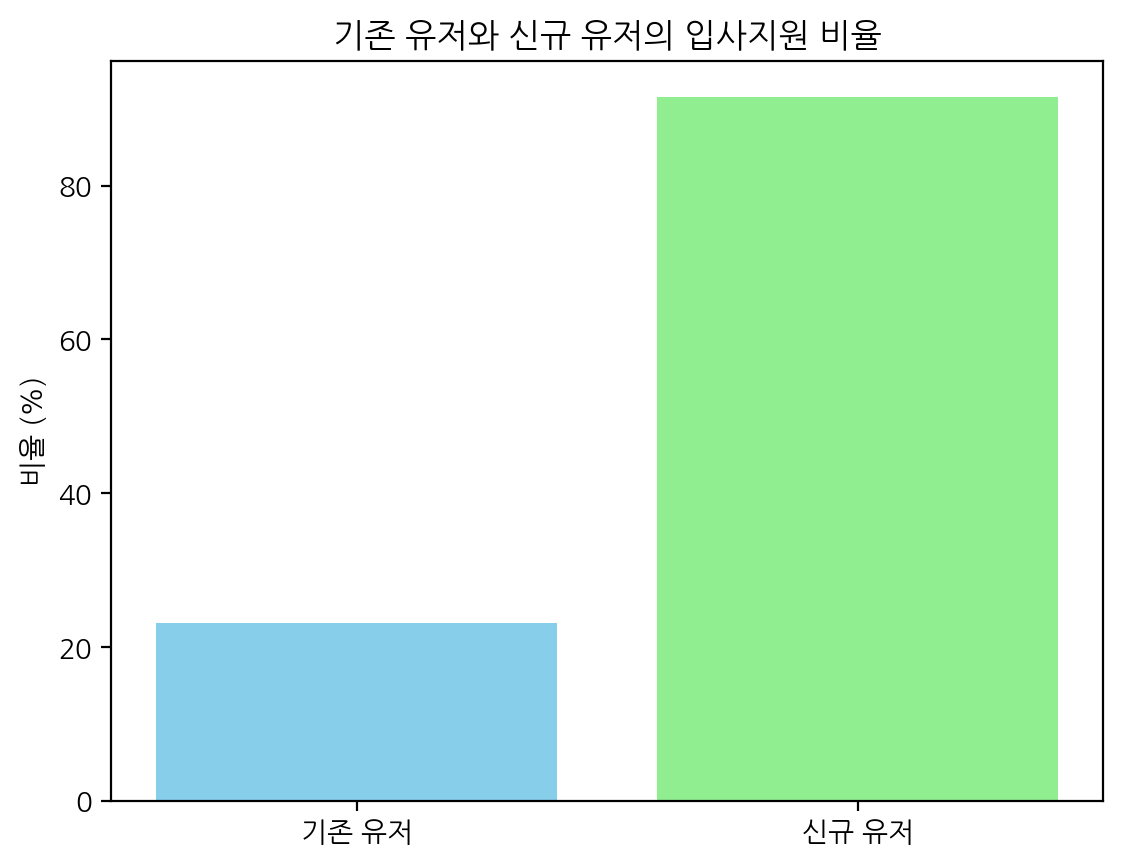

In [ ]:
labels = ['기존 유저', '신규 유저']
complete_ratios = [complete_old_ratio, complete_new_ratio]

plt.bar(labels, complete_ratios, color=['skyblue', 'lightgreen'])

plt.title('기존 유저와 신규 유저의 입사지원 비율')
plt.ylabel('비율 (%)')

plt.show()

#### 신규 유저 첫 지원 시점

In [ ]:
# 신규유저
new_user_ids= new_user['user_uuid'].unique()
# signup 시점 구하기
new_users_first_logs = new_user.sort_values(by='timestamp').drop_duplicates(subset='user_uuid', keep='first')
new_user_first = new_users_first_logs.sort_values(by='timestamp')

In [ ]:
new_app.describe()

first_log_time               application_time  \
count                            914                            914   
mean   2023-08-24 11:30:36.877461760  2023-09-13 09:26:52.041575424   
min              2023-05-24 02:03:37            2023-05-24 16:32:36   
25%    2023-07-04 14:50:52.249999872  2023-07-21 02:36:56.750000128   
50%              2023-08-23 02:53:27            2023-09-11 17:38:20   
75%       2023-10-05 12:48:43.500000  2023-11-03 09:04:57.249999872   
max              2023-12-29 05:34:29            2023-12-31 14:39:24   
std                              NaN                            NaN   

               time_to_completion  
count                         914  
mean   19 days 21:56:15.164113785  
min               0 days 00:01:10  
25%               0 days 20:20:31  
50%       11 days 19:17:31.500000  
75%       22 days 18:00:47.250000  
max             198 days 13:44:57  
std    28 days 20:01:25.159380990

- 회원가입 이후 첫 지원까지 평균 19일이 소요되었음
- 최소 1일, 최대 198일 정도 소요된 것으로 확인

#### 기존 유저 첫 지원 시점

In [ ]:
# 기존유저
old_user['user_uuid'].nunique()

10113

In [ ]:
# 기존 유저의 각 Id값 추출
old_users_ids= old_user['user_uuid'].unique()

In [ ]:
# timpstamp 컬럼값 변환
old_users_first = old_user_first.rename(columns={'timestamp': 'first_log_time'})
old_first_app = first_old_app.rename(columns={'timestamp': 'application_time'})

In [ ]:
# 각 테이블별 필요 컬럼만 새로 df화
old_first_log = old_users_first[['user_uuid', 'first_log_time']]
old_complete = old_first_app[['user_uuid', 'application_time']]

In [ ]:
old_first_app = pd.merge(old_first_log, old_complete, on='user_uuid', how='inner')
old_first_app

user_uuid      first_log_time  \
0     b460a9ef-9f73-4d1f-8341-3880765f0949 2023-05-24 00:02:10   
1     c02132bf-1d67-484d-809f-b36a97529bc1 2023-05-24 00:02:15   
2     27336dac-4a64-46c3-a0ef-20f7234ee2c6 2023-05-24 00:02:27   
3     139e3760-571c-466f-9087-f4e3bbab2434 2023-05-24 00:04:04   
4     fc88ff2e-5a0d-4c37-ad21-3ea830840e0e 2023-05-24 00:05:48   
...                                    ...                 ...   
2328  e957cf1e-22ef-4794-aef0-0dd88e6abb7a 2023-12-27 04:20:20   
2329  63b00e08-9338-4801-8f50-1557ba01cb56 2023-12-27 09:11:13   
2330  c0442006-c745-40c3-b61d-daf95f4b2587 2023-12-27 15:09:18   
2331  1488838c-4277-4bc7-80cf-f1d6307dcea4 2023-12-30 07:47:45   
2332  f815f5f3-81b7-4d55-b5bf-901e98665059 2023-12-31 10:00:31   

        application_time  
0    2023-05-28 06:34:49  
1    2023-06-04 12:41:52  
2    2023-06-28 00:30:17  
3    2023-05-25 18:35:20  
4    2023-05-30 04:50:56  
...                  ...  
2328 2023-12-27 04:48:43  
2329 2023-12-27 09:18:45  
2330 2023-12-27 15:16:09  
2331 2023-12-30 08:06:06  
2332 2023-12-31 10:17:08  

[2333 rows x 3 columns]

In [ ]:
# 날짜타입변환
old_first_app['first_log_time'] = pd.to_datetime(old_first_app['first_log_time'], errors='coerce')
old_first_app['application_time'] = pd.to_datetime(old_first_app['application_time'], errors='coerce')

In [ ]:
old_first_app['time_to_completion'] = old_first_app['application_time'] - old_first_app['first_log_time']
old_first_app['time_to_completion'].mean()

Timedelta('36 days 01:18:37.585940848')

In [ ]:
old_first_app.describe()

first_log_time               application_time  \
count                           2333                           2333   
mean   2023-07-08 16:47:34.606943744  2023-08-13 18:06:12.192884736   
min              2023-05-24 00:02:10            2023-05-24 07:50:37   
25%              2023-05-26 06:37:56            2023-06-14 10:18:23   
50%              2023-06-12 08:14:13            2023-07-31 04:18:34   
75%              2023-08-02 08:48:27            2023-10-10 05:27:19   
max              2023-12-31 10:00:31            2023-12-31 14:27:40   
std                              NaN                            NaN   

               time_to_completion  
count                        2333  
mean   36 days 01:18:37.585940848  
min               0 days 00:00:24  
25%               1 days 06:45:20  
50%              14 days 08:09:02  
75%              53 days 22:32:17  
max             216 days 06:03:00  
std    48 days 02:28:15.948863827

- 회원가입 이후 첫 지원까지 평균 36일이 소요되었음
- 최소 1일, 최대 216일 정도 소요된 것으로 확인

`1. 기존 유저와 신규유저의 각각 지원완료까지의 차이를 비교 결과`

    기존유저의 유저수 대비 지원 완료 비율(약 23.07%)
    신규 유저의 유저수 대비 지원 완료 비율(91.58%)
    약 70%의 차이를 보임

----------

`2.지원 완료까지의 걸리는 시간 비교`
    
    기존유저는 평균 약 36일
    신규 유저는 약 19일
    신규유저의 지원까지의 기간이 17일가량 빠름
----------
`3. 결론`

    기존유저에 집중하여 지원율을 올리는 것이 비즈니스적으로 현명한 판단


## 유저 행동 패턴 분석

### 기존 유저

#### 세팅

    - 1 데이터 필터링
    - 2 카테고리화 작업
    - 3 action_categories 중복 제거 및 flow 연결

    - 디버깅 속도 향상 차원에서 설계한 1 ~ 3 코드는 주석처리함
    - 해당 코드로 처리한 DF는 행동패턴분석 앞에 새롭게 read

In [ ]:
old_total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164227 entries, 0 to 164226
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_uuid           164227 non-null  object
 1   session_id          164227 non-null  int64 
 2   session_start_time  164227 non-null  object
 3   complete_time       164227 non-null  object
 4   action              164227 non-null  object
 5   utm_values          10664 non-null   object
 6   keyword             18863 non-null   object
 7   general_query       59098 non-null   object
dtypes: int64(1), object(7)
memory usage: 10.0+ MB


In [ ]:
# 날짜 타입 변경
old_total_df['session_start_time'] = pd.to_datetime(old_total_df['session_start_time'])
old_total_df['complete_time'] = pd.to_datetime(old_total_df['complete_time'])

#### 사용자 행동 패턴 분석
     패턴의 빈도와 신뢰도를 계산해 지원 신청과 강하게 연관된 패턴을 선별

     특정 패턴이 지원 신청으로 이어질 확률이 높다면, 플랫폼 설계개선에 활용할 수 있음

- 지원완료 이전 경로 리스트화

In [ ]:
# action_flow 컬럼 필터링
pattern_df = copy.deepcopy(old_total_df)

# 중복없는 경로 추출
pattern_df['action_list'] = pattern_df['action_flow'].apply(lambda x: x.split('->') if isinstance(x, str) else x)

pattern_df['action_list']

0         [채용공고 상세, 채용공고 목록, 기업 상세, 채용공고 목록, 채용공고 상세, 기업...
1         [채용공고 목록, 채용공고 상세, 이력서 작성 단계, 채용공고 목록, 채용공고 상세...
2                                                 [채용공고 상세]
3                                 [기업 상세, 채용공고 목록, 채용공고 상세]
4                                                 [채용공고 목록]
                                ...                        
164222    [채용공고 목록, 채용공고 상세, 지원 프로세스, 지원 완료, 채용공고 목록, 지원...
164223                                   [채용공고 목록, 채용공고 상세]
164224                                   [채용공고 목록, 채용공고 상세]
164225                                            [채용공고 상세]
164226                                            [채용공고 목록]
Name: action_list, Length: 164227, dtype: object

In [ ]:
def pre_complete_sequences(action_list):
    if not isinstance(action_list, list):  # 리스트인지 확인
        return []
    sequences = []
    current_seq = []
    for action in action_list:
        if action == '지원 완료':
            if current_seq:
                sequences.append(current_seq[:])
            current_seq = []
        else:
            current_seq.append(action)
    return sequences

test_data = ['기타', '검색', '지원', '지원 완료']
print(pre_complete_sequences(test_data))

[['기타', '검색', '지원']]


In [ ]:
# 세션별 시간 차이 계산
pattern_df['session_duration'] = ((pattern_df['complete_time'] - pattern_df['session_start_time']).dt.total_seconds() / 60).round(2)

# 행동 시퀀스 함수 적용
pattern_df['pre_complete_sequences'] = pattern_df['action_list'].apply(pre_complete_sequences)

In [ ]:
pattern_df['session_duration'].describe()

count    164227.000000
mean          5.911160
std          13.587598
min           0.000000
25%           0.000000
50%           0.520000
75%           4.670000
max         365.870000
Name: session_duration, dtype: float64

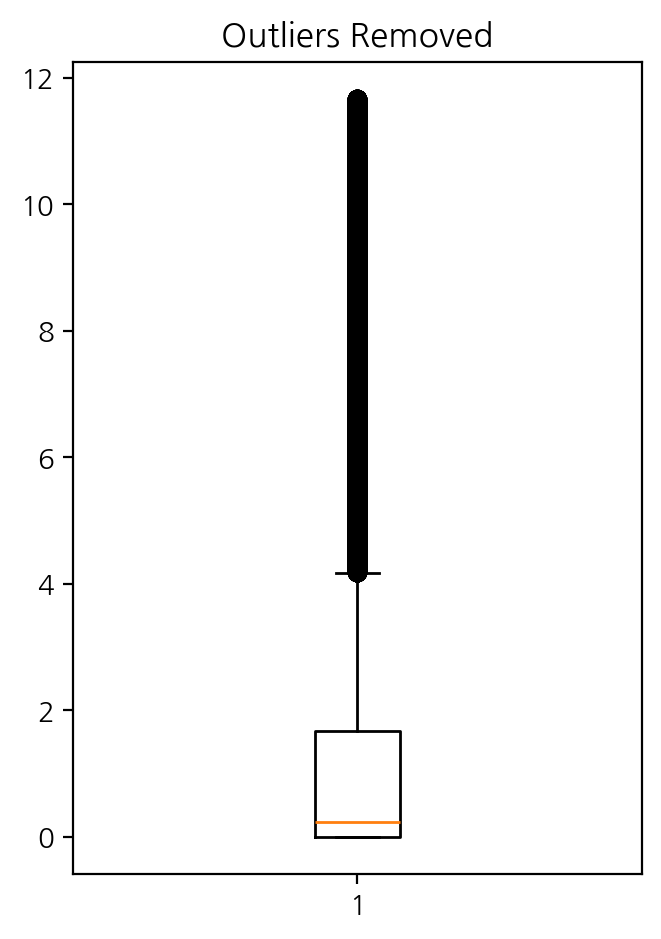

In [ ]:
# 이상치 제거 후 박스플롯 생성
Q1 = pattern_df['session_duration'].quantile(0.25)
Q3 = pattern_df['session_duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거된 데이터
df_no_outliers = pattern_df[(pattern_df['session_duration'] >= lower_bound) & (pattern_df['session_duration'] <= upper_bound)]

plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers['session_duration'])
plt.title('Outliers Removed')

plt.tight_layout()
plt.show()

In [ ]:
# 세션 경과 시간 데이터프레임화
df_no_outliers = df_no_outliers['session_duration'].describe().reset_index().drop(0)
df_no_outliers

index  session_duration
1  mean          1.463144
2   std          2.510613
3   min          0.000000
4   25%          0.000000
5   50%          0.230000
6   75%          1.670000
7   max         11.670000

- pre_complete_sequences 컬럼 모든 값의 리스트 해제 및 빈도 분석

In [ ]:
# 모든 pre_complete_sequences를 평탄화하여 빈도 계산
all_sequences = pattern_df['pre_complete_sequences'].explode().dropna()
sequence_counts = Counter([tuple(seq) for seq in all_sequences])

sequence_counts_df = pd.DataFrame(list(sequence_counts.items()), columns=['path', 'count']).sort_values(by='count', ascending=False).reset_index(drop=True)
sequence_counts_df

path  count
0                                    (채용공고 상세, 지원 프로세스)   2986
1                                            (지원 프로세스,)   2545
2                           (채용공고 목록, 채용공고 상세, 지원 프로세스)   1926
3                  (채용공고 상세, 지원 프로세스, 채용공고 상세, 지원 프로세스)    401
4                    (기업 상세, 채용공고 목록, 채용공고 상세, 지원 프로세스)    299
...                                                 ...    ...
2807                         (프로필 조회, 채용공고 상세, 지원 프로세스)      1
2808  (채용공고 상세, 채용공고 목록, 지원 프로세스, 기업 상세, 채용공고 목록, 채용...      1
2809        (지원 프로세스, 기업 상세, 지원 프로세스, 채용공고 목록, 지원 프로세스)      1
2810  (채용공고 상세, 기업 상세, 채용공고 목록, 채용공고 상세, 기업 상세, 채용공고...      1
2811  (채용공고 목록, 채용공고 상세, 지원 프로세스, 채용공고 상세, 이력서 작성 단계...      1

[2812 rows x 2 columns]

In [ ]:
sequence_counts_df['ratio'] = (sequence_counts_df['count'] / sequence_counts_df['count'].sum() * 100).round(2)
sequence_counts_df.head(20)

path  count  ratio
0                                  (채용공고 상세, 지원 프로세스)   2986  19.33
1                                          (지원 프로세스,)   2545  16.48
2                         (채용공고 목록, 채용공고 상세, 지원 프로세스)   1926  12.47
3                (채용공고 상세, 지원 프로세스, 채용공고 상세, 지원 프로세스)    401   2.60
4                  (기업 상세, 채용공고 목록, 채용공고 상세, 지원 프로세스)    299   1.94
5                                  (채용공고 목록, 지원 프로세스)    298   1.93
6       (채용공고 목록, 채용공고 상세, 채용공고 목록, 채용공고 상세, 지원 프로세스)    280   1.81
7                         (지원 프로세스, 채용공고 상세, 지원 프로세스)    233   1.51
8                (채용공고 상세, 채용공고 목록, 채용공고 상세, 지원 프로세스)    197   1.28
9       (채용공고 목록, 채용공고 상세, 지원 프로세스, 채용공고 상세, 지원 프로세스)    173   1.12
10                         (북마크 관리, 채용공고 상세, 지원 프로세스)    129   0.84
11                    (검색, 채용공고 목록, 채용공고 상세, 지원 프로세스)    107   0.69
12               (지원 프로세스, 채용공고 목록, 채용공고 상세, 지원 프로세스)     99   0.64
13             (이력서 작성 단계, 채용공고 목록, 채용공고 상세, 지원 프로세스)     94   0.61
14  (채용공고 목록, 채용공고 상세, 지원 프로세스, 채용공고 목록, 채용공고 상세, ...     86   0.56
15                          (채용공고 상세, 기업 상세, 지원 프로세스)     72   0.47
16  (채용공고 목록, 채용공고 상세, 채용공고 목록, 채용공고 상세, 채용공고 목록, ...     71   0.46
17  (채용공고 상세, 지원 프로세스, 채용공고 상세, 지원 프로세스, 채용공고 상세, ...     62   0.40
18           (채용공고 목록, 검색, 채용공고 목록, 채용공고 상세, 지원 프로세스)     60   0.39
19                (기업 페이지, 채용공고 목록, 채용공고 상세, 지원 프로세스)     59   0.38

- 각 시퀀스 길이 계산 및 행동 빈도 확인

In [ ]:
# 시퀀스 길이 계산
pattern_df['sequence_lengths'] = pattern_df['pre_complete_sequences'].apply(lambda x: [len(seq) for seq in x])

# 행동 빈도 (action_categories 활용)
action_freq = pattern_df.explode('action_list')['action_list'].value_counts()
action_freq = action_freq.reset_index()
action_freq

action_list   count
0      채용공고 목록  116193
1      채용공고 상세   94876
2                54506
3        기업 상세   53975
4      지원 프로세스   30295
5           검색   20566
6        지원 완료   15565
7    이력서 작성 단계   11979
8       기업 페이지    7037
9       북마크 관리    4177
10      프로필 조회     983

In [ ]:
# 1) action_list → funnel 단계 매핑 딕셔너리 정의
step_map = {
    '채용공고 목록': 'top',
    '기업 상세':     'top',
    '검색':         'top',
    '채용공고 상세': 'detail',
    '지원 프로세스': 'process',
    '지원 완료':    'complete'
}

# DataFrame으로 그룹화
funnel_df = (
    action_freq
    .assign(step=action_freq['action_list'].map(step_map))
    .groupby('step', as_index=False)['count'].sum()
    .set_index('step')
    .reindex(['top', 'detail', 'process', 'complete'])
    .reset_index()
)
funnel_df

step   count
0       top  190734
1    detail   94876
2   process   30295
3  complete   15565

In [ ]:
# 퍼널 시각화
fig = px.funnel(
    x=funnel_df['count'],
    y=funnel_df['step'],
    title='기존 유저 단계별 이탈 퍼널',
    width=800,
    height=600
)
# 비율 
fig.update_traces(textinfo='value+percent initial')
fig.update_layout(yaxis_title=None)
fig.show()

- 채용공고 목록까지 확인 후 지원 완료까지 87% 감소

In [ ]:
action_freq['ratio'] = (action_freq['count'] / action_freq['count'].sum() * 100).round(2)
action_freq

action_list   count  ratio
0      채용공고 목록  116193  28.33
1      채용공고 상세   94876  23.13
2                54506  13.29
3        기업 상세   53975  13.16
4      지원 프로세스   30295   7.39
5           검색   20566   5.01
6        지원 완료   15565   3.79
7    이력서 작성 단계   11979   2.92
8       기업 페이지    7037   1.72
9       북마크 관리    4177   1.02
10      프로필 조회     983   0.24

- 사용자 이동경로 패턴 빈도 확인

In [ ]:
paths = pattern_df['action_flow']

# 원하는 경로
five_step_paths = paths[paths.str.count('->') == 4]

# 경로별 빈도수 계산
path_freq = five_step_paths.value_counts().reset_index()
path_freq.columns = ['Path', 'Count']

# 빈도율 계산 (5단계 경로 세션 대비 비율)
total_five_step_sessions = len(five_step_paths)
path_freq['Frequency'] = path_freq['Count'] / total_five_step_sessions

temp4 = path_freq
with pd.option_context('display.max_colwidth', None):
    display(temp4.head(30))

Path  Count  Frequency
0     채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세->채용공고 목록    292   0.066545
1       기업 상세->채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세    145   0.033045
2           기업 상세->채용공고 목록->기업 상세->채용공고 목록->기업 상세    133   0.030310
3       채용공고 목록->채용공고 상세->기업 상세->채용공고 목록->채용공고 상세    129   0.029398
4         기업 상세->채용공고 목록->기업 상세->채용공고 목록->채용공고 상세    118   0.026892
5       채용공고 목록->채용공고 상세->지원 프로세스->지원 완료->채용공고 상세    117   0.026664
6     채용공고 상세->채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세     87   0.019827
7         기업 상세->채용공고 목록->채용공고 상세->채용공고 목록->기업 상세     61   0.013902
8          검색->채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세     54   0.012306
9         기업 상세->채용공고 목록->채용공고 상세->기업 상세->채용공고 목록     53   0.012078
10        기업 상세->채용공고 목록->채용공고 상세->지원 프로세스->지원 완료     52   0.011851
11      채용공고 목록->채용공고 상세->지원 프로세스->지원 완료->채용공고 목록     52   0.011851
12    채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세->지원 프로세스     52   0.011851
13        채용공고 목록->기업 상세->채용공고 목록->기업 상세->채용공고 목록     46   0.010483
14      채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세->기업 상세     44   0.010027
15         채용공고 목록->검색->채용공고 상세->채용공고 목록->채용공고 상세     39   0.008888
16              검색->채용공고 목록->검색->채용공고 목록->채용공고 상세     38   0.008660
17        채용공고 목록->채용공고 상세->기업 상세->채용공고 목록->기업 상세     35   0.007976
18              채용공고 목록->검색->채용공고 목록->검색->채용공고 목록     33   0.007521
19             검색->기업 상세->채용공고 목록->기업 상세->채용공고 목록     33   0.007521
20    채용공고 목록->채용공고 상세->지원 프로세스->채용공고 목록->채용공고 상세     28   0.006381
21     기업 페이지->채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세     27   0.006153
22         채용공고 목록->검색->채용공고 목록->채용공고 상세->채용공고 목록     27   0.006153
23        채용공고 상세->기업 상세->채용공고 목록->채용공고 상세->기업 상세     27   0.006153
24         채용공고 목록->채용공고 상세->검색->채용공고 목록->채용공고 상세     26   0.005925
25      채용공고 목록->채용공고 상세->채용공고 목록->기업 상세->채용공고 목록     24   0.005469
26  이력서 작성 단계->채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세     23   0.005242
27        채용공고 목록->채용공고 상세->기업 상세->채용공고 상세->기업 상세     22   0.005014
28      채용공고 목록->기업 상세->채용공고 목록->채용공고 상세->채용공고 목록     21   0.004786
29      채용공고 목록->채용공고 상세->채용공고 목록->기업 상세->채용공고 상세     21   0.004786

#### 월별 코호트 분석으로 잔존율 확인

In [ ]:
# 각 유저별 첫 번째 세션 시간을 추출
user_first_session = old_user.groupby('user_uuid')['timestamp'].min().reset_index()
user_first_session.columns = ['user_uuid', 'first_session_time']

# 유저별 첫 번째 지원완료한 세션 시간을 계산
user_first_apply = pattern_df.groupby('user_uuid')['session_start_time'].min().reset_index()

# 데이터 병합
user_data = user_first_session.merge(user_first_apply, on='user_uuid', how='left')

In [ ]:
# 첫 세션 시간을 기반으로 월 단위 코호트 생성
user_data['cohort_month'] = user_data['first_session_time'].dt.to_period('M')

# 모든 세션의 시작 시간을 월 단위로 변환
pattern_df['session_month'] = pattern_df['session_start_time'].dt.to_period('M')

# 유저가 해당 월에 활동했는지 확인
user_activity = pattern_df[['user_uuid', 'session_month']].drop_duplicates()

# 코호트 월 데이터 별도 준비
cohort_activity = user_data[['user_uuid', 'cohort_month']].copy()
cohort_activity['session_month'] = cohort_activity['cohort_month']  # 코호트 월을 세션 월로 설정

# 기존 활동 데이터와 코호트 월 데이터를 병합 (0개월 데이터 포함)
user_activity = pd.concat([user_activity, cohort_activity[['user_uuid', 'session_month']]], ignore_index=True).drop_duplicates()

# 유저 활동 데이터에 코호트 월 정보를 병합
user_activity = user_activity.merge(user_data[['user_uuid', 'cohort_month']], on='user_uuid')

# 코호트 월을 숫자 형태로 변환 (연도 x 12 + 월)
user_activity['cohort_month_num'] = (user_activity['cohort_month'].dt.year * 12 + user_activity['cohort_month'].dt.month)

# 세션 월을 숫자 형태로 변환 (연도 x 12 + 월)
user_activity['session_month_num'] = (user_activity['session_month'].dt.year * 12 + user_activity['session_month'].dt.month)

# 코호트 월로부터 경과한 월 수 차이 계산
user_activity['months_since_cohort'] = user_activity['session_month_num'] - user_activity['cohort_month_num']

# 고유 활동한 유저 수 계산
retention_table = user_activity.groupby(['cohort_month', 'months_since_cohort'])['user_uuid'].nunique().reset_index()

# 월별 전체 유저 수 계산
cohort_sizes = user_data.groupby('cohort_month')['user_uuid'].nunique().reset_index()

# 코호트 크기 데이터의 컬럼 이름을 변경
cohort_sizes.columns = ['cohort_month', 'cohort_size']

# 고유 활동한 유저 수 테이블과 코호트 크기 데이터를 병합
retention_table = retention_table.merge(cohort_sizes, on='cohort_month')

# 잔존율 계산
retention_table['retention_rate'] = retention_table['user_uuid'] / retention_table['cohort_size']

retention_table

cohort_month  months_since_cohort  user_uuid  cohort_size  retention_rate
0       2023-05                    0       2785         2785        1.000000
1       2023-05                    1       1877         2785        0.673968
2       2023-05                    2       1612         2785        0.578815
3       2023-05                    3       1457         2785        0.523160
4       2023-05                    4       1330         2785        0.477558
5       2023-05                    5       1211         2785        0.434829
6       2023-05                    6       1168         2785        0.419390
7       2023-05                    7        896         2785        0.321724
8       2023-06                    0       2510         2510        1.000000
9       2023-06                    1       1216         2510        0.484462
10      2023-06                    2       1014         2510        0.403984
11      2023-06                    3        831         2510        0.331076
12      2023-06                    4        753         2510        0.300000
13      2023-06                    5        716         2510        0.285259
14      2023-06                    6        576         2510        0.229482
15      2023-07                    0       1527         1527        1.000000
16      2023-07                    1        647         1527        0.423707
17      2023-07                    2        497         1527        0.325475
18      2023-07                    3        416         1527        0.272430
19      2023-07                    4        394         1527        0.258022
20      2023-07                    5        298         1527        0.195154
21      2023-08                    0        974          974        1.000000
22      2023-08                    1        380          974        0.390144
23      2023-08                    2        281          974        0.288501
24      2023-08                    3        261          974        0.267967
25      2023-08                    4        195          974        0.200205
26      2023-09                    0        733          733        1.000000
27      2023-09                    1        291          733        0.396999
28      2023-09                    2        221          733        0.301501
29      2023-09                    3        138          733        0.188267
30      2023-10                    0        611          611        1.000000
31      2023-10                    1        234          611        0.382979
32      2023-10                    2        145          611        0.237316
33      2023-11                    0        565          565        1.000000
34      2023-11                    1        165          565        0.292035
35      2023-12                    0        408          408        1.000000

In [ ]:
# 월별 잔존율 피벗테이블화
retention_pivot = retention_table.pivot(index='cohort_month', columns='months_since_cohort', values='retention_rate')[1:]
retention_pivot.round(2)

months_since_cohort    0     1     2     3     4     5     6   7
cohort_month                                                    
2023-06              1.0  0.48  0.40  0.33  0.30  0.29  0.23 NaN
2023-07              1.0  0.42  0.33  0.27  0.26  0.20   NaN NaN
2023-08              1.0  0.39  0.29  0.27  0.20   NaN   NaN NaN
2023-09              1.0  0.40  0.30  0.19   NaN   NaN   NaN NaN
2023-10              1.0  0.38  0.24   NaN   NaN   NaN   NaN NaN
2023-11              1.0  0.29   NaN   NaN   NaN   NaN   NaN NaN
2023-12              1.0   NaN   NaN   NaN   NaN   NaN   NaN NaN

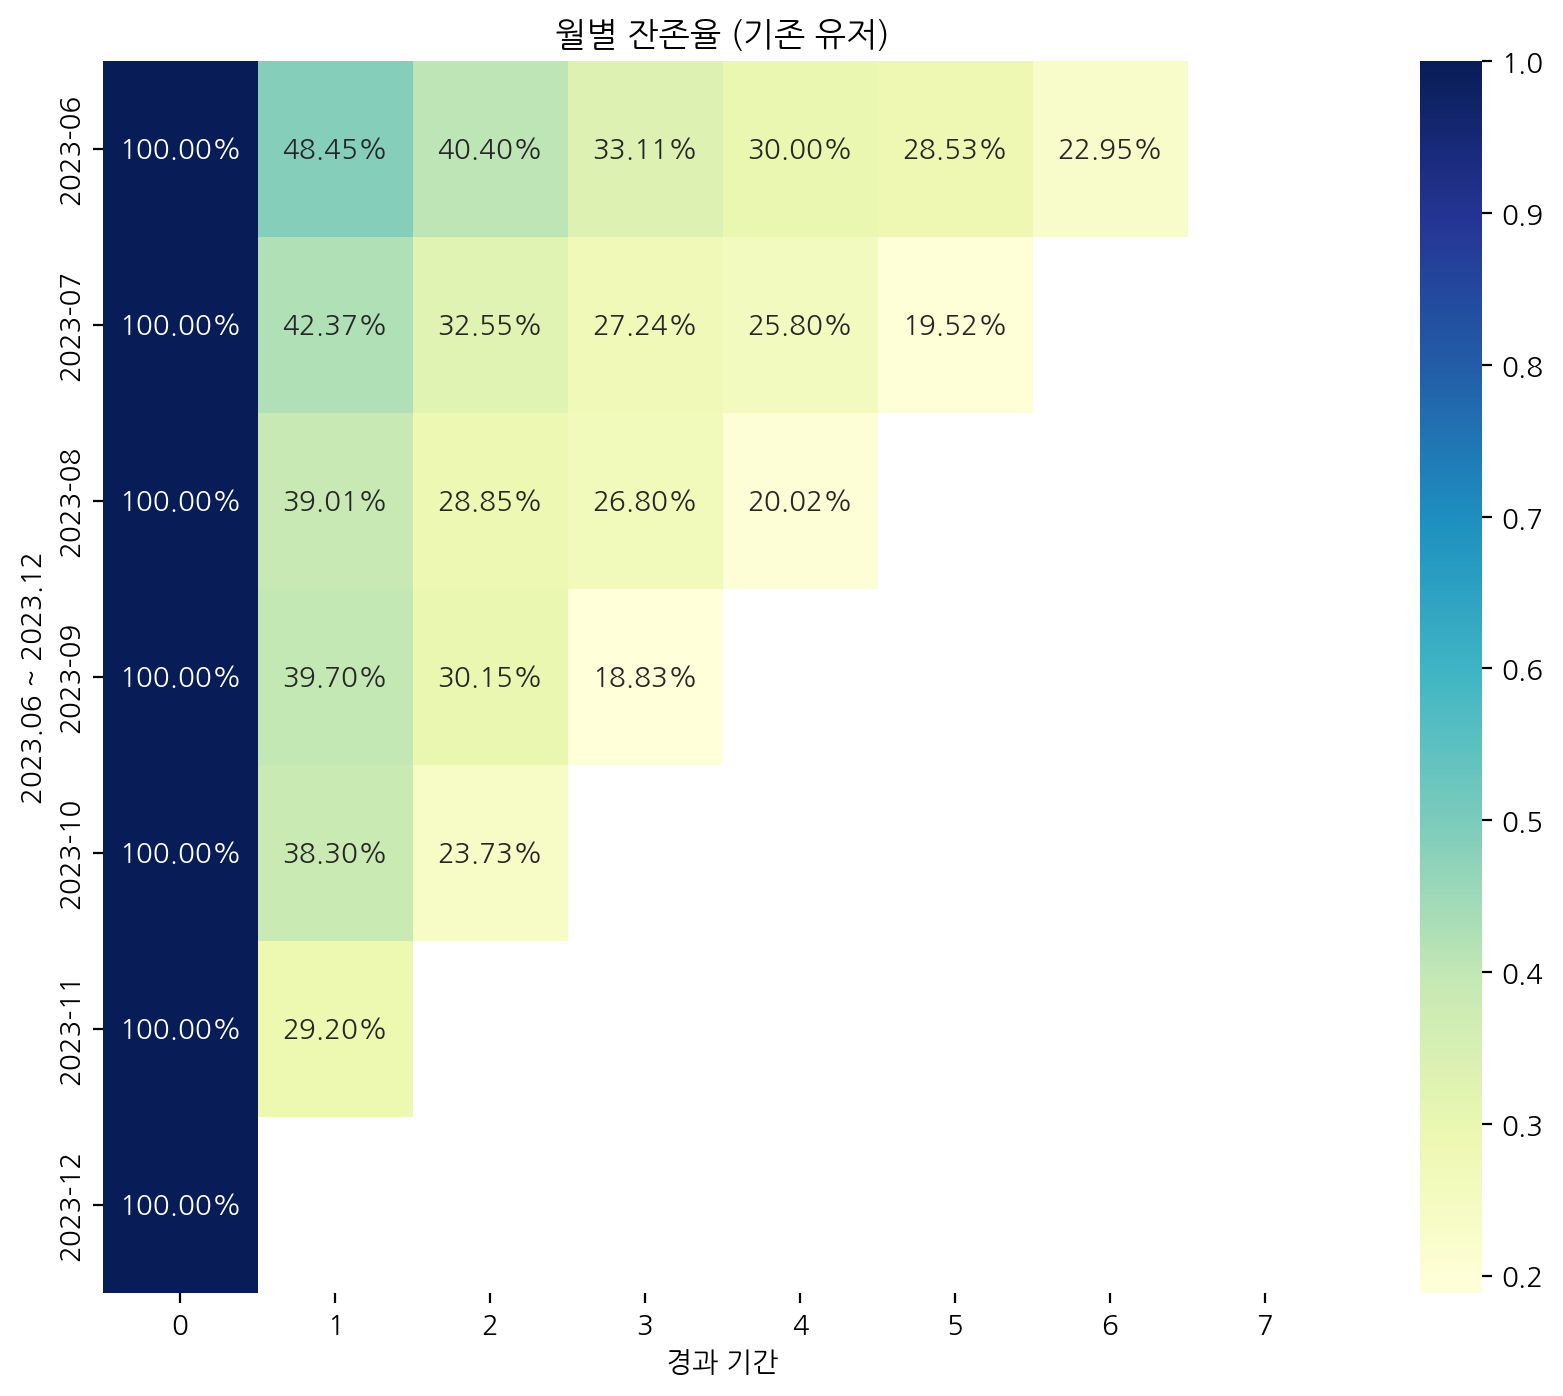

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=retention_pivot, annot=True, fmt=".2%", cmap="YlGnBu")

# 레이블 및 제목 설정
plt.title('월별 잔존율 (기존 유저)')
plt.xlabel('경과 기간')
plt.ylabel('2023.06 ~ 2023.12')

# 그래프 표시
plt.show()

### 신규 유저

In [ ]:
new_funnel = new_user['action_categories'].value_counts().reset_index()

In [ ]:
new_funnel[new_funnel['action_categories'].isin(['채용공고 목록', '기업 상세', '검색'])]

action_categories  count
3           채용공고 목록  30207
4             기업 상세  13290
7                검색   3624

In [ ]:
new_funnel

action_categories  count
0                     97540
1            채용공고 상세  43803
2            지원 프로세스  31842
3            채용공고 목록  30207
4              기업 상세  13290
5          이력서 작성 단계   8594
6              지원 완료   4783
7                 검색   3624
8             기업 페이지   1507
9             북마크 관리   1238
10            프로필 조회    348

In [ ]:
# 1) action_list → funnel 단계 매핑 딕셔너리 정의
step_map = {
    '채용공고 목록': 'top',
    '기업 상세':     'top',
    '검색':         'top',
    '채용공고 상세': 'detail',
    '지원 프로세스': 'process',
    '지원 완료':    'complete'
}

# DataFrame으로 그룹화
new_funnel_df = (
    new_funnel
    .assign(step=new_funnel['action_categories'].map(step_map))
    .groupby('step', as_index=False)['count'].sum()
    .set_index('step')
    .reindex(['top', 'detail', 'process', 'complete'])
    .reset_index()
)
new_funnel_df

step  count
0       top  47121
1    detail  43803
2   process  31842
3  complete   4783

In [ ]:
# 퍼널 시각화
fig = px.funnel(
    x=new_funnel_df['count'],
    y=new_funnel_df['step'],
    title='신규 유저 단계별 이탈 퍼널',
    labels='퍼널',
    width=800,
    height=600
)
# 비율 
fig.update_traces(textinfo='value+percent initial')
fig.update_layout(yaxis_title=None)
fig.show()

### 기존 유저의 행동로그 불러오기

In [ ]:
action_log = pd.read_csv('data/유저별 행동 분류.csv')

In [ ]:
# 유저별 활동(action_category) 전체 로그 집계 (중복 포함)
user_action_log = (
    action_log
    .groupby(['user_uuid', 'user_type', 'action_category'])
    .size()
    .reset_index(name='count')
    .sort_values(['user_uuid', 'count'], ascending=[True, False])
)
user_action_log

user_uuid user_type action_category  count
2      000681b4-bb66-4ccf-9786-f0066d13a34e    oldbie         채용공고 목록     25
3      000681b4-bb66-4ccf-9786-f0066d13a34e    oldbie         채용공고 상세     14
1      000681b4-bb66-4ccf-9786-f0066d13a34e    oldbie       이력서 작성 단계      4
0      000681b4-bb66-4ccf-9786-f0066d13a34e    oldbie           기업 상세      2
4      000d53f7-5ddd-48ba-8dab-bb77b157e13a    oldbie         채용공고 상세      2
...                                     ...       ...             ...    ...
35958  ffff25ca-c1d7-4fc2-891b-b0df92f95092    oldbie         채용공고 목록     14
35959  ffff25ca-c1d7-4fc2-891b-b0df92f95092    oldbie         채용공고 상세     11
35956  ffff25ca-c1d7-4fc2-891b-b0df92f95092    oldbie           지원 완료      6
35954  ffff25ca-c1d7-4fc2-891b-b0df92f95092    oldbie              검색      2
35955  ffff25ca-c1d7-4fc2-891b-b0df92f95092    oldbie           기업 상세      2

[35960 rows x 4 columns]

In [ ]:
user_action_pivot = user_action_log.pivot(
    index='user_uuid', columns='action_category', values='count'
).fillna(0).astype(int).reset_index()

user_action_pivot

action_category                             user_uuid  검색  기업 상세  기업 페이지  \
0                000681b4-bb66-4ccf-9786-f0066d13a34e   0      2       0   
1                000d53f7-5ddd-48ba-8dab-bb77b157e13a   0      0       0   
2                000e8610-16d3-4e9e-bf50-202d191ffac4   0      1       0   
3                0017a738-4fcc-441e-983b-a6033890a9db   0      3       0   
4                004a89cc-d69b-4336-9905-4fd306e3ef80   7      4       2   
...                                               ...  ..    ...     ...   
8540             ffc31c75-38c5-4574-906f-4efee3e9b319   0      1       0   
8541             ffcc939f-00a9-4ae1-86b9-b1c5d04dc08c   2      4       0   
8542             ffe6aee0-85cc-45e2-aa5e-129751dff08e  12     93      12   
8543             ffeba6fd-76b6-41cc-8535-de3d9d86e079   2     19       1   
8544             ffff25ca-c1d7-4fc2-891b-b0df92f95092   2      2       0   

action_category  북마크 관리  이력서 작성 단계  지원 완료  지원 프로세스  채용공고 목록  채용공고 상세  프로필 조회  
0                     0          4      0        0       25       14       0  
1                     0          0      0        0        0        2       0  
2                     0          0      0        0        3        2       0  
3                     0          0      0        1       12        6       0  
4                     0         33      0        0       16        4       0  
...                 ...        ...    ...      ...      ...      ...     ...  
8540                  0          0      0        0        0        0       0  
8541                  0          0      0        0        9       11       0  
8542                  2        124     10      154      191      261       1  
8543                  3         21     12       55      292      360       0  
8544                  0          0      6       27       14       11       0  

[8545 rows x 11 columns]

In [ ]:
# 유저별 user_type만 따로 추출
user_type_info = user_action_log[['user_uuid', 'user_type']].drop_duplicates()

# user_action_pivot과 병합
user_action_pivot = user_action_pivot.merge(user_type_info, on='user_uuid', how='left')
user_action_pivot.drop(columns={'user_type'}, inplace=True)

In [ ]:
# user_type 기준으로 행동 평균값 집계
user_type_behavior_mean = (
    user_action_pivot
    .drop(columns=['user_uuid'])
    .mean(numeric_only=True)
    .round(2)
)

In [ ]:
# 기존 유저 행동 DF화
user_type_behavior_mean = user_type_behavior_mean.reset_index()
user_type_behavior_mean.rename(columns={'index':'행동 유형', 0: '평균 횟수'}, inplace=True)
user_type_behavior_mean.sort_values('평균 횟수', ascending=False)

행동 유형  평균 횟수
8    채용공고 상세  23.04
7    채용공고 목록  18.10
6    지원 프로세스  11.92
1      기업 상세   8.31
4  이력서 작성 단계   3.49
0         검색   2.85
5      지원 완료   1.90
2     기업 페이지   0.92
3     북마크 관리   0.58
9     프로필 조회   0.15

## 유저 클러스터링

### 작업환경 설정

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows

### 클러스터 설정

In [ ]:
df = user_action_pivot

In [ ]:
# 유저 행동 데이터에서 숫자형 컬럼만 추출
X = df.drop(columns=['user_uuid']).select_dtypes(include='number')

# 유저별 총합 기준 비중화 (정규화)
X_normalized = X.div(X.sum(axis=1), axis=0).fillna(0)

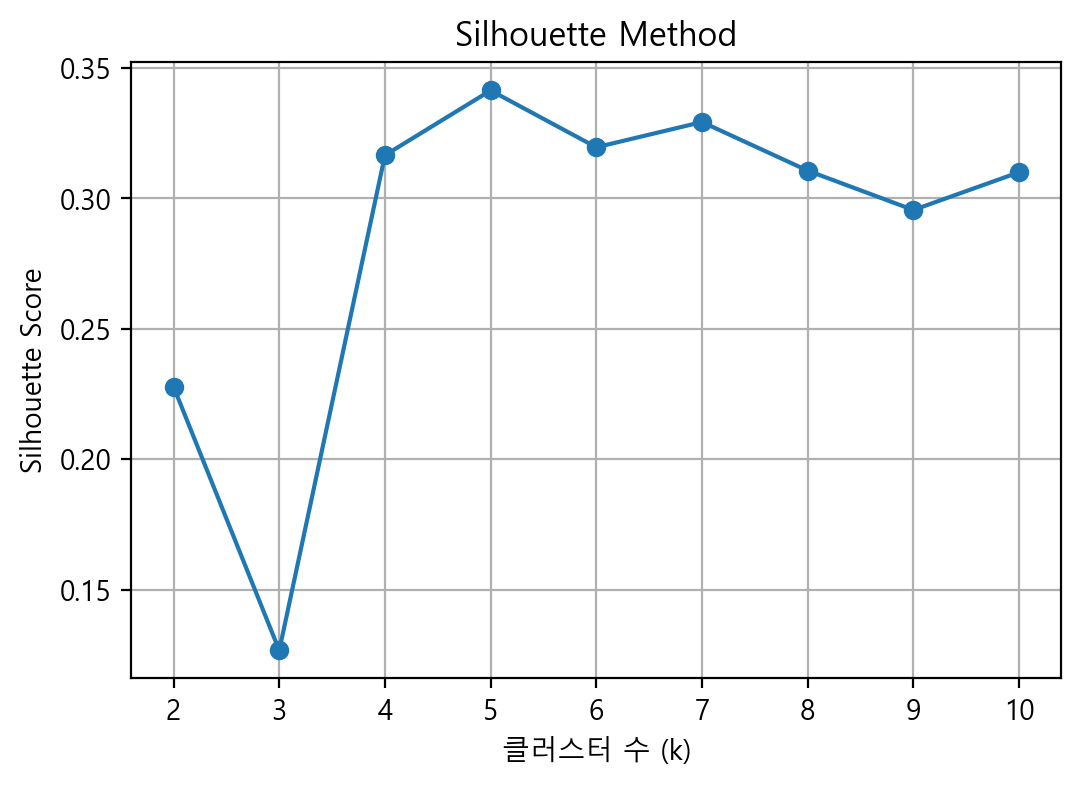

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_normalized)
    score = silhouette_score(X_normalized, labels)
    silhouette_scores.append(score)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

In [ ]:
from IPython.display import display
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

# 데이터 로드
df_work = user_action_pivot.copy()

# 1) 숫자형 피처만 추출 (user_uuid, user_type 제외)
X = df_work.drop(columns=['user_uuid', 'user_type'], errors='ignore') \
           .select_dtypes(include='number')
X_norm = X.div(X.sum(axis=1), axis=0).fillna(0)

# 2) 분포 완화 (Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')
X_trans = pt.fit_transform(X_norm)

# 3) PCA 차원 축소 (설명분산 95%)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_trans)

# 4) 최적 모델(KMeans)로 클러스터링
km = KMeans(n_clusters=4, random_state=42)
df_work['cluster_kmeans'] = km.fit_predict(X_pca)

cluster_profile = (
    df_work
    .groupby('cluster_kmeans')[X.columns]
    .mean()
    .round(2)
    .reset_index()
)
print("\n=== Cluster Profile ===")
display(cluster_profile)


=== Cluster Profile ===


cluster_kmeans    검색  기업 상세  기업 페이지  북마크 관리  이력서 작성 단계  지원 완료  지원 프로세스  \
0               0  4.57  13.79    1.33    0.02       7.42   6.80    40.41   
1               1  1.93   4.61    0.59    0.00       0.77   0.04     0.58   
2               2  1.51   4.68    0.44    0.00       2.22   0.00     0.10   
3               3  7.18  23.25    2.99    6.49       9.76   4.30    30.58   

   채용공고 목록  채용공고 상세  프로필 조회  
0    34.43    48.20    0.21  
1    14.07    12.11    0.05  
2     1.98     0.85    0.11  
3    50.58    84.43    0.61

In [ ]:
# 1) df_work에 한글 레이블 매핑
cluster_labels = {
    0: '최고 전환형',
    1: '공고 탐색형',
    2: '비활성형',
    3: '탐색 후 지원형'
}
df_work['cluster_label'] = df_work['cluster_kmeans'].map(cluster_labels)

In [ ]:
# 유저별 클러스터 라벨 확인
user_clusters = df_work[['user_uuid', 'cluster_label']]
user_clusters['cluster_label'].value_counts()

cluster_label
공고 탐색형      3277
비활성형        2617
최고 전환형      1899
탐색 후 지원형     752
Name: count, dtype: int64

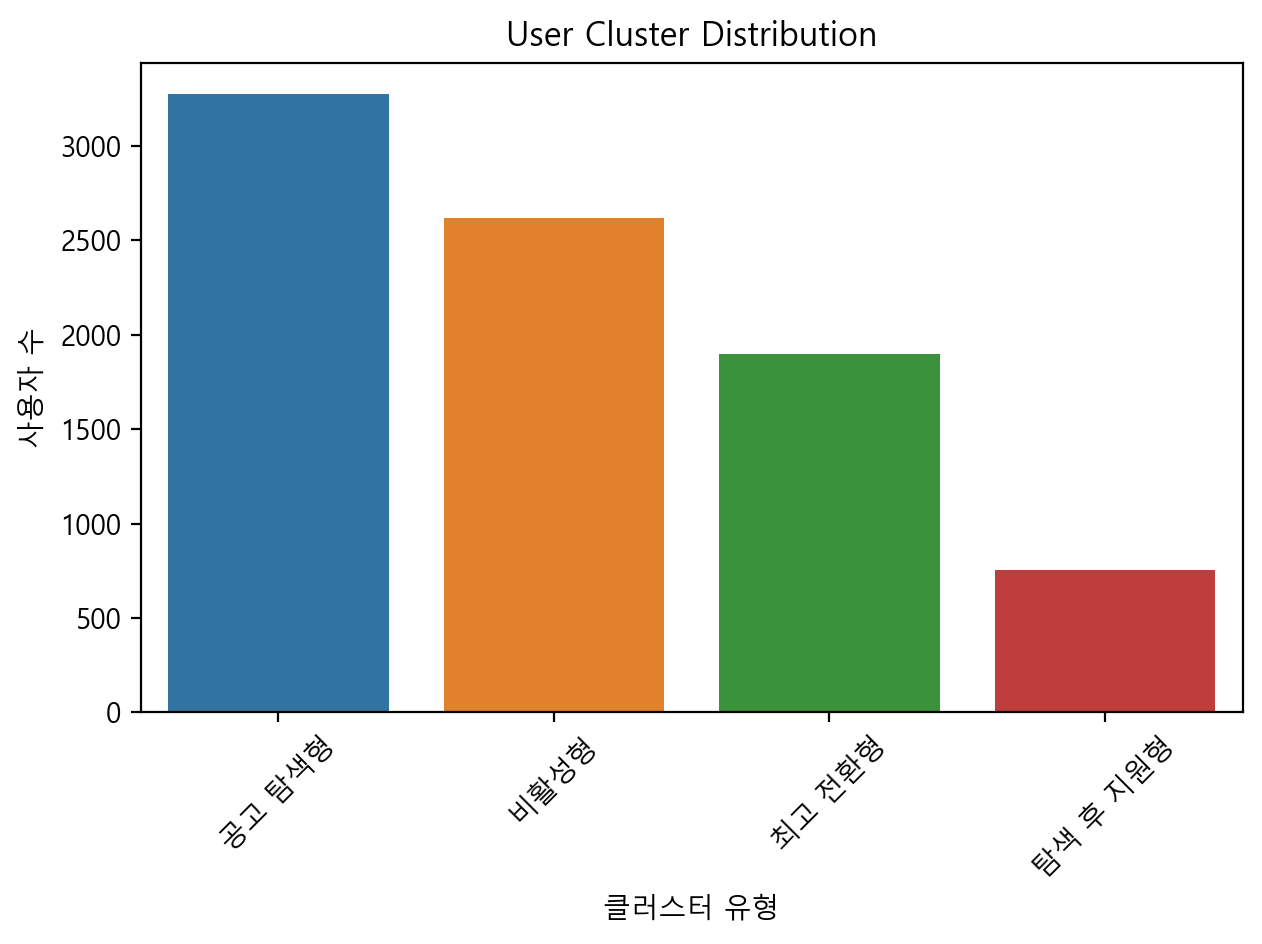

In [ ]:
user_cluster_chart = user_clusters['cluster_label'].value_counts().reset_index()

# 시각화
plt.figure()
sns.barplot(x='cluster_label', y='count', data=user_cluster_chart, hue='cluster_label')

plt.title('User Cluster Distribution')
plt.xlabel('클러스터 유형')
plt.ylabel('사용자 수')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 클러스터링 분석

***
---
    AARRR 퍼널 분석을 검토하는 과정에서, 단순 가입 시점만으로는 유저의 행동 차이를 충분히 이해하기 어렵다고 판단

    유저 행동 패턴을 심층적으로 이해하기 위한 추가 분석을 진행

-------

    1. URL 경로를 활용해 유저의 활동 내역을 분류
    2. 세션 단위로 행동을 시퀀스화하여 클러스터링을 수행


-----

        클러스터링 군집별 패턴 확인
    군집별 특징을 확인한 후 고객의 특성 파악 -> 총 4개의 클러스터 그룹으로 유저를 구분
    이를 통해 고객 관리를 하는 데 있어서 인사이트 도출을 할 수 있음
    궁극적으로 이들의 전환율을 올리는 전략
***
---

### 데이터 세팅

#### 군집별 특징 확인

In [ ]:
user_clusters['cluster_label'].value_counts()

cluster_label
공고 탐색형      3277
비활성형        2617
최고 전환형      1899
탐색 후 지원형     752
Name: count, dtype: int64

In [ ]:
# df 병합 및 컬럼 제거
clustered_pattern = pattern_df.merge(user_clusters, on='user_uuid', how='inner')

##### 월별 세션 평균

In [ ]:
# 세션, 유저 아이디, 세션 월 그룹화
session_counts = (
    clustered_pattern
    .groupby(['cluster_label','user_uuid','session_month'])
    .size()
    .reset_index(name='session_count')
)

# 클러스터별 월별 평균 세션 수
cluster_stats = (
    session_counts
    .groupby('cluster_label')['session_count']
    .agg([
        'mean',     # 평균
        'median',   # 중앙값
        'std',      # 표준편차
        lambda x: x.quantile(0.25),  # 1사분위
        lambda x: x.quantile(0.75)   # 3사분위
    ])
    .rename(columns={
        '<lambda_0>':'q25',
        '<lambda_1>':'q75'
    })
)

cluster_stats

mean  median        std  q25   q75
cluster_label                                         
공고 탐색형          4.437702     2.0   9.176131  1.0   4.0
비활성형            2.992183     1.0   5.711697  1.0   3.0
최고 전환형          8.084517     4.0  11.576714  2.0   9.0
탐색 후 지원형       10.976980     5.0  15.464643  2.0  13.0

Amplitude, GA 등의 CRM 관리 툴은 30분 단위로 세션 구분
- 공고 탐색형: 절반은 월 2세션 이하, 일부 액티브 유저가 평균을 끌어올림

- 비활성형: 상한선 월 3세션 미만 → 재방문 유도가 시급함

- 최고 전환형: 평균 8세션으로 활발히 이용, 전환율이 높음

- 탐색 후 지원형: 빈도·강도 최고, 상위 25%는 월 13세션까지 활동

##### 공고 탐색형

In [ ]:
research_cluster = clustered_pattern[clustered_pattern['cluster_label'] == '공고 탐색형']

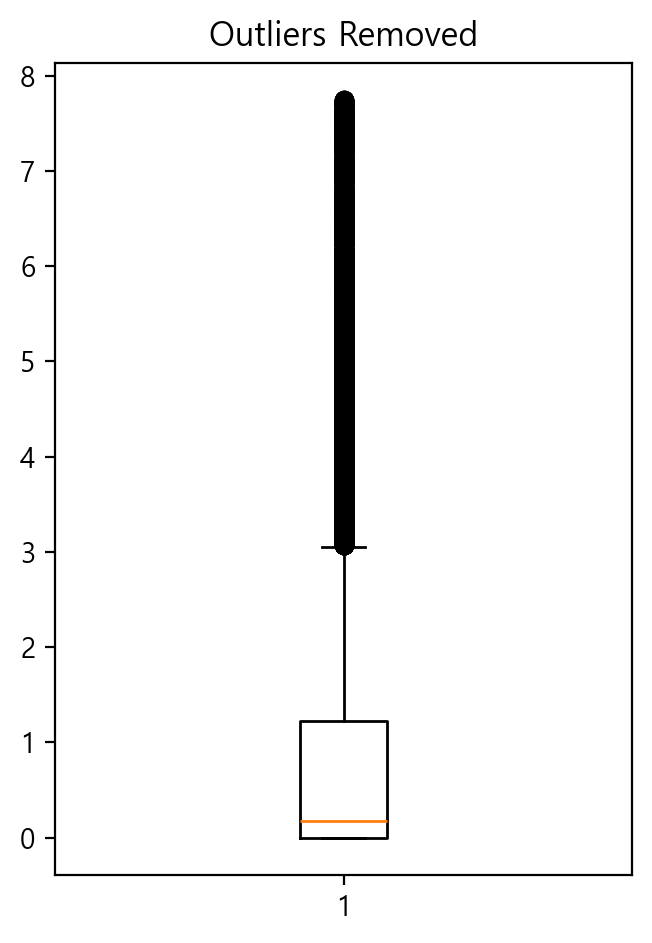

In [ ]:
# 이상치 제거 후 박스플롯 생성
Q1 = research_cluster['session_duration'].quantile(0.25)
Q3 = research_cluster['session_duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거된 데이터
df_no_outliers = research_cluster[(research_cluster['session_duration'] >= lower_bound) & (research_cluster['session_duration'] <= upper_bound)]

plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers['session_duration'])
plt.title('Outliers Removed')

plt.tight_layout()
plt.show()

In [ ]:
# 세션 경과 시간 데이터프레임화
df_no_outliers = df_no_outliers['session_duration'].describe().reset_index().drop(0)
df_no_outliers

index  session_duration
1  mean          0.996394
2   std          1.659286
3   min          0.000000
4   25%          0.000000
5   50%          0.170000
6   75%          1.220000
7   max          7.750000

***
---
    기초 설정형 세션 길이 기술통계

    평균 1분
    최댓값 6분
    표준편차 1분 32초
***
---

- pre_complete_sequences 컬럼 모든 값의 리스트 해제 및 빈도 분석

In [ ]:
# 1) 문자열로 저장된 리스트를 실제 리스트로 변환
research_cluster['pre_complete_sequences'] = research_cluster['pre_complete_sequences'] \
    .apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 2) explode 후, 각 시퀀스를 tuple로 변환해 카운트
all_sequences = research_cluster['pre_complete_sequences'].explode().dropna()
sequence_counts = Counter(tuple(seq) for seq in all_sequences)

# 3) DataFrame으로 정리
sequence_counts_df = (
    pd.DataFrame(sequence_counts.items(), columns=['path', 'count'])
      .sort_values('count', ascending=False)
      .reset_index(drop=True)
)
sequence_counts_df

path  count
0                         (채용공고 목록, 채용공고 상세, 지원 프로세스)     18
1                                          (지원 프로세스,)     15
2                                  (채용공고 상세, 지원 프로세스)     11
3       (채용공고 목록, 채용공고 상세, 채용공고 목록, 채용공고 상세, 지원 프로세스)      4
4                                  (채용공고 목록, 지원 프로세스)      3
..                                                ...    ...
59  (채용공고 상세, 기업 상세, 채용공고 목록, 채용공고 상세, 기업 상세, 채용공고...      1
60  (채용공고 목록, 검색, 기업 페이지, 검색, 채용공고 목록, 채용공고 상세, 지원...      1
61                    (검색, 채용공고 목록, 채용공고 상세, 지원 프로세스)      1
62  (채용공고 목록, 기업 페이지, 채용공고 목록, 채용공고 상세, 채용공고 목록, 채...      1
63    (북마크 관리, 프로필 조회, 검색, 채용공고 목록, 채용공고 상세, 지원 프로세스)      1

[64 rows x 2 columns]

In [ ]:
# 지원완료 이전까지의 시퀀스 비율
sequence_counts_df['ratio'] = (sequence_counts_df['count'] / sequence_counts_df['count'].sum() * 100).round(2)
sequence_counts_df.head(20)

path  count  ratio
0                         (채용공고 목록, 채용공고 상세, 지원 프로세스)     18  15.79
1                                          (지원 프로세스,)     15  13.16
2                                  (채용공고 상세, 지원 프로세스)     11   9.65
3       (채용공고 목록, 채용공고 상세, 채용공고 목록, 채용공고 상세, 지원 프로세스)      4   3.51
4                                  (채용공고 목록, 지원 프로세스)      3   2.63
5                  (채용공고 목록, 채용공고 상세, 기업 상세, 지원 프로세스)      3   2.63
6                (채용공고 상세, 채용공고 목록, 채용공고 상세, 지원 프로세스)      2   1.75
7                  (기업 상세, 채용공고 목록, 채용공고 상세, 지원 프로세스)      2   1.75
8                (채용공고 상세, 지원 프로세스, 채용공고 상세, 지원 프로세스)      1   0.88
9   (채용공고 목록, 채용공고 상세, 채용공고 목록, 채용공고 상세, 지원 프로세스, ...      1   0.88
10      (지원 프로세스, 채용공고 상세, 지원 프로세스, 채용공고 상세, 지원 프로세스)      1   0.88
11  (기업 상세, 검색, 기업 상세, 채용공고 목록, 채용공고 상세, 지원 프로세스, ...      1   0.88
12  (채용공고 목록, 채용공고 상세, 기업 상세, 채용공고 목록, 채용공고 상세, 지원...      1   0.88
13  (검색, 채용공고 상세, 검색, 채용공고 목록, 채용공고 상세, 채용공고 목록, 채...      1   0.88
14  (기업 상세, 채용공고 목록, 채용공고 상세, 지원 프로세스, 채용공고 목록, 지원...      1   0.88
15                         (채용공고 목록, 기업 페이지, 지원 프로세스)      1   0.88
16                             (검색, 채용공고 상세, 지원 프로세스)      1   0.88
17                                           (기업 상세,)      1   0.88
18  (채용공고 목록, 채용공고 상세, 기업 상세, 채용공고 상세, 채용공고 목록, 채용...      1   0.88
19  (채용공고 목록, 검색, 채용공고 상세, 지원 프로세스, 채용공고 상세, 지원 프로세스)      1   0.88

- 각 시퀀스 길이 계산 및 행동 빈도 확인

In [ ]:
# 시퀀스 길이 계산
research_cluster['sequence_lengths'] = research_cluster['pre_complete_sequences'].apply(lambda x: [len(seq) for seq in x])

# 행동 빈도 (action_categories 활용)
action_freq = research_cluster.explode('action_list')['action_list'].value_counts()
action_freq = action_freq.reset_index()
action_freq

action_list  count
0      채용공고 목록  33175
1      채용공고 상세  19915
2               12064
3        기업 상세  12027
4           검색   5453
5       기업 페이지   1738
6    이력서 작성 단계   1244
7      지원 프로세스    894
8       프로필 조회    128
9        지원 완료    115
10      북마크 관리     16

In [ ]:
action_freq['ratio'] = (action_freq['count'] / action_freq['count'].sum() * 100).round(2)
action_freq

action_list  count  ratio
0      채용공고 목록  33175  38.23
1      채용공고 상세  19915  22.95
2               12064  13.90
3        기업 상세  12027  13.86
4           검색   5453   6.28
5       기업 페이지   1738   2.00
6    이력서 작성 단계   1244   1.43
7      지원 프로세스    894   1.03
8       프로필 조회    128   0.15
9        지원 완료    115   0.13
10      북마크 관리     16   0.02

- 사용자 이동경로 패턴 빈도 확인

In [ ]:
paths = research_cluster['action_flow']

# 원하는 경로
five_step_paths = paths[paths.str.count('->') == 4]

# 경로별 빈도수 계산
path_freq = five_step_paths.value_counts().reset_index()
path_freq.columns = ['Path', 'Count']

# 빈도율 계산 (5단계 경로 세션 대비 비율)
total_five_step_sessions = len(five_step_paths)
path_freq['Frequency'] = path_freq['Count'] / total_five_step_sessions

temp4 = path_freq
with pd.option_context('display.max_colwidth', None):
    display(temp4.head(30))

Path  Count  Frequency
0     채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세->채용공고 목록    115   0.111759
1       기업 상세->채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세     41   0.039845
2           기업 상세->채용공고 목록->기업 상세->채용공고 목록->기업 상세     40   0.038873
3       채용공고 목록->채용공고 상세->기업 상세->채용공고 목록->채용공고 상세     35   0.034014
4     채용공고 상세->채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세     30   0.029155
5         기업 상세->채용공고 목록->기업 상세->채용공고 목록->채용공고 상세     28   0.027211
6               채용공고 목록->검색->채용공고 목록->검색->채용공고 목록     21   0.020408
7         채용공고 목록->채용공고 상세->기업 상세->채용공고 목록->기업 상세     17   0.016521
8         채용공고 목록->기업 상세->채용공고 목록->기업 상세->채용공고 목록     17   0.016521
9          검색->채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세     16   0.015549
10        기업 상세->채용공고 목록->채용공고 상세->기업 상세->채용공고 목록     15   0.014577
11        기업 상세->채용공고 목록->채용공고 상세->채용공고 목록->기업 상세     15   0.014577
12         채용공고 목록->검색->채용공고 상세->채용공고 목록->채용공고 상세     15   0.014577
13         채용공고 목록->검색->채용공고 목록->채용공고 상세->채용공고 목록     15   0.014577
14              검색->채용공고 목록->검색->채용공고 목록->채용공고 상세     15   0.014577
15         채용공고 목록->채용공고 상세->검색->채용공고 목록->채용공고 상세     14   0.013605
16      채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세->기업 상세     13   0.012634
17  이력서 작성 단계->채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세     11   0.010690
18      채용공고 목록->기업 상세->채용공고 목록->채용공고 상세->채용공고 목록     10   0.009718
19      채용공고 상세->채용공고 목록->채용공고 상세->기업 상세->채용공고 상세     10   0.009718
20     기업 페이지->채용공고 목록->채용공고 상세->채용공고 목록->채용공고 상세     10   0.009718
21             검색->기업 상세->채용공고 목록->기업 상세->채용공고 목록     10   0.009718
22      채용공고 목록->채용공고 상세->채용공고 목록->기업 상세->채용공고 목록      9   0.008746
23        채용공고 목록->기업 상세->채용공고 목록->채용공고 상세->기업 상세      9   0.008746
24      채용공고 목록->채용공고 상세->기업 상세->채용공고 상세->채용공고 목록      9   0.008746
25           기업 상세->채용공고 목록->검색->채용공고 목록->채용공고 상세      8   0.007775
26        채용공고 상세->기업 상세->채용공고 목록->기업 상세->채용공고 상세      8   0.007775
27      채용공고 목록->채용공고 상세->채용공고 목록->기업 상세->채용공고 상세      8   0.007775
28      채용공고 상세->채용공고 목록->기업 상세->채용공고 목록->채용공고 상세      7   0.006803
29     채용공고 목록->채용공고 상세->기업 페이지->채용공고 목록->채용공고 상세      7   0.006803

## AARRR 지표 분석

#### A - Acquisition(획득)

***
---------

    2023-05-24 이후 회원가입 기준 세그먼트

    전체 유저: 11111명

    기존 유저: 10113명

    신규 유저: 998명

    비율은 약 91% vs 9%

-----

`1. 세그먼트별 검색 키워드 파악`
    
    기존 유저는 flutter(약 28.10%) > 프론트엔드(약 19.97%) > python(약 5.67%)
    신규 유저는 프론트엔드(약 28.63%) > 블록체인(약 6.89%) > 데이터(약 5.4%)

--------
유저 클러스터별 액션 카테고리가 존재하는 기존 유저는 8545명
- 기존 유저만 분석하기 때문에 신규 유입을 전혀 분석하지 않음
- 기존 유저를 6월 이후부터 분석하기 때문에 재유입은 고려 대상이 아님


#### A - Activation (사용자 활성화)

- 신규/기존 유저의 입사완료에 대한 파악은 application의 내용이 아닌 log ['URL'] = complete 기준으로만 정의함
    - why?
        1. 로그가 찍힌시점과 application 시점과의 시간적 차이가 있음
        2. 위 내용과 별개로 데이터셋에서 확인할 수 없는 user의 내용이 포함되어 있음
        3. 우리팀은 유저 구분을 로그 데이터 바탕으로 보고 있기에 complete가 찍힌 유저들만 실제로 지원완료 했다라고 정의하고 있음

***
-------

`1. 기존 유저와 신규유저의 각각 지원완료까지의 차이를 비교 결과`

    기존유저의 유저수 대비 지원 완료 비율(약 23.07%)
    신규 유저의 유저수 대비 지원 완료 비율(91.58%)
    약 70%의 차이를 보임

----------

`2.지원 완료까지의 걸리는 시간 비교`
    
    기존유저는 평균 약 36일
    신규 유저는 약 19일
    신규유저의 지원까지의 기간이 17일가량 빠름

------

`3. 지원 완료한 공고의 직군을 분석`

    기존 유저와 신규 유저 모두 SW개발 > 기획/PM > 디자인 순

------

`4. PV의 분석결과(5월 제외)`

    기존 유저는 6월(227,144회) > 7월(186,128회) > 8월(176,045회)로 12월(71,881회)까지 지속적으로 하락세
    신규유저는 6월(22,756회)부터 11월(42,406회)까지 꾸준히 상승하다 12월(19,648회)로 급격하게 낮아짐
    
    기존유저와 신규 유저 모두 12월에 PV 횟수가 가장 낮음

-------

`5. 사용자 활동은 주중, 특히 수요일에 가장 많았음`

-----

`6. 지원완료까지의 경로의 빈도수 차이분석`

    기존유저와 신규 유저 패턴 모두 아래 순위로 파악
    1. (검색 ⇒ 지원 ⇒ 지원완료)
    2. (지원 ⇒ 지원완료)  
    3. (조사 ⇒ 검색 ⇒ 지원완료)
    4. (조사 ⇒ 지원 ⇒ 지원완료)
    5. (검색 ⇒ 지원 ⇒ 검색 ⇒ 지원 ⇒ 지원완료)

-------

`7. 행동 빈도 비교 분석 결과`

    기존 유저와 신규 유저 모두 검색 > 지원 > 지원 완료 > 조사 순의 결과


***
-------


##### 탐색 후 지원형 유저 PV

In [ ]:
# 탐색 후 지원형만 분리
announcement_user_log = old_user[old_user['user_uuid'].isin(announcement_user_df['user_uuid'])]

In [ ]:
# GET 메소드만 추출
get_pv_announcement = announcement_user_log[announcement_user_log['method'] == 'GET']
# response code 처리
get_pv_announcement_user = get_pv_announcement[get_pv_announcement['response_code'].isin([200, 301, 302])]

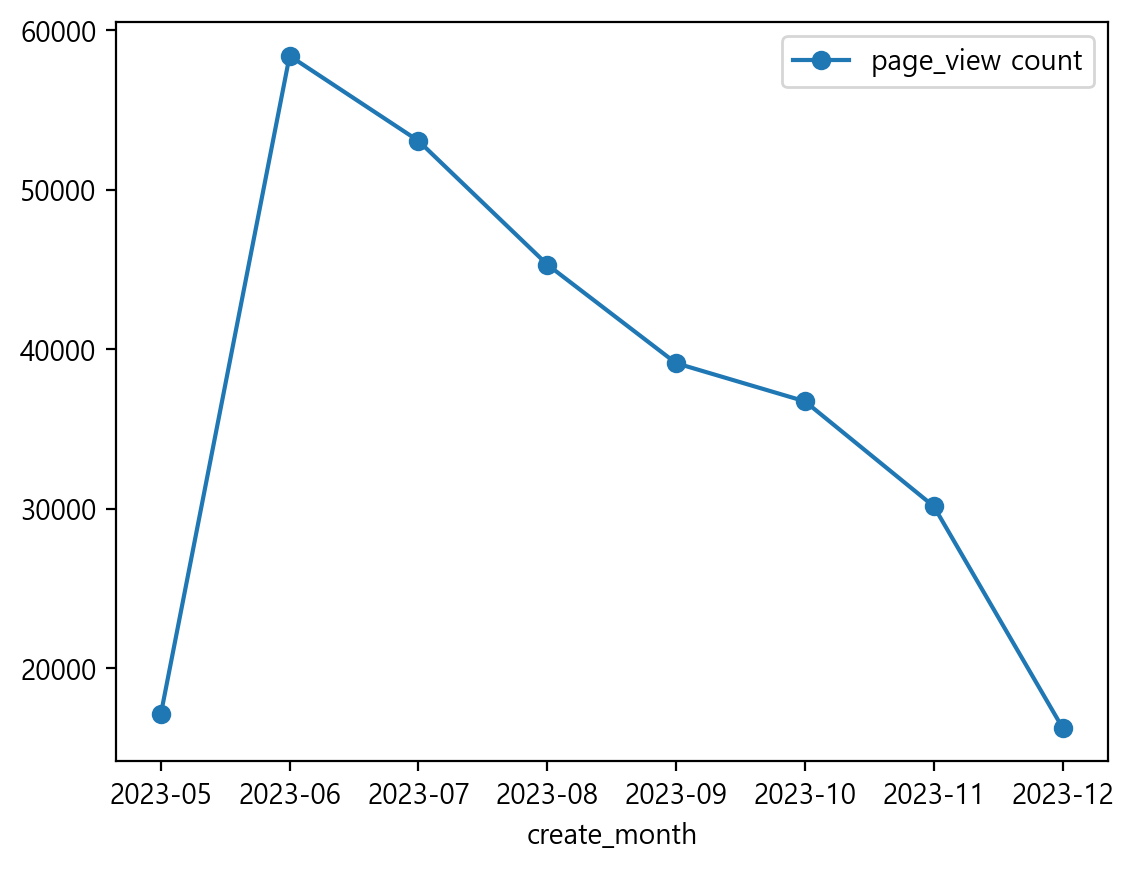

In [ ]:
# 월별 PV 구하기
pv_announcement_month = get_pv_announcement_user.groupby('create_month').size().reset_index()
pv_announcement_month.rename(columns={0: 'page_view count'}, inplace=True)

ax = pv_announcement_month.plot(kind='line', x='create_month', y='page_view count', marker='o')
plt.show()

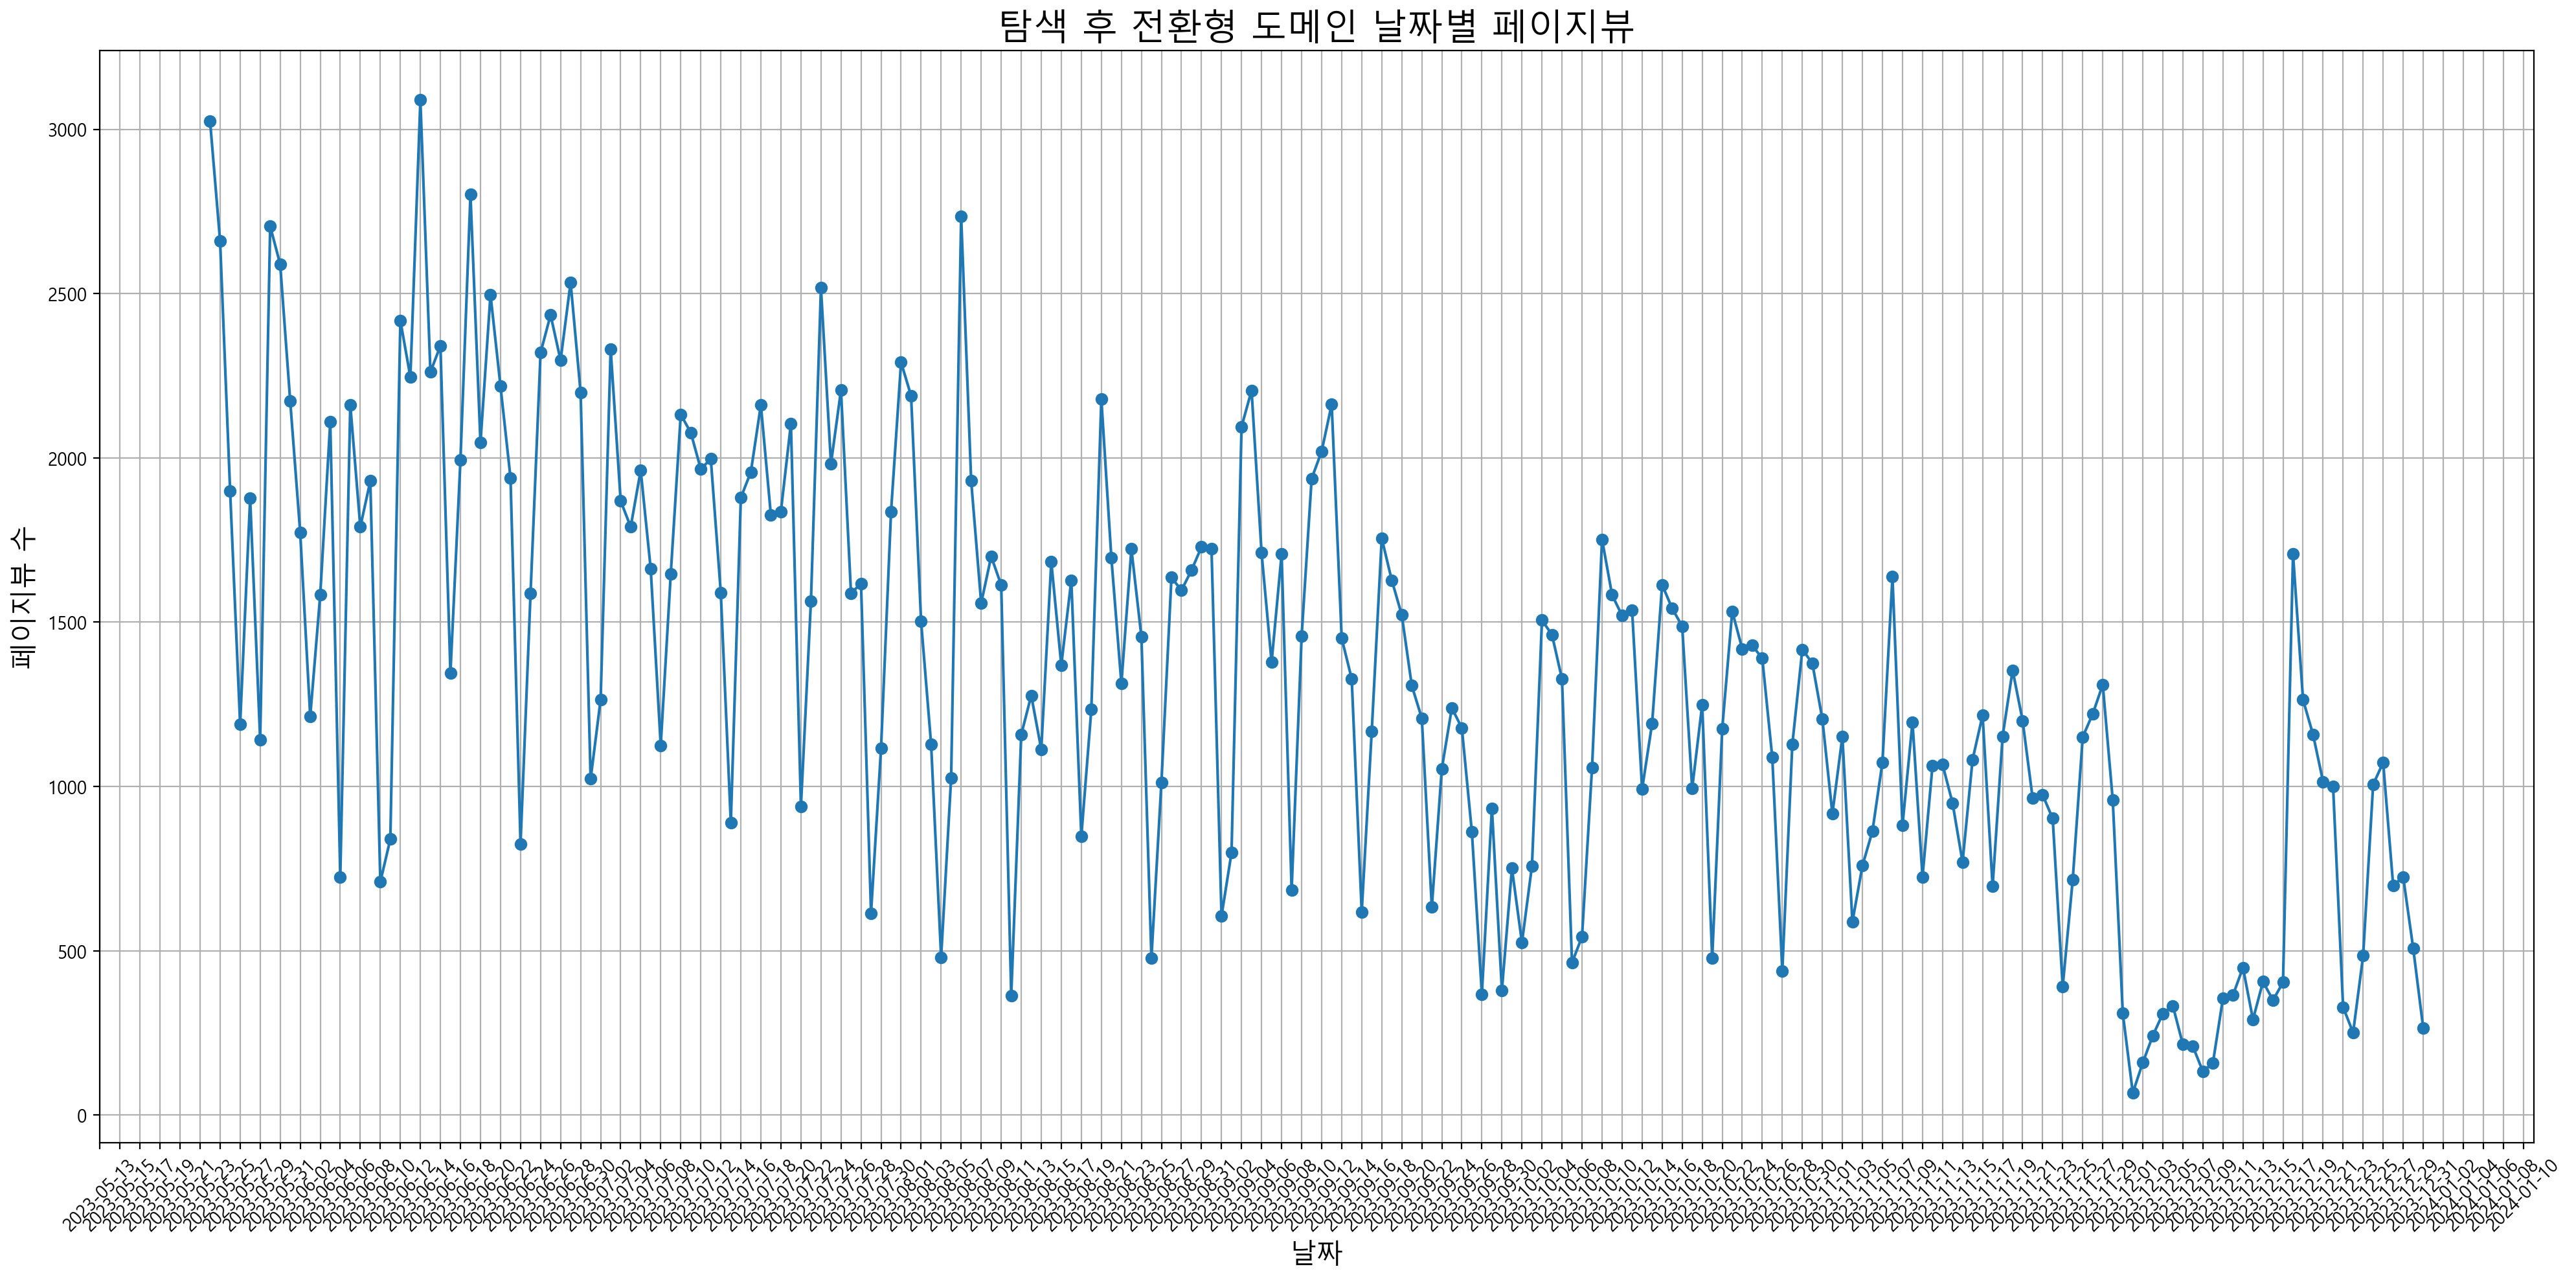

In [ ]:
# 일별 PV 구하기

pv_all_date_announcement = get_pv_announcement_user.groupby(['create_day']).size().reset_index()
pv_all_date_announcement['create_day'] = pd.to_datetime(pv_all_date_announcement['create_day'])
pv_all_date_announcement.rename(columns={0: 'page_view count'}, inplace=True)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(pv_all_date_announcement['create_day'], pv_all_date_announcement['page_view count'], marker='o', linestyle='-')

ax.set_title('탐색 후 전환형 도메인 날짜별 페이지뷰', fontsize=20)
ax.set_xlabel('날짜', fontsize=15)
ax.set_ylabel('페이지뷰 수', fontsize=15)
ax.grid(True)

# x축 tick 간격 및 포맷 지정
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

#### R - Retention (사용자 유지)

***
------

`1. MAU 분석결과(5월 제외)`

    기존 유저는 6월(4,384) 부터 12월(2,784)까지 꾸준히 하락세
    신규 유저는 6월(222)부터 11월(532)까지 지속적으로 상승하다가 12월(412) 감소

------

`2. 평균 접속간격 분석결과`

    기존 유저(약 18일)
    신규 유저(약 4일)

-----


`3. 사용자 고착도 분석결과(5월 제외)`

    기존 유저는 주중 평균 약 15% 미만, 주말 평균 약 10%미만
    신규 유저는 주중 평균 약 18% 이상, 주말 평균 약 13% 내외

----

`4. 리텐션율 분석`

    기존 유저 2023년 6월 기준 리텐션율
    첫 달 (48.45%)
    두 번째 달 (40.40%)
    세 번째 달 (33.11%)
    마지막 여섯 번째 달까지 (22.95%) 감소 추세

    신규 유저 2023년 6월 기준 리텐션율
    첫 달 (74.46%)
    두 번째 달 (54.89%)
    세 번째 달 (41.85%) 점차적인 감소
    마지막 여섯 번째 달 (23.91%) 급격히 감소
***
-----

##### 탐색 후 지원형 유저 MAU/DAU

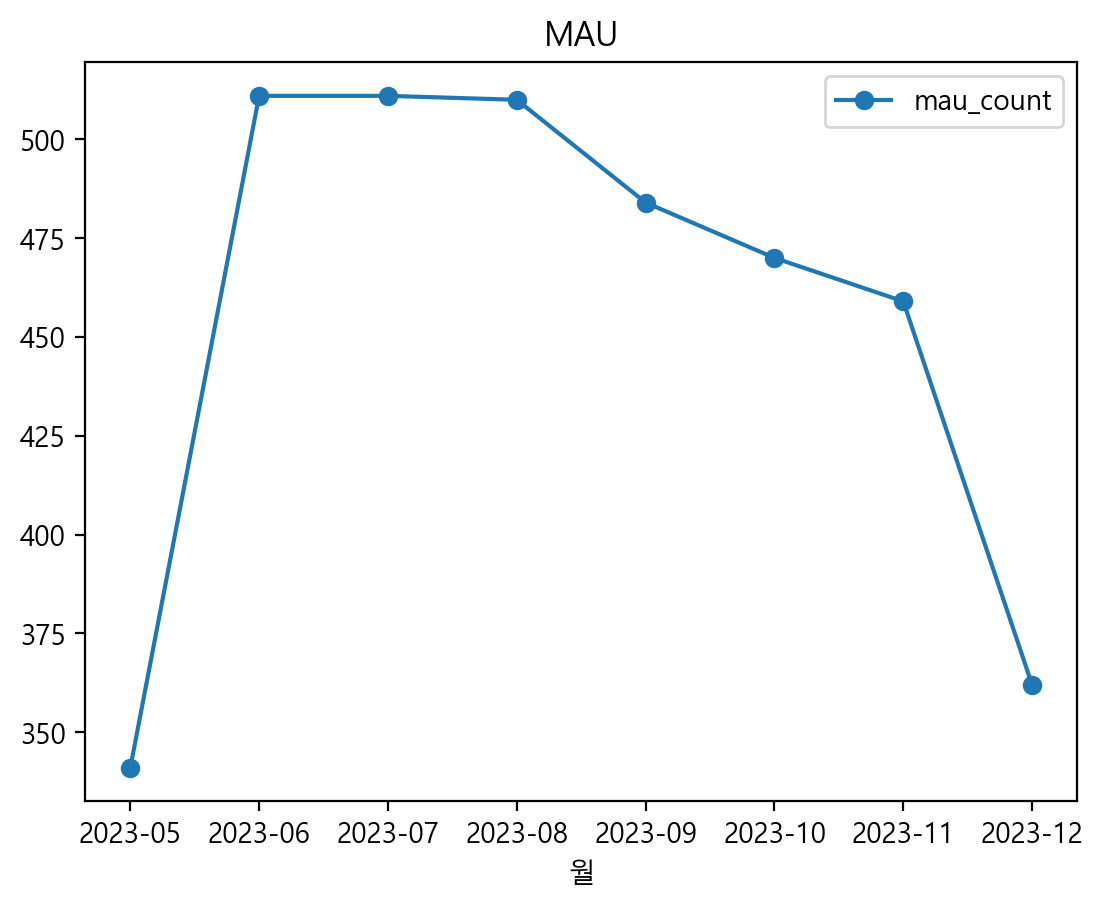

In [ ]:
# 월별 MAU 구하기
mau_pv_announcement_month = get_pv_announcement_no_duple.groupby('create_month').size().reset_index()
mau_pv_announcement_month.rename(columns={0: 'mau_count'}, inplace=True)

# 시각화
ax = mau_pv_announcement_month.plot(kind='line', x='create_month', y='mau_count', marker='o')
ax.set_title('MAU')
ax.set_xlabel('월')
plt.show()

In [ ]:
mau_pv_announcement_month

create_month  mau_count
0      2023-05        341
1      2023-06        511
2      2023-07        511
3      2023-08        510
4      2023-09        484
5      2023-10        470
6      2023-11        459
7      2023-12        362

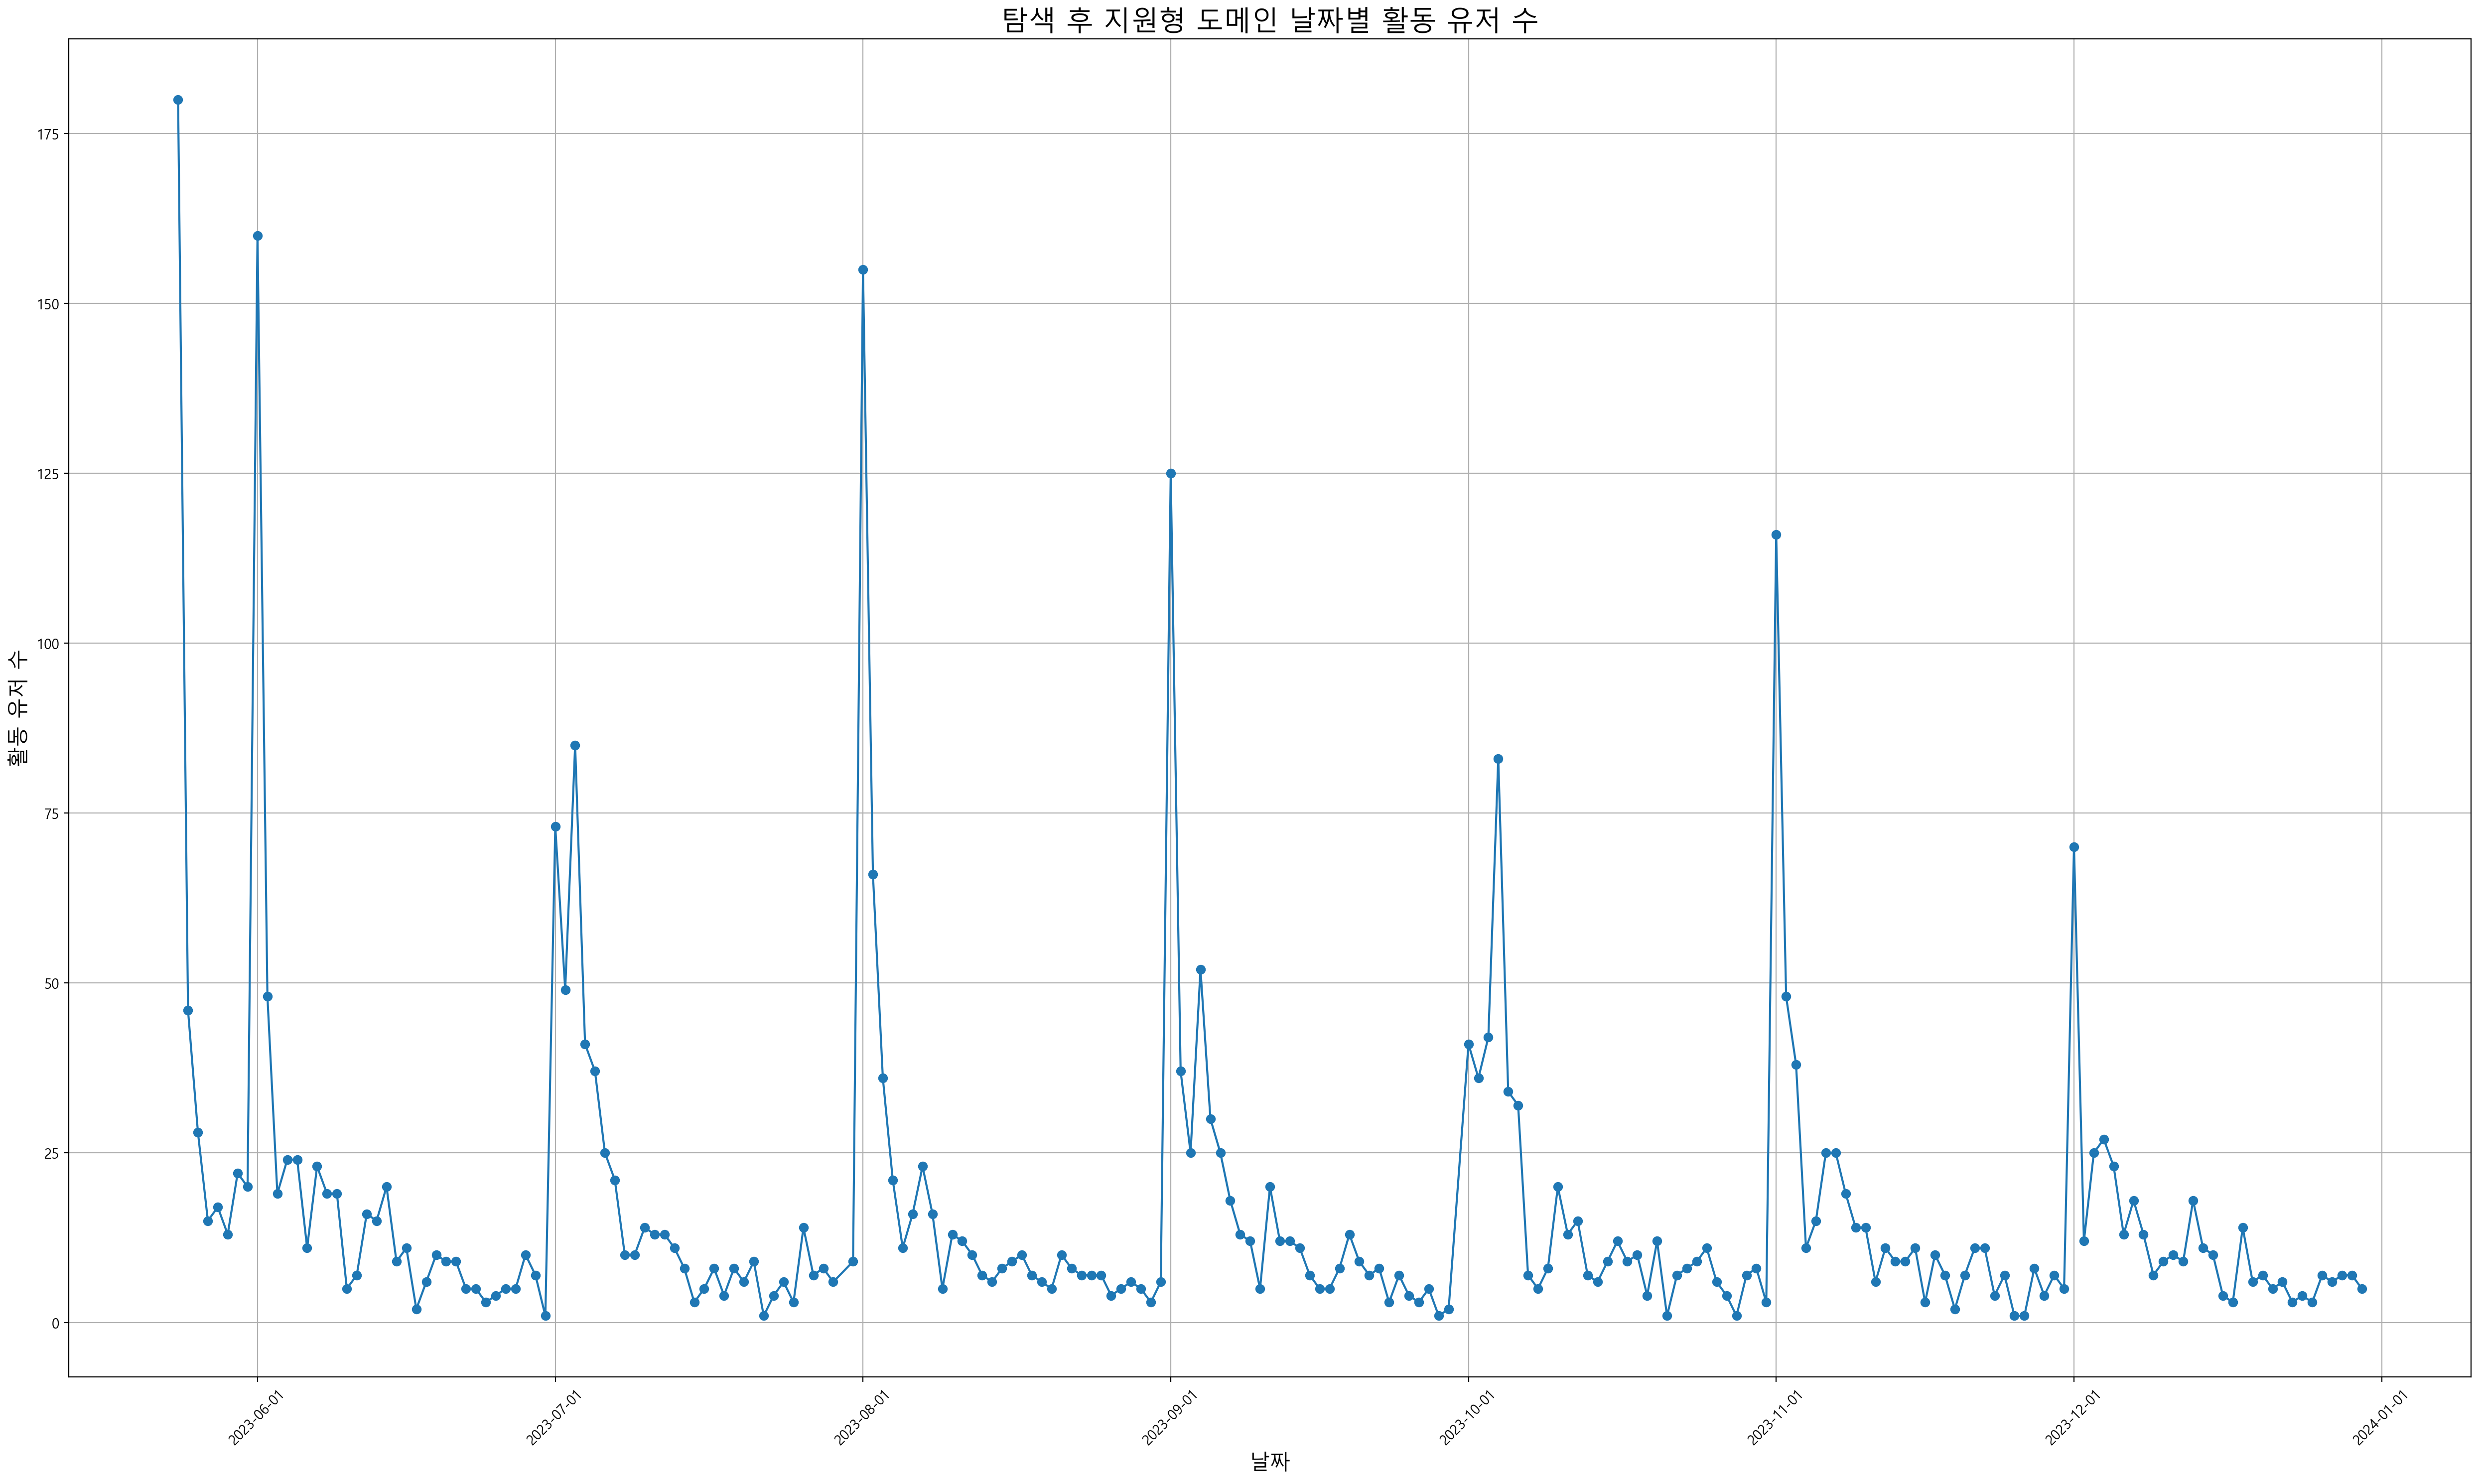

In [ ]:
# 일별 DAU 구하기
dau_announcement = pv_announcement_day.groupby(['create_day']).size().reset_index()
dau_announcement['create_day'] = pd.to_datetime(dau_announcement['create_day'])
dau_announcement.rename(columns={0: 'dau_count'}, inplace=True)

# 시각화
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(dau_announcement['create_day'], dau_announcement['dau_count'], marker='o', linestyle='-')

ax.set_title('탐색 후 지원형 도메인 날짜별 활동 유저 수', fontsize=20)
ax.set_xlabel('날짜', fontsize=15)
ax.set_ylabel('활동 유저 수', fontsize=15)
ax.grid(True)

# x축 tick 간격 및 포맷 지정
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

- 월 초에 활동 유저 수가 튀는 현상을 확인함
- 탐색 후 지원형 유저도 비슷한 현상을 확인할 수 있음

$ \text{Stickiness} = \frac{\text{DAU}}{\text{MAU}} $

- 사용자가 얼마나 자주, 그리고 오랜 기간 동안 서비스나 애플리케이션을 지속적으로 사용하는지를 나타내는 중요한 지표

In [ ]:
mau_pv_announcement_month['create_month'] = pd.to_datetime(mau_pv_announcement_month['create_month'])
mau_pv_announcement_month['month'] = mau_pv_announcement_month['create_month'].dt.month
mau_pv_announcement_month

create_month  mau_count  month
0   2023-05-01        341      5
1   2023-06-01        511      6
2   2023-07-01        511      7
3   2023-08-01        510      8
4   2023-09-01        484      9
5   2023-10-01        470     10
6   2023-11-01        459     11
7   2023-12-01        362     12

In [ ]:
# Engagement Ratio 비율 구하기
dau_announcement['month'] = dau_announcement['create_day'].dt.month
announcement_engagement_ratio = dau_announcement.merge(mau_pv_announcement_month, how='inner', on='month')
announcement_engagement_ratio['ratio_by_date'] = round((announcement_engagement_ratio['dau_count'] / announcement_engagement_ratio['mau_count']), 3)

In [ ]:
announcement_engagement_ratio

create_day  dau_count  month create_month  mau_count  ratio_by_date
0   2023-05-24        180      5   2023-05-01        341          0.528
1   2023-05-25         46      5   2023-05-01        341          0.135
2   2023-05-26         28      5   2023-05-01        341          0.082
3   2023-05-27         15      5   2023-05-01        341          0.044
4   2023-05-28         17      5   2023-05-01        341          0.050
..         ...        ...    ...          ...        ...            ...
214 2023-12-26          7     12   2023-12-01        362          0.019
215 2023-12-27          6     12   2023-12-01        362          0.017
216 2023-12-28          7     12   2023-12-01        362          0.019
217 2023-12-29          7     12   2023-12-01        362          0.019
218 2023-12-30          5     12   2023-12-01        362          0.014

[219 rows x 6 columns]

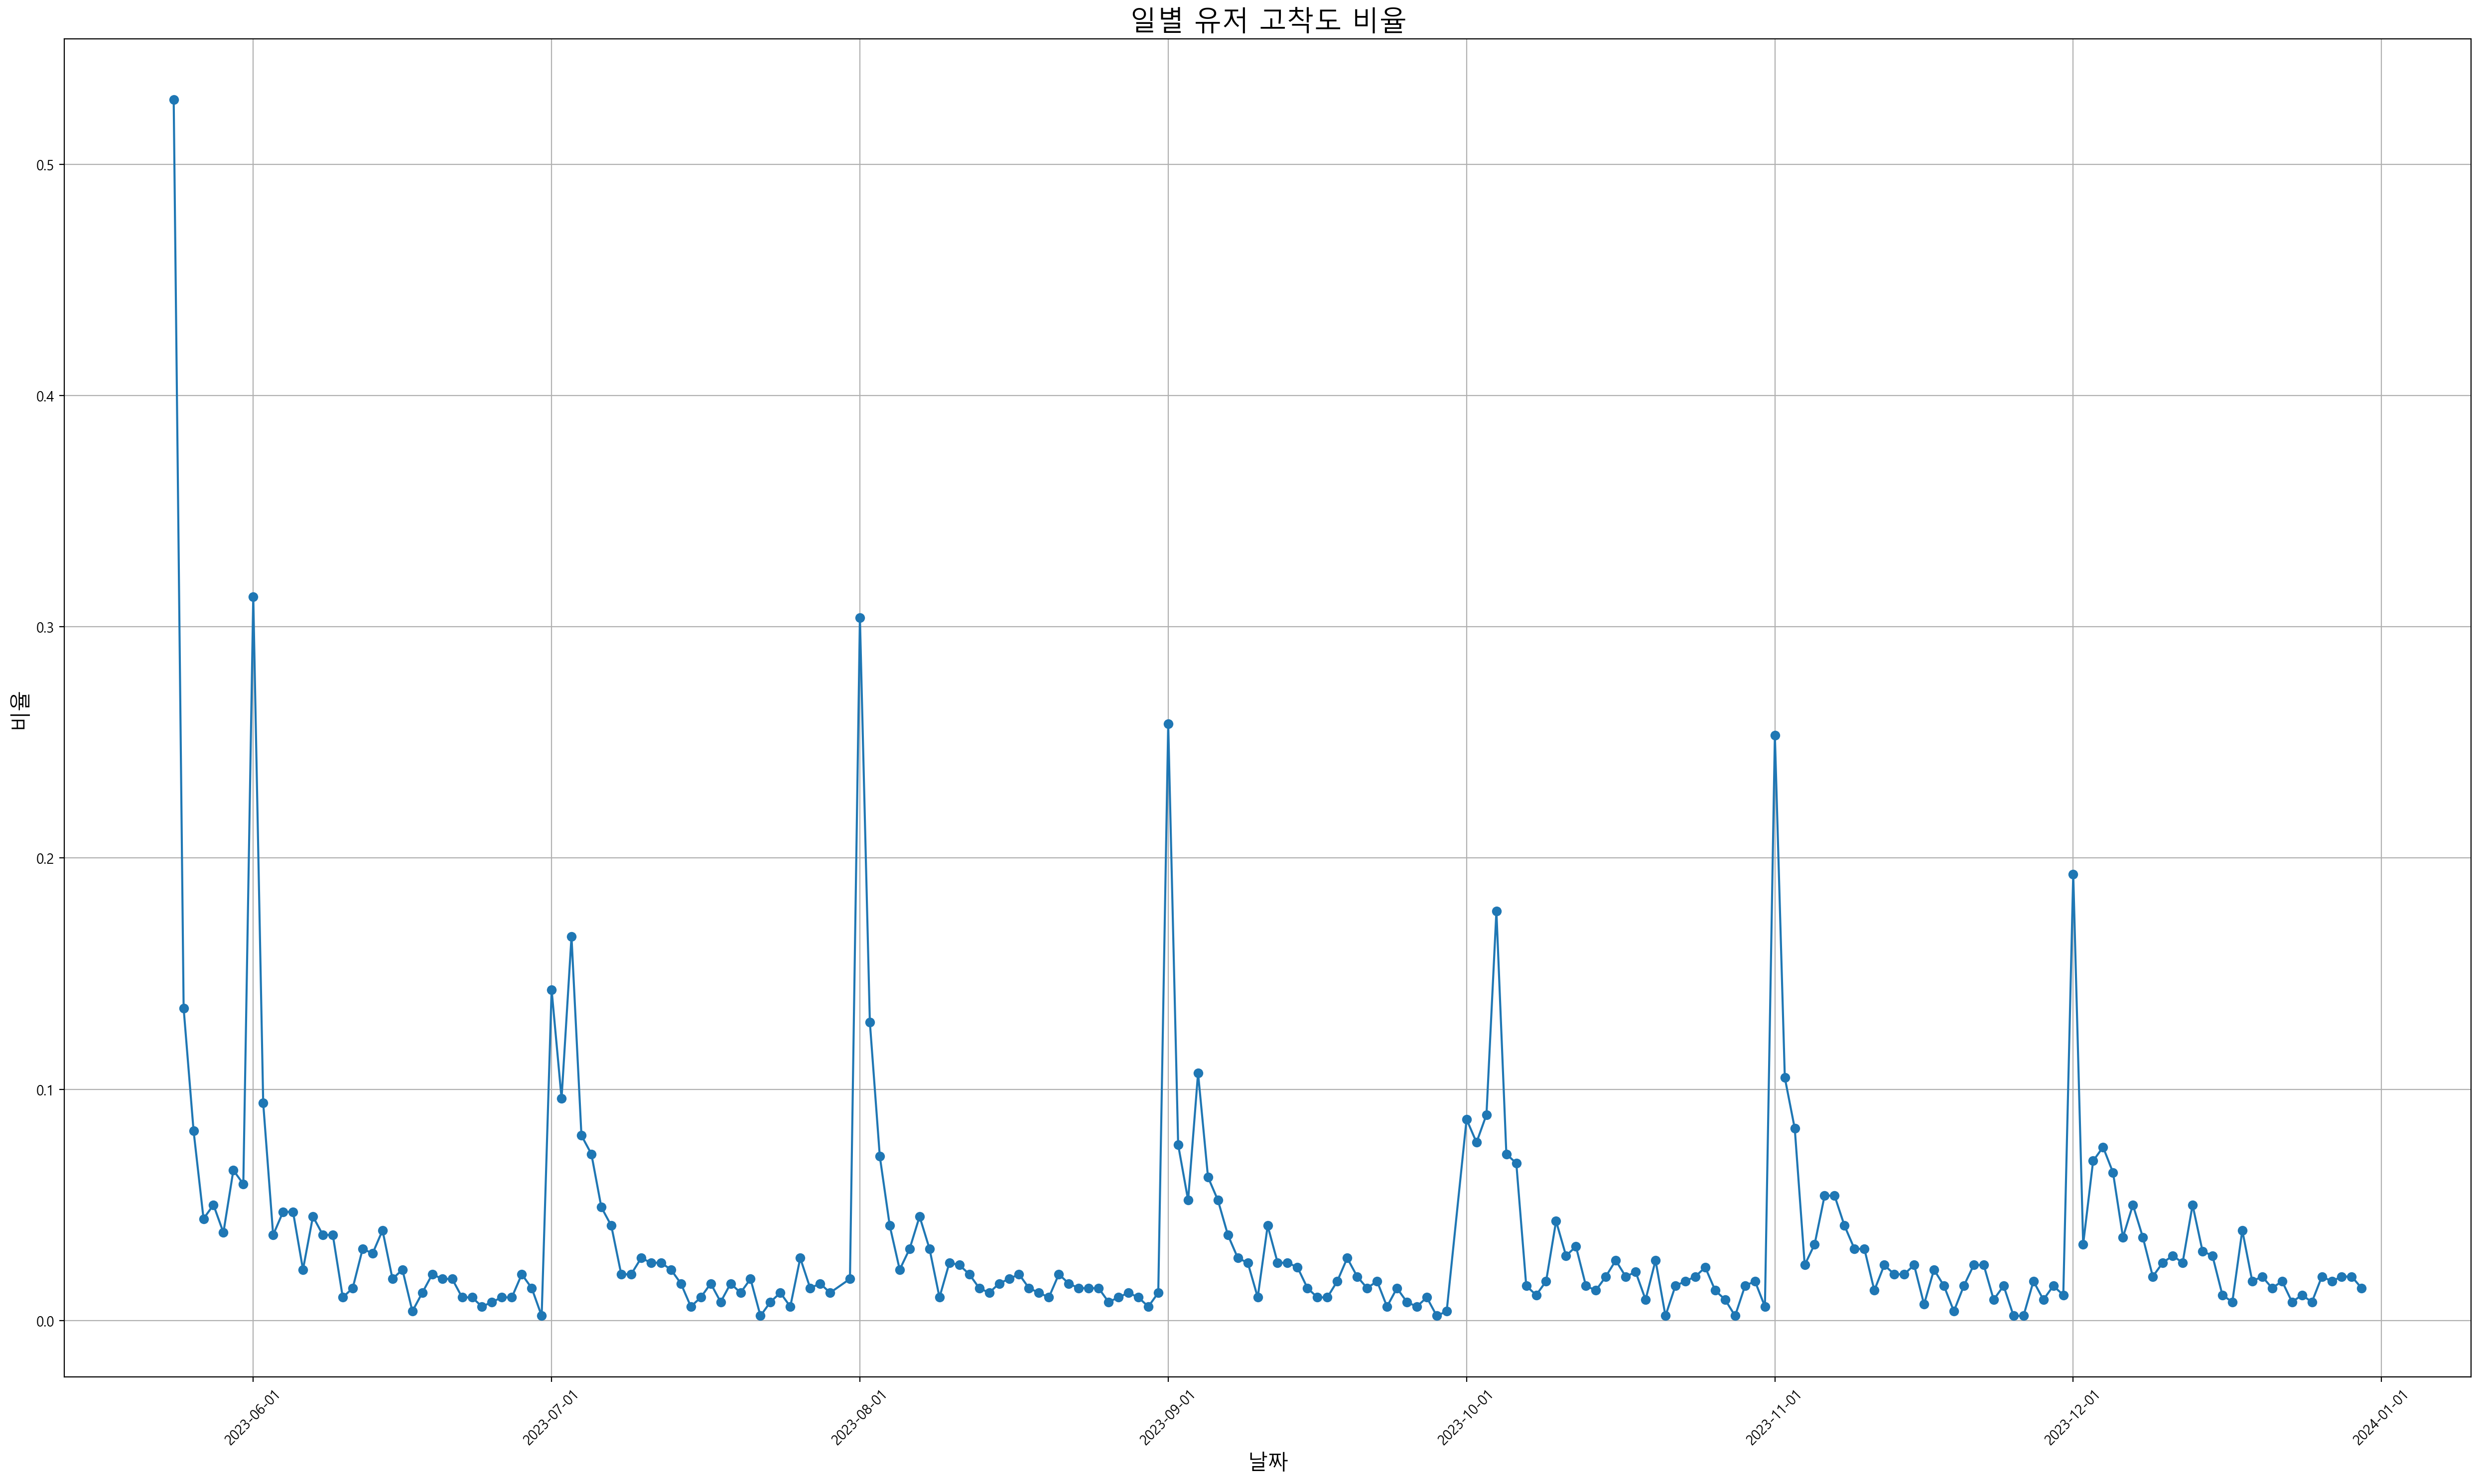

In [ ]:
# 시각화
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(announcement_engagement_ratio['create_day'], announcement_engagement_ratio['ratio_by_date'], marker='o', linestyle='-')
ax.set_title('일별 유저 고착도 비율', fontsize=20)
ax.set_xlabel('날짜', fontsize=15)
ax.set_ylabel('비율', fontsize=15)
ax.grid(True)

# x축 tick 간격 및 포맷 지정
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

- 평일에 많은 접속 기록을 보이고 있으며 주로 주말에는 낮은 활동성을 보임
- 6월 기준으로 30% 이상이 넘어감

분석 결과

- 전체적으로 평일의 고착도가 주말보다 높아, 구직 활동이 업무일에 집중되는 특성을 반영
- 특히 매월 초에 유저가 유입되는 현상을 확인할 수 있음
- 월별로 고착도의 변화는 채용 시즌, 경제적 상황, 그리고 연말 등의 이벤트와 연관 지어 해석할 여지도 존재

#### R - Revenue (수익)

***
----

    우리가 정의한 채용 플랫폼의 Revenue 구조
    
    1. 기업이 공고를 게시하고 채용 플랫폼이 이에 대한 수수료를 챙기는 구조
    2. 구직자가 해당 기업에 취업이 완료된다면 구직자의 연봉의 일정 수수료

    👀 이 외에도 여러 구조가 있겠지만, 현재 우리 프로젝트는 두가지에 중점을 둠

--------

    ❗️BUT 분석의 한계점

    매출을 측정할 수 있는 정확한 데이터 부재
    (채용 성공 여부 확인 불가)
    (기업별/공고별 수익 기여도 파악 불가)
    (LTV, CAC 등 지표 파악 어려움)

    따라서, 추후 분석을 진행 시 성공 여부 확인 및 수익 관련 데이터 수집의 필요성 있음
    데이터를 통해 해당 플랫폼의 Revenue 단계에서 비즈니스 전략를 아래와 같이 세워볼 수도 있음

    (LTV, CAC 등 지표 파악을 통해 인사이트를 도출하여 개선)
    (채용 성공 여부의 전환율과 주요 직무/회사 등의 지표를 분석하여 맞춤 전략 수립 등)

***
-----
    






#### R - Referral (추천)

***
------

    우리가 정의한 채용 플랫폼의 Referral 구조

    1. 채용 공고 링크 공유 (SNS, 카카오톡 등)
    2. 추천인 제도

    이를 바탕으로 유입의 확장과 Referral 제도를 이용한 신뢰성 높은 유저 확보

------

    ❗️BUT 분석의 한계점

    추천 관련 측정할 수 있는 정확한 데이터 부재
    (공고별 공유 로그 부재 -> 유입채널 파악 불가)
    (추천 유입자 행동 패턴 분석 불가)

    따라서, 추후 분석을 진행 시 유입 채널, 공고 공유 및 추천인 코드에 대한 데이터 수집의 필요성 있음
    데이터를 통해 해당 플랫폼의 Referral 단계에서 비즈니스 전략를 아래와 같이 세워볼 수도 있음

    (유입 파라미터별 맞춤 전략 수립)
    (추천인 코드 트래킹을 통해 유입유저의 행동패턴 분석)
    (추천 유입 유저가 적다면 지표 상승을 위한 이벤트 전략 수립)

***
------

